# Regularized Linear Regression Project Tutorial

## US county-level sociodemographic and health resource data (2018-2019)

In [2]:
import pandas as pd

full_dataset = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
full_dataset.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 108 columns]

In [3]:
# Obtaining the dimensions
full_dataset.shape

(3140, 108)

In [4]:
# Obtaining information about data types and non-null values
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
pd.set_option('display.max_columns', 108)
pd.set_option('display.max_rows', None)

In [6]:
#full_dataset

In [7]:
full_dataset_types = full_dataset.dtypes
categorical_columns = list(full_dataset_types[full_dataset_types == 'object'].index)
numerical_columns = list(full_dataset_types[full_dataset_types != 'object'].index)

print(f'Categorical columns: {categorical_columns}')
print(f'Numerical columns: {numerical_columns}')

Categorical columns: ['COUNTY_NAME', 'STATE_NAME']
Numerical columns: ['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-1

In [8]:
#Factorizing the categorical variables and saving the conversion

full_dataset['COUNTY_NAME_n'] = pd.factorize(full_dataset["COUNTY_NAME"])[0]
full_dataset['STATE_NAME_n'] = pd.factorize(full_dataset["STATE_NAME"])[0]

full_dataset.drop_duplicates(["COUNTY_NAME", "COUNTY_NAME_n"])[["COUNTY_NAME", "COUNTY_NAME_n"]].to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/COUNTY_NAME_to_COUNTY_NAMEn.csv", index = False)
full_dataset.drop_duplicates(["STATE_NAME", "STATE_NAME_n"])[["STATE_NAME", "STATE_NAME_n"]].to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/STATE_NAME_to_STATE_NAMEn.csv", index = False)

We have too many variables, so we'll start by getting rid of 1/3 via SelectKBest

In [9]:
#Splitting train and test before selecting

from sklearn.model_selection import train_test_split

predictors = full_dataset.drop(['Obesity_prevalence', 'COUNTY_NAME','STATE_NAME'], axis=1).columns

X = full_dataset[predictors]
y = full_dataset['Obesity_prevalence']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

X_train.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
968   20165     3093    337               10.895571     376   
1506  29051    76796   9259               12.056618    9817   
2550  48059    13994   1654               11.819351    1772   
1940  37105    61452   8019               13.049209    8173   
333   12033   315534  37253               11.806335   39483   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
968                  12.156482    285                  9.214355    296   
1506                 12.783218   9940                 12.943382  10401   
2550                 12.662570   1411                 10.082893   1636   
1940                 13.299811   7750                 12.611469   7481   
333                  12.513073  50487                 16.000494  39694   

      30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  \
968                   9.569997    338                 10.927902    428   
1506                 13.543674   9487                 12.353508  10258   
2550                 11.690725   1630                 11.647849   1965   
1940                 12.173729   7677                 12.492677   8321   
333                  12.579944  33880                 10.737353  40803   

      50-59 y/o % of total pop  60-69  60-69 y/o % of total pop  70-79  \
968                  13.837698    488                 15.777562    282   
1506                 13.357467   9141                 11.902964   5471   
2550                 14.041732   1956                 13.977419   1252   
1940                 13.540650   7219                 11.747380   4366   
333                  12.931412  38099                 12.074452  23458   

      70-79 y/o % of total pop    80+  80+ y/o % of total pop  \
968                   9.117362    263                8.503071   
1506                  7.124069   3022                3.935101   
2550                  8.946691    718                5.130770   
1940                  7.104732   2446                3.980342   
333                   7.434381  12377                3.922557   

      White-alone pop  % White-alone  Black-alone pop  % Black-alone  \
968              2983      96.443582               17       0.549628   
1506            64290      83.715298             9528      12.406896   
2550            13273      94.847792              232       1.657853   
1940            45898      74.689188            12348      20.093732   
333            217466      68.919990            73229      23.207959   

      Native American/American Indian-alone pop  % NA/AI-alone  \
968                                          31       1.002263   
1506                                        300       0.390645   
2550                                        112       0.800343   
1940                                        783       1.274165   
333                                        2838       0.899428   

      Asian-alone pop  % Asian-alone  Hawaiian/Pacific Islander-alone pop  \
968                12       0.387973                                    2   
1506             1054       1.372467                                   52   
2550               98       0.700300                                   14   
1940              877       1.427130                                  103   
333             10752       3.407557                                  567   

      % Hawaiian/PI-alone  Two or more races pop  % Two or more races  \
968              0.064662                     48             1.551891   
1506             0.067712                   1572             2.046982   
2550             0.100043                    265             1.893669   
1940             0.167610                   1443             2.348174   
333              0.179695                  10682             3.385372   

      POP_ESTIMATE_2018  N_POP_CHG_2018  GQ_ESTIMATES_2018  R_birth_2018  \
968                3093              28                 66          11.4   
1506              

In [10]:
from sklearn.feature_selection import f_regression, SelectKBest

selection_model = SelectKBest (f_regression, k=72)
selection_model.fit(X_train, y_train)
selected=selection_model.get_support()
X_train_sel= pd.DataFrame(selection_model.transform(X_train),columns = X_train.columns.values[selected])
X_test_sel= pd.DataFrame(selection_model.transform(X_test),columns = X_test.columns.values[selected])

X_train_sel['Obesity_prevalence']=y_train.values
X_test_sel['Obesity_prevalence']=y_test.values


total_data=pd.concat([X_train_sel, X_test_sel]).reset_index(drop = True)

total_data.head()

TOT_POP      0-9   19-Oct    20-29    30-39    40-49    50-59    60-69  \
0    3093.0    337.0    376.0    285.0    296.0    338.0    428.0    488.0   
1   76796.0   9259.0   9817.0   9940.0  10401.0   9487.0  10258.0   9141.0   
2   13994.0   1654.0   1772.0   1411.0   1636.0   1630.0   1965.0   1956.0   
3   61452.0   8019.0   8173.0   7750.0   7481.0   7677.0   8321.0   7219.0   
4  315534.0  37253.0  39483.0  50487.0  39694.0  33880.0  40803.0  38099.0   

     70-79      80+  White-alone pop  % White-alone  % Black-alone  \
0    282.0    263.0           2983.0      96.443582       0.549628   
1   5471.0   3022.0          64290.0      83.715298      12.406896   
2   1252.0    718.0          13273.0      94.847792       1.657853   
3   4366.0   2446.0          45898.0      74.689188      20.093732   
4  23458.0  12377.0         217466.0      68.919990      23.207959   

   Asian-alone pop  % Asian-alone  Two or more races pop  % Two or more races  \
0             12.0       0.387973                   48.0             1.551891   
1           1054.0       1.372467                 1572.0             2.046982   
2             98.0       0.700300                  265.0             1.893669   
3            877.0       1.427130                 1443.0             2.348174   
4          10752.0       3.407557                10682.0             3.385372   

   POP_ESTIMATE_2018  GQ_ESTIMATES_2018  R_death_2018  \
0             3093.0               66.0           8.8   
1            76796.0             4917.0           8.9   
2            13994.0               73.0          13.1   
3            61452.0             1059.0           9.0   
4           315534.0            17839.0          11.0   

   R_INTERNATIONAL_MIG_2018  R_NET_MIG_2018  High school diploma only 2014-18  \
0                       0.0             6.2                             609.0   
1                       1.3            -1.0                           16159.0   
2                       0.5             3.6                            3659.0   
3                       2.1            10.8                           10936.0   
4                       1.1             5.8                           56941.0   

   Some college or associate's degree 2014-18  \
0                                       883.0   
1                                     14918.0   
2                                      3000.0   
3                                     14225.0   
4                                     77373.0   

   Bachelor's degree or higher 2014-18  \
0                                525.0   
1                              17308.0   
2                               1839.0   
3                               8421.0   
4                              55164.0   

   Percent of adults with less than a high school diploma 2014-18  \
0                                               11.1                
1                                                8.1                
2                                               11.8                
3                                               16.6                
4                                                9.2                

   Percent of adults with a high school diploma only 2014-18  \
0                                               26.8           
1                                               30.7           
2                                               38.0           
3                                               27.2           
4                                               27.3           

   Percent of adults with a bachelor's degree or higher 2014-18  \
0                                               23.1              
1                                               32.9              
2                                               19.1              
3                                               20.9              
4                                               26.4              

   PCTPOVALL_2018  PCTPOV017_2018  PCTPOV517_2

In [11]:
#Saving the feature selection model
from pickle import dump
dump(selection_model, open("/workspaces/machine-learning-regularized-linear-regression/models/selector.sav", "wb"))

In [12]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()


TOT_POP      0-9   19-Oct    20-29    30-39    40-49    50-59    60-69  \
0    3093.0    337.0    376.0    285.0    296.0    338.0    428.0    488.0   
1   76796.0   9259.0   9817.0   9940.0  10401.0   9487.0  10258.0   9141.0   
2   13994.0   1654.0   1772.0   1411.0   1636.0   1630.0   1965.0   1956.0   
3   61452.0   8019.0   8173.0   7750.0   7481.0   7677.0   8321.0   7219.0   
4  315534.0  37253.0  39483.0  50487.0  39694.0  33880.0  40803.0  38099.0   

     70-79      80+  White-alone pop  % White-alone  % Black-alone  \
0    282.0    263.0           2983.0      96.443582       0.549628   
1   5471.0   3022.0          64290.0      83.715298      12.406896   
2   1252.0    718.0          13273.0      94.847792       1.657853   
3   4366.0   2446.0          45898.0      74.689188      20.093732   
4  23458.0  12377.0         217466.0      68.919990      23.207959   

   Asian-alone pop  % Asian-alone  Two or more races pop  % Two or more races  \
0             12.0       0.387973                   48.0             1.551891   
1           1054.0       1.372467                 1572.0             2.046982   
2             98.0       0.700300                  265.0             1.893669   
3            877.0       1.427130                 1443.0             2.348174   
4          10752.0       3.407557                10682.0             3.385372   

   POP_ESTIMATE_2018  GQ_ESTIMATES_2018  R_death_2018  \
0             3093.0               66.0           8.8   
1            76796.0             4917.0           8.9   
2            13994.0               73.0          13.1   
3            61452.0             1059.0           9.0   
4           315534.0            17839.0          11.0   

   R_INTERNATIONAL_MIG_2018  R_NET_MIG_2018  High school diploma only 2014-18  \
0                       0.0             6.2                             609.0   
1                       1.3            -1.0                           16159.0   
2                       0.5             3.6                            3659.0   
3                       2.1            10.8                           10936.0   
4                       1.1             5.8                           56941.0   

   Some college or associate's degree 2014-18  \
0                                       883.0   
1                                     14918.0   
2                                      3000.0   
3                                     14225.0   
4                                     77373.0   

   Bachelor's degree or higher 2014-18  \
0                                525.0   
1                              17308.0   
2                               1839.0   
3                               8421.0   
4                              55164.0   

   Percent of adults with less than a high school diploma 2014-18  \
0                                               11.1                
1                                                8.1                
2                                               11.8                
3                                               16.6                
4                                                9.2                

   Percent of adults with a high school diploma only 2014-18  \
0                                               26.8           
1                                               30.7           
2                                               38.0           
3                                               27.2           
4                                               27.3           

   Percent of adults with a bachelor's degree or higher 2014-18  \
0                                               23.1              
1                                               32.9              
2                                               19.1              
3                                               20.9              
4                                               26.4              

   PCTPOVALL_2018  PCTPOV017_2018  PCTPOV517_2

In [13]:
total_data.columns

Index(['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'White-alone pop', '% White-alone', '% Black-alone',
       'Asian-alone pop', '% Asian-alone', 'Two or more races pop',
       '% Two or more races', 'POP_ESTIMATE_2018', 'GQ_ESTIMATES_2018',
       'R_death_2018', 'R_INTERNATIONAL_MIG_2018', 'R_NET_MIG_2018',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018',
       'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018',
       'Employed_2018', 'Unemployment_rate_2018',
       'Median_Household_Income_2018',
       'Med_HH_Income_Percent_of_State_Tot

UNIVARIANT ANALYSIS

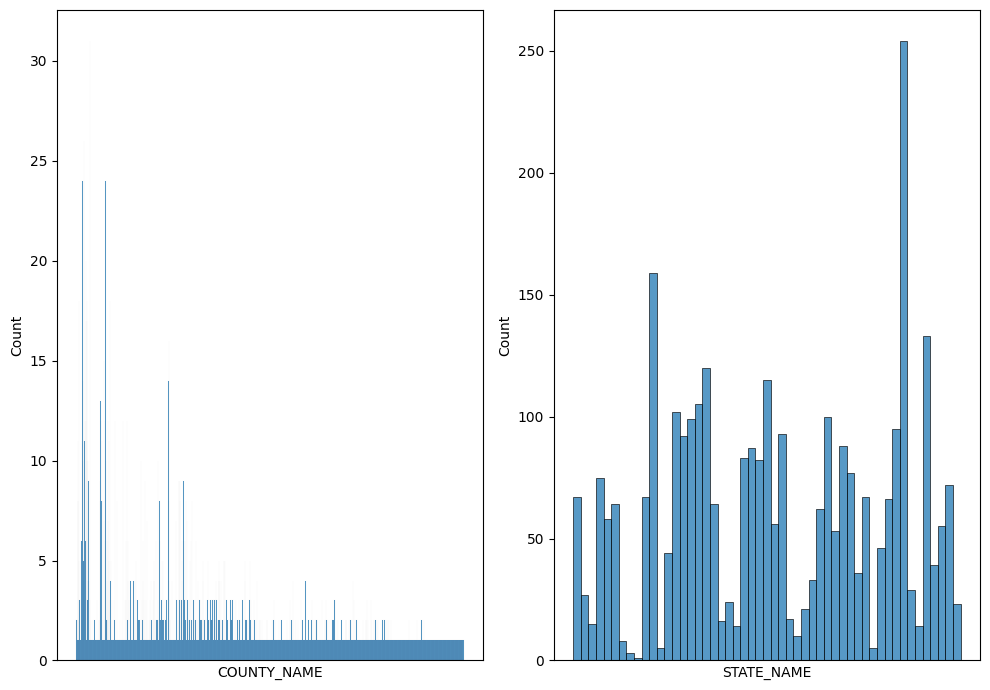

In [14]:
#Analysis of categorial variables
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 2, figsize=(10, 7))

# Creating a multiple histogram
sns.histplot(ax=axis[0], data=full_dataset, x="COUNTY_NAME").set_xticks([])
sns.histplot(ax=axis[1], data=full_dataset, x="STATE_NAME").set_xticks([])

# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()

Although there are a few states and counties with a higher representation on the graph, there is quite a diverse distribution.

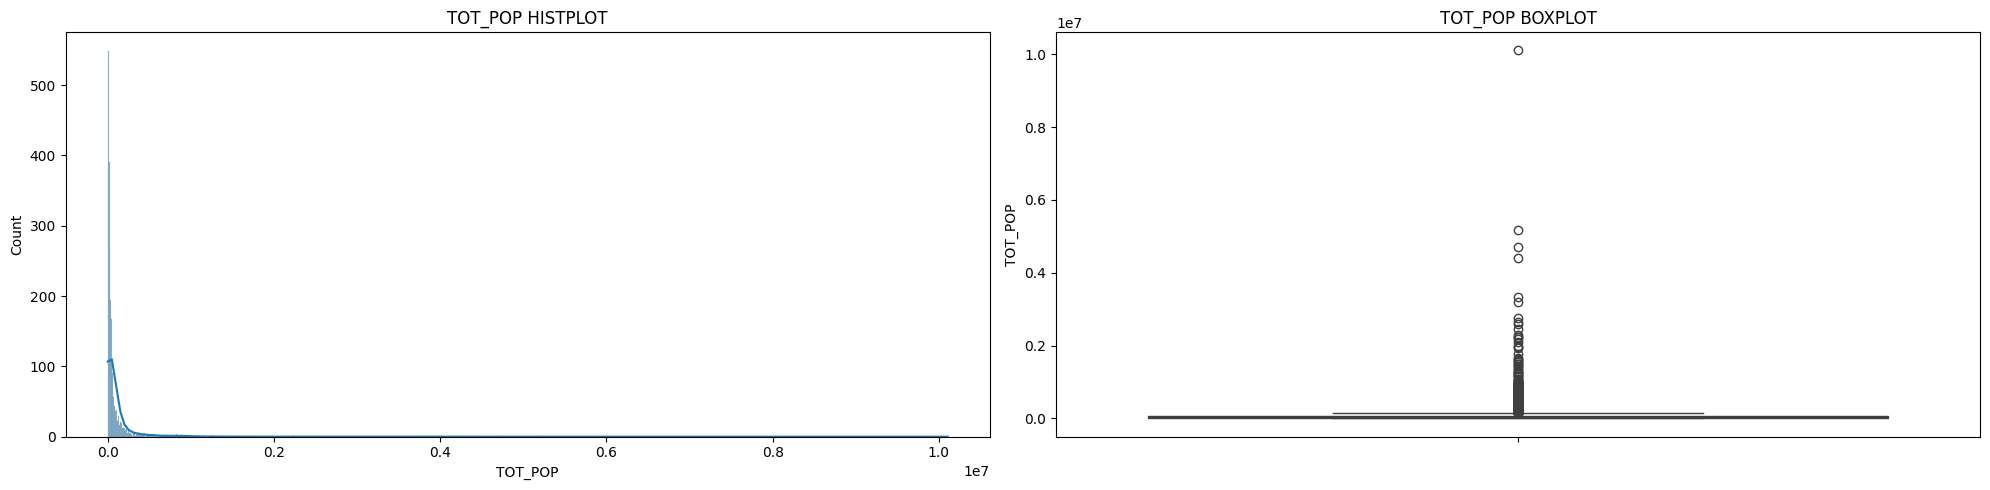

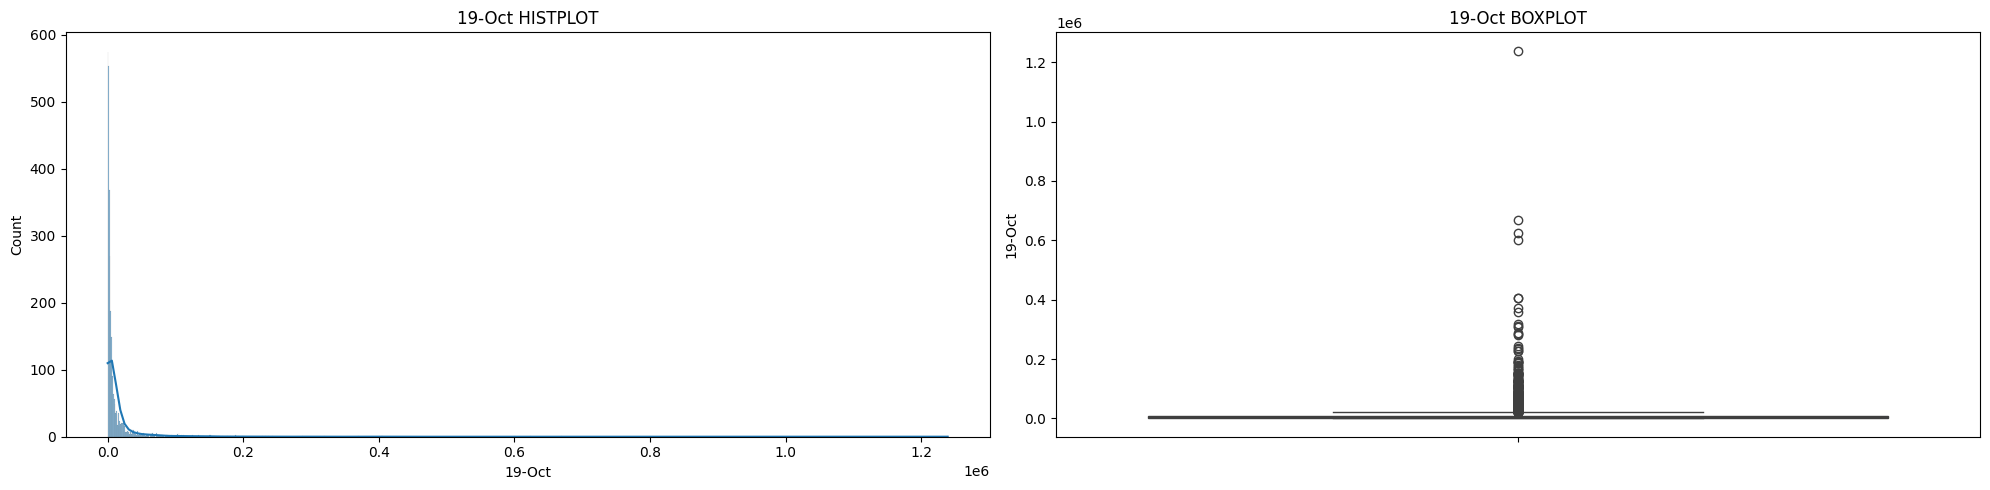

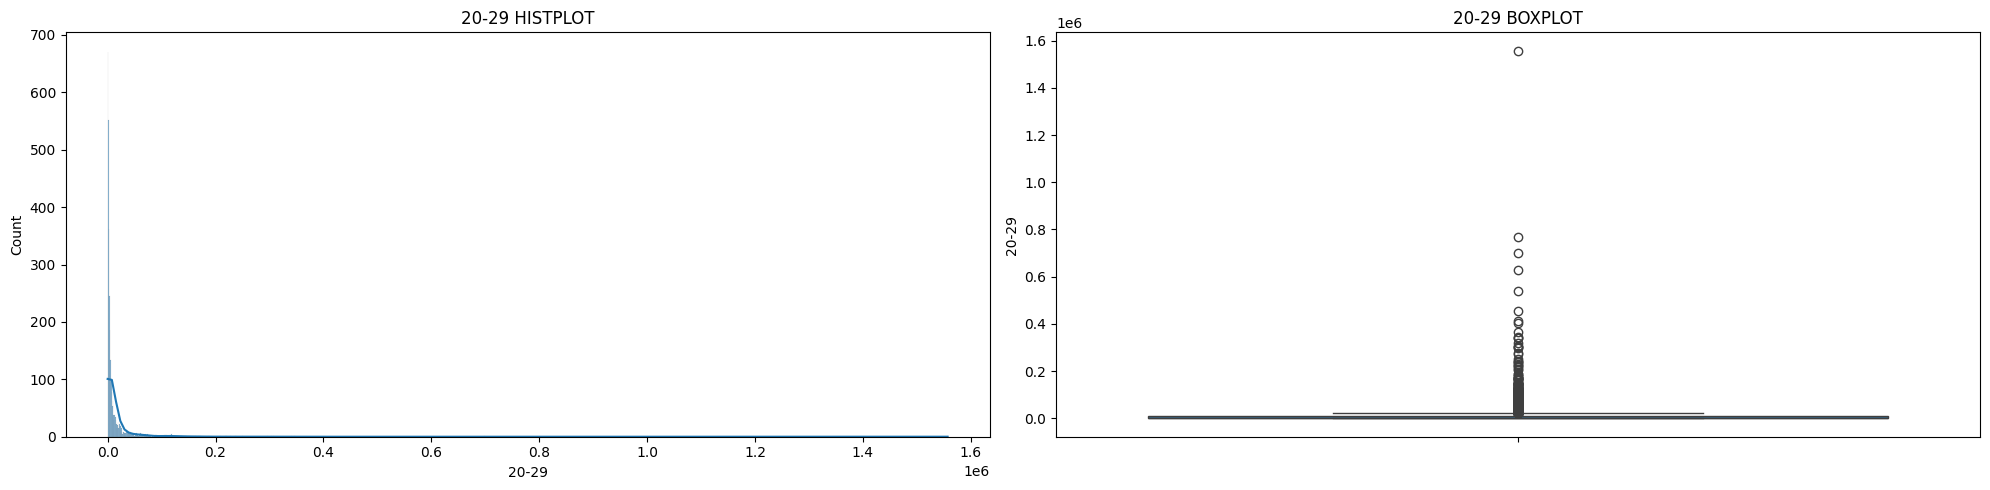

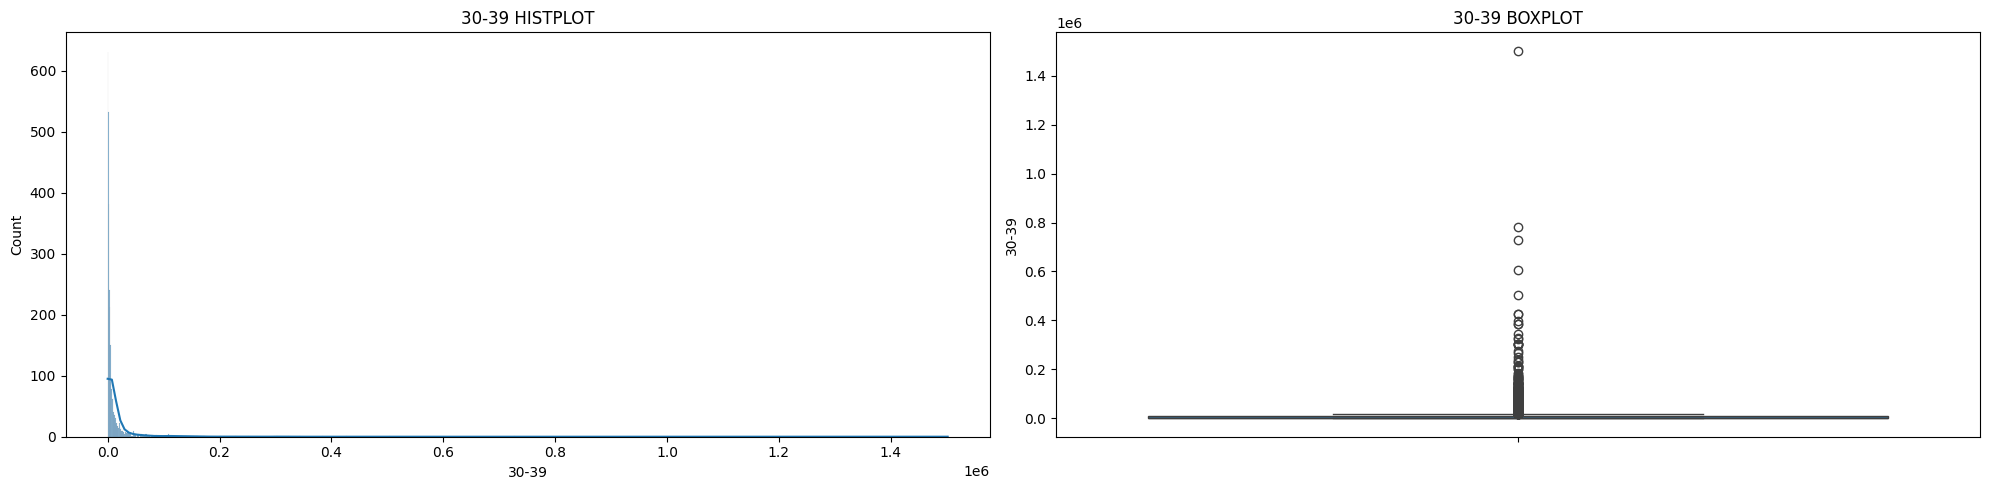

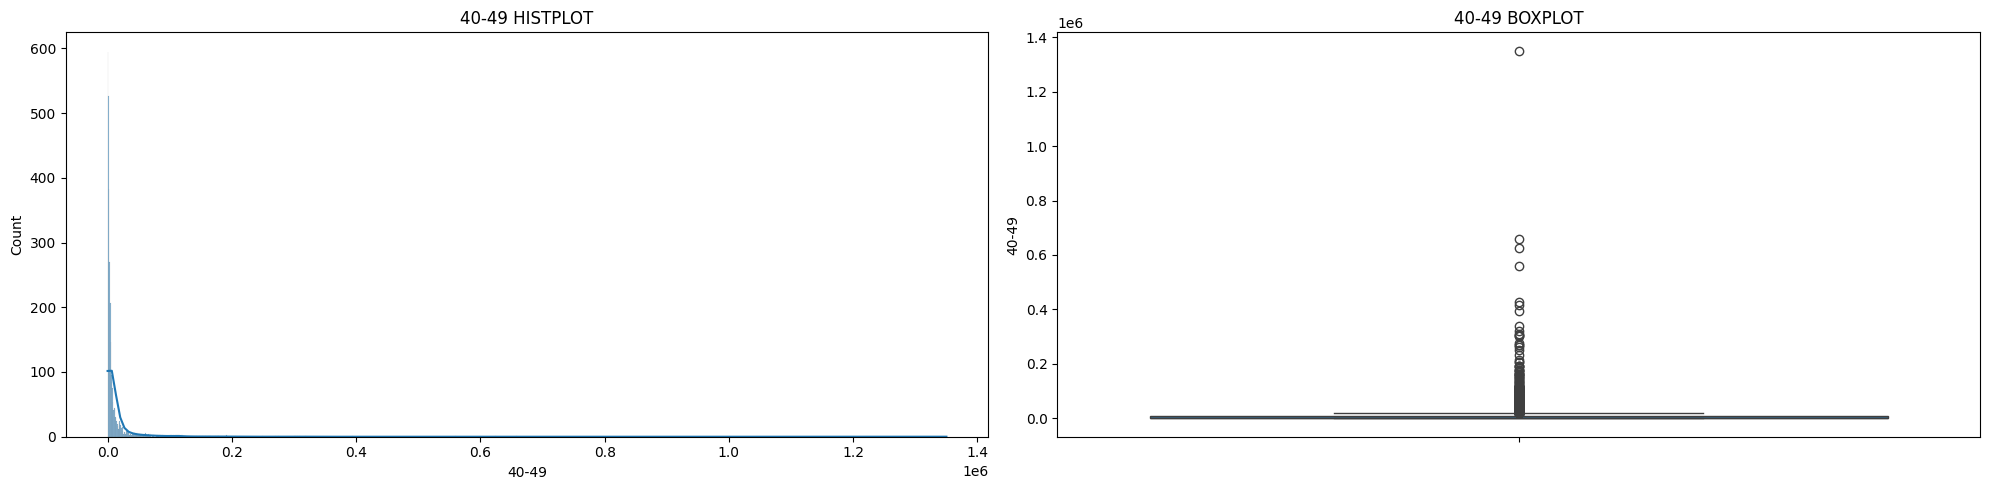

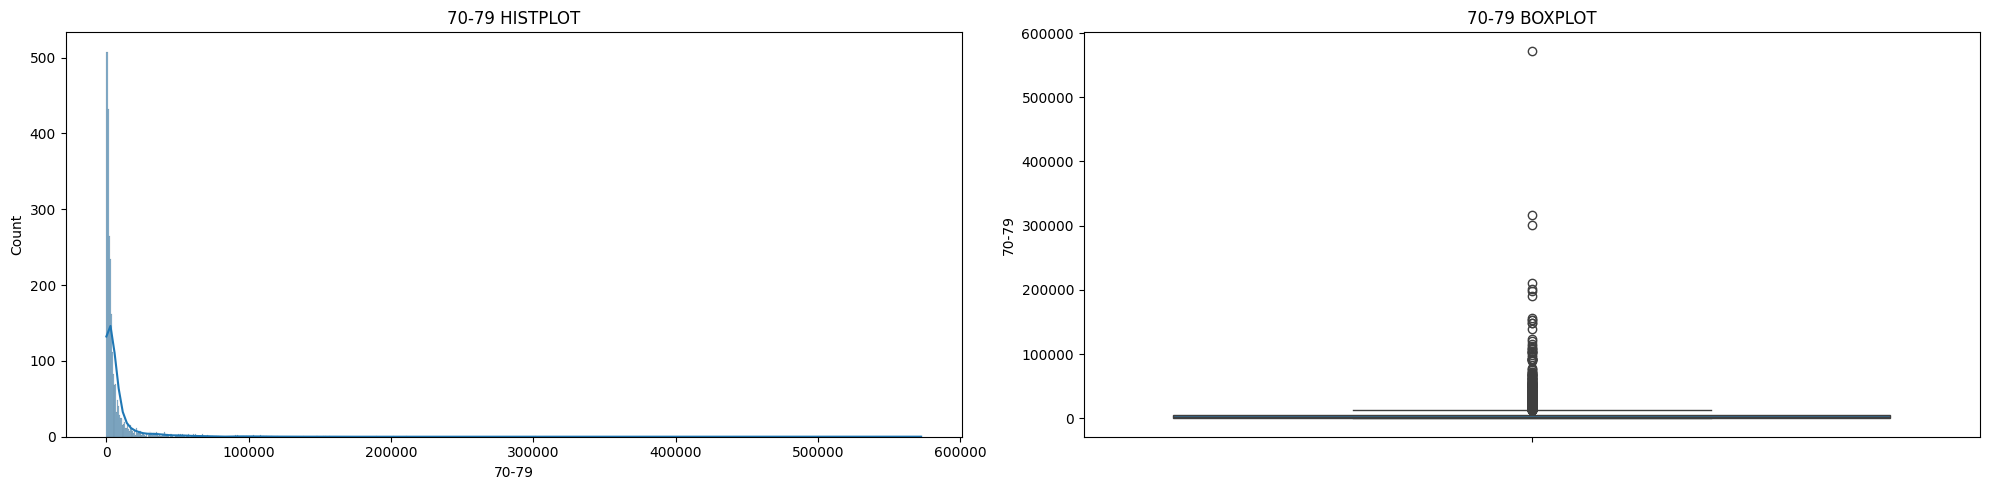

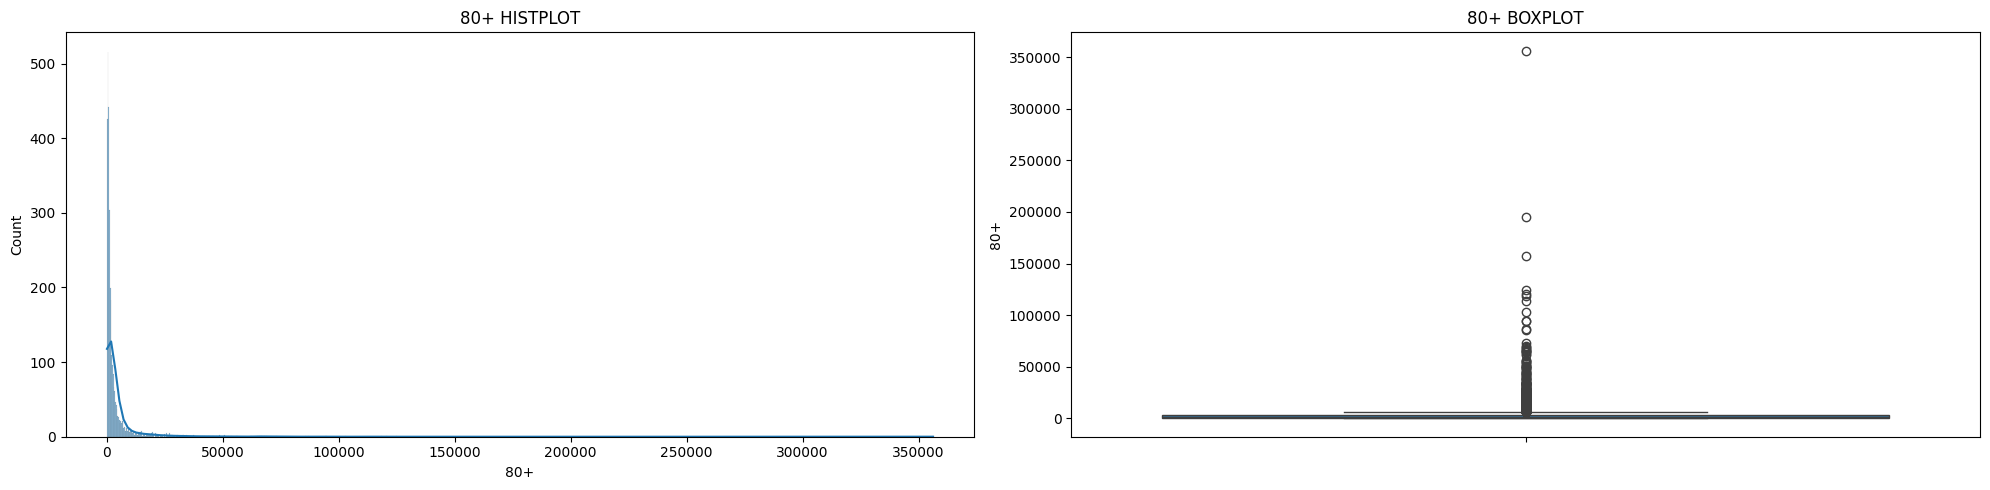

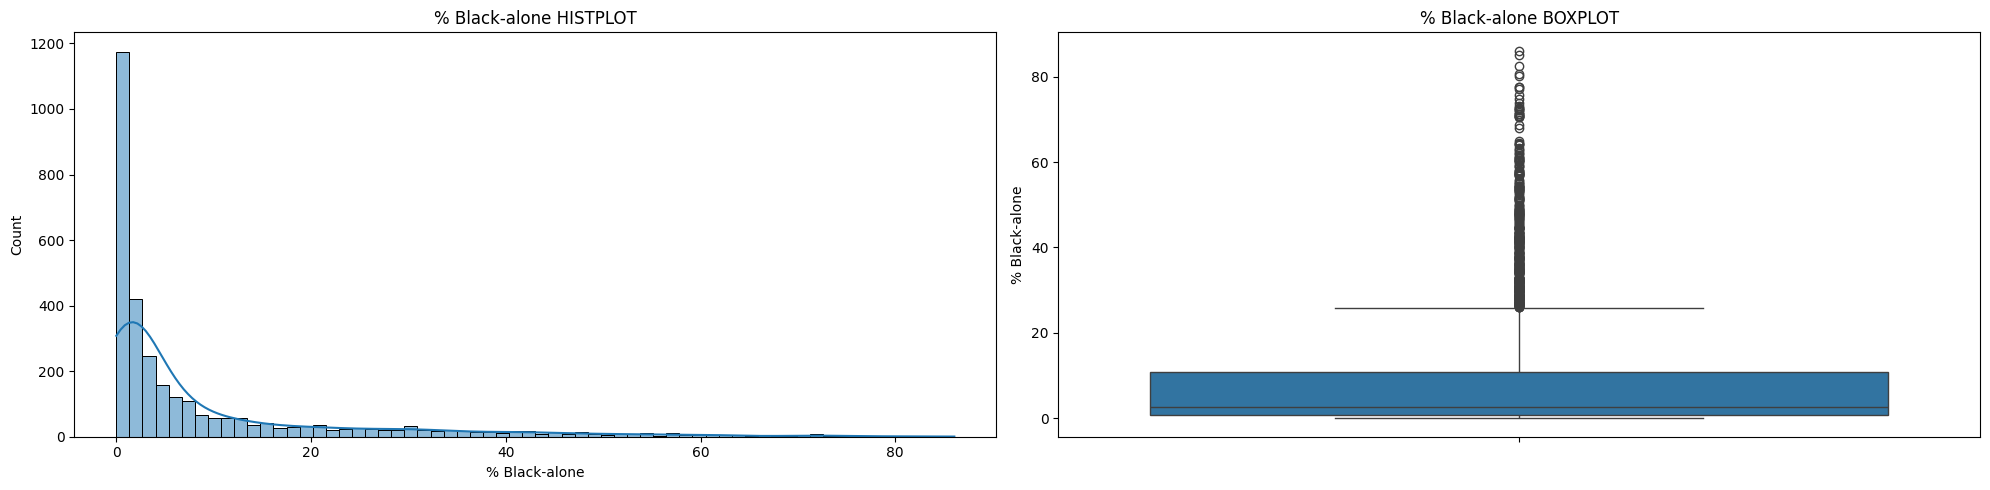

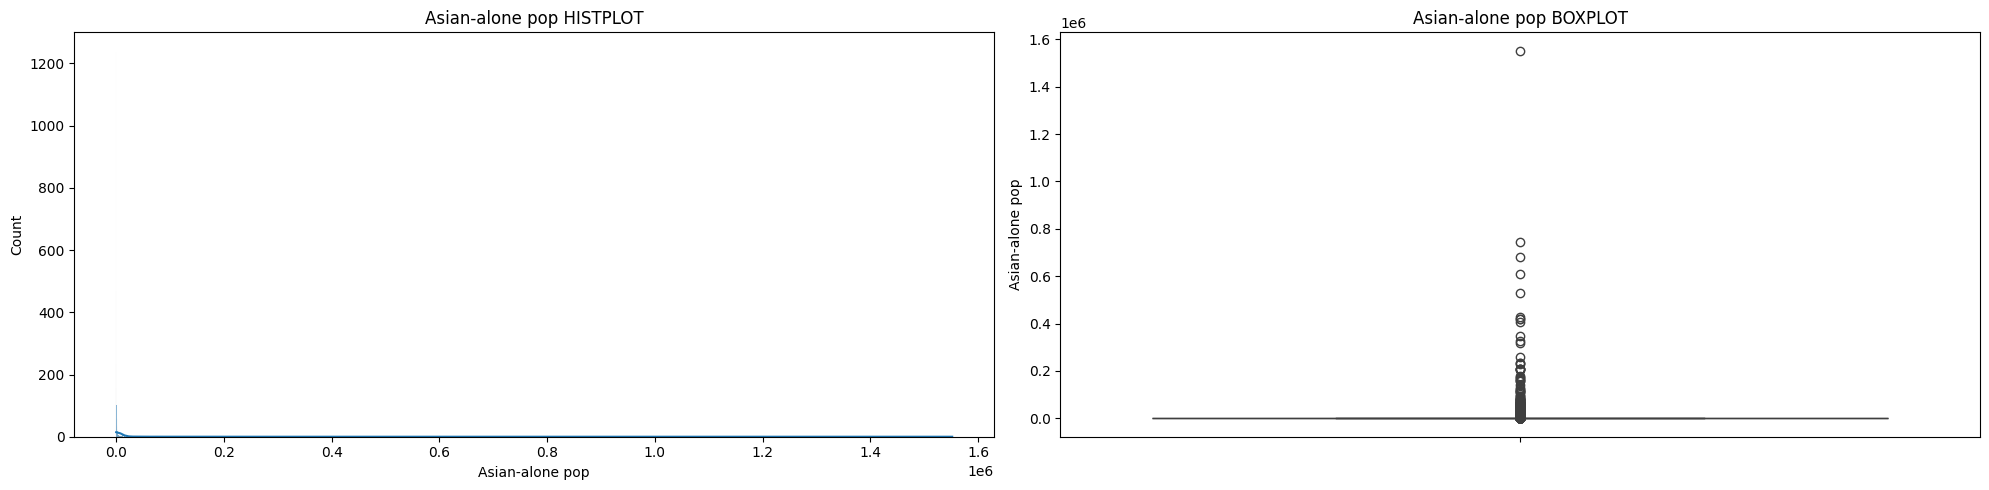

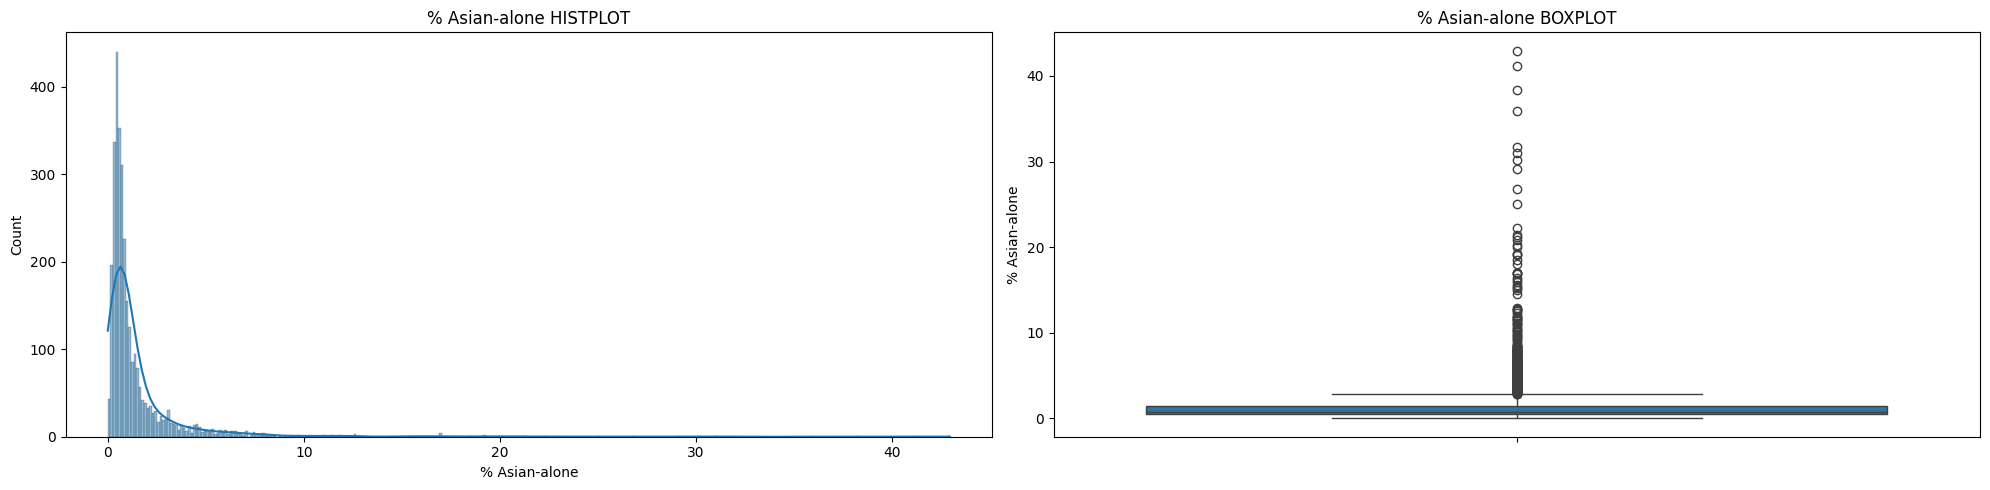

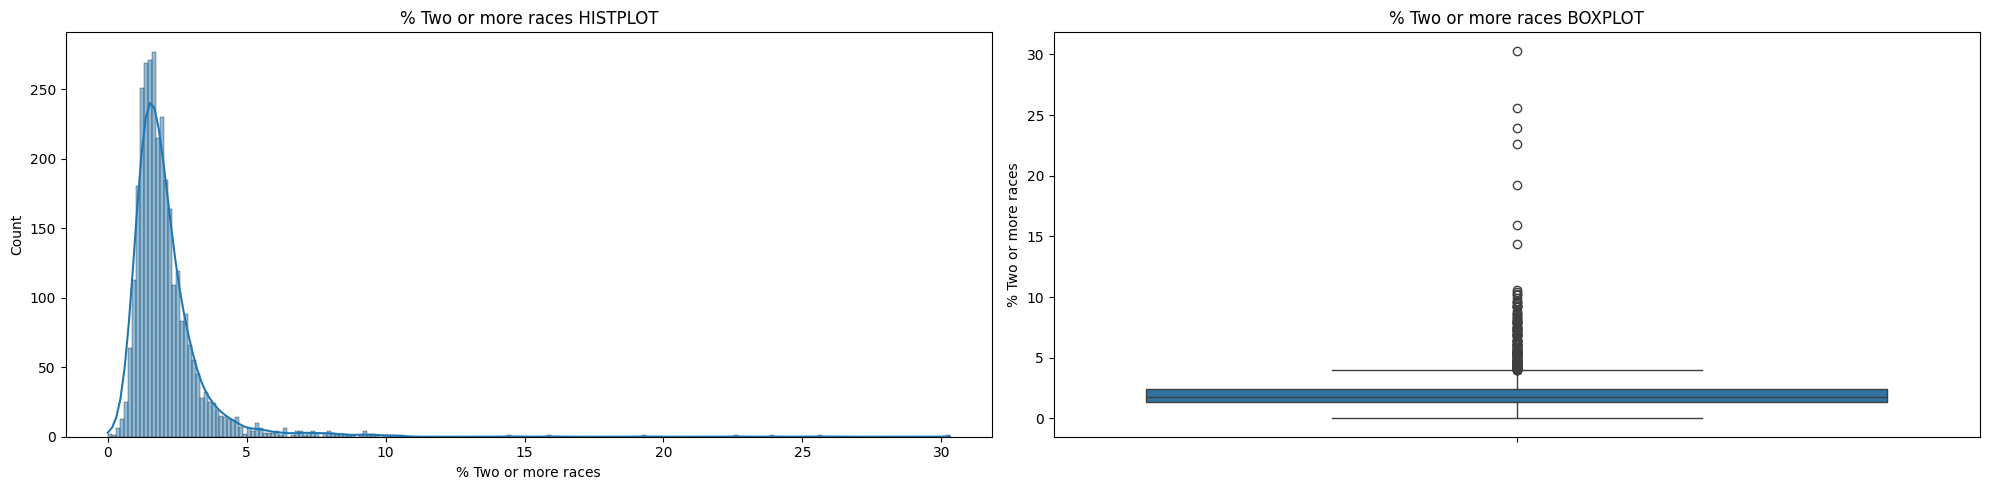

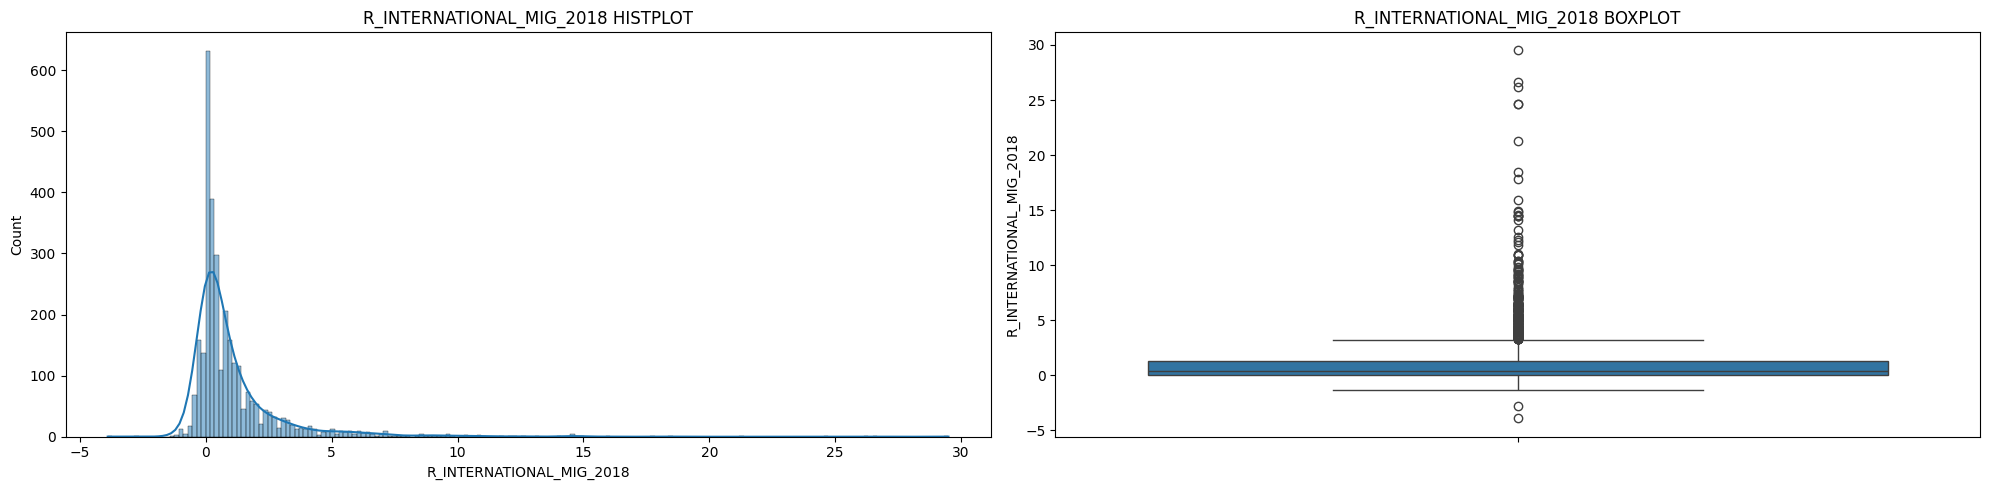

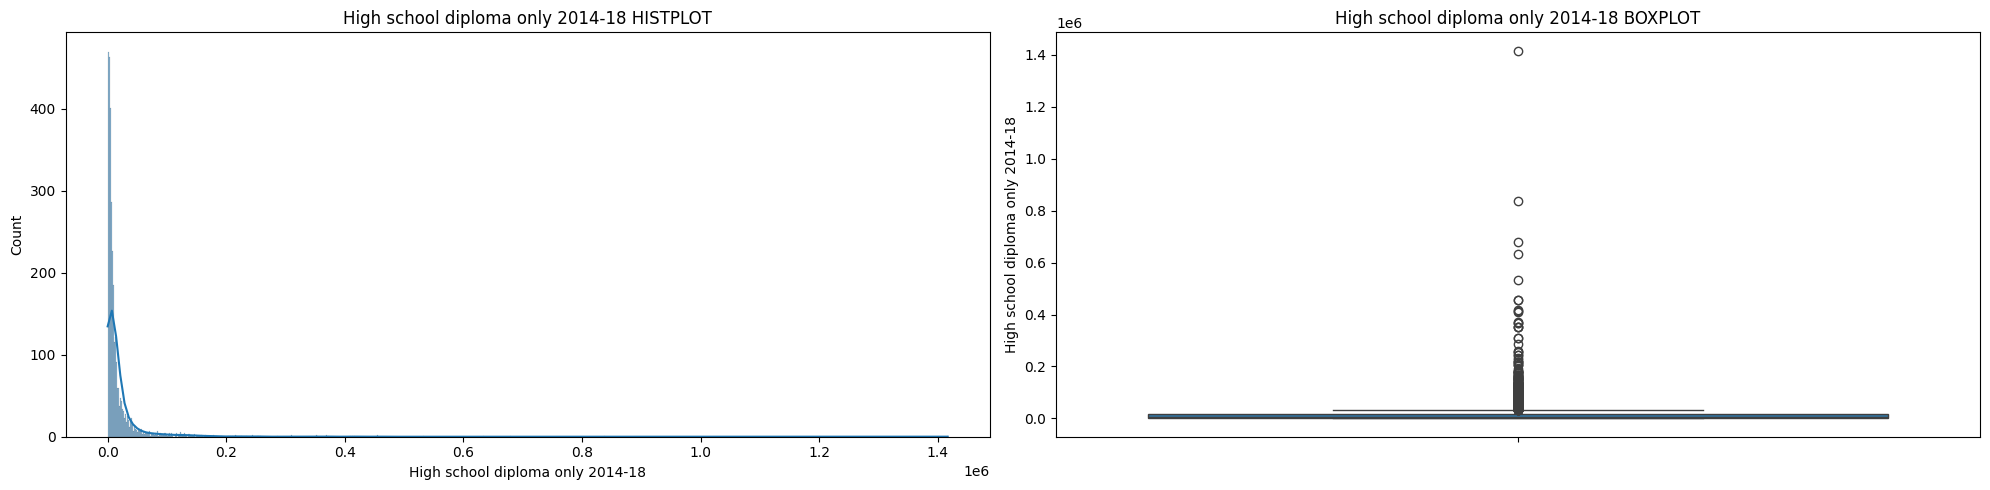

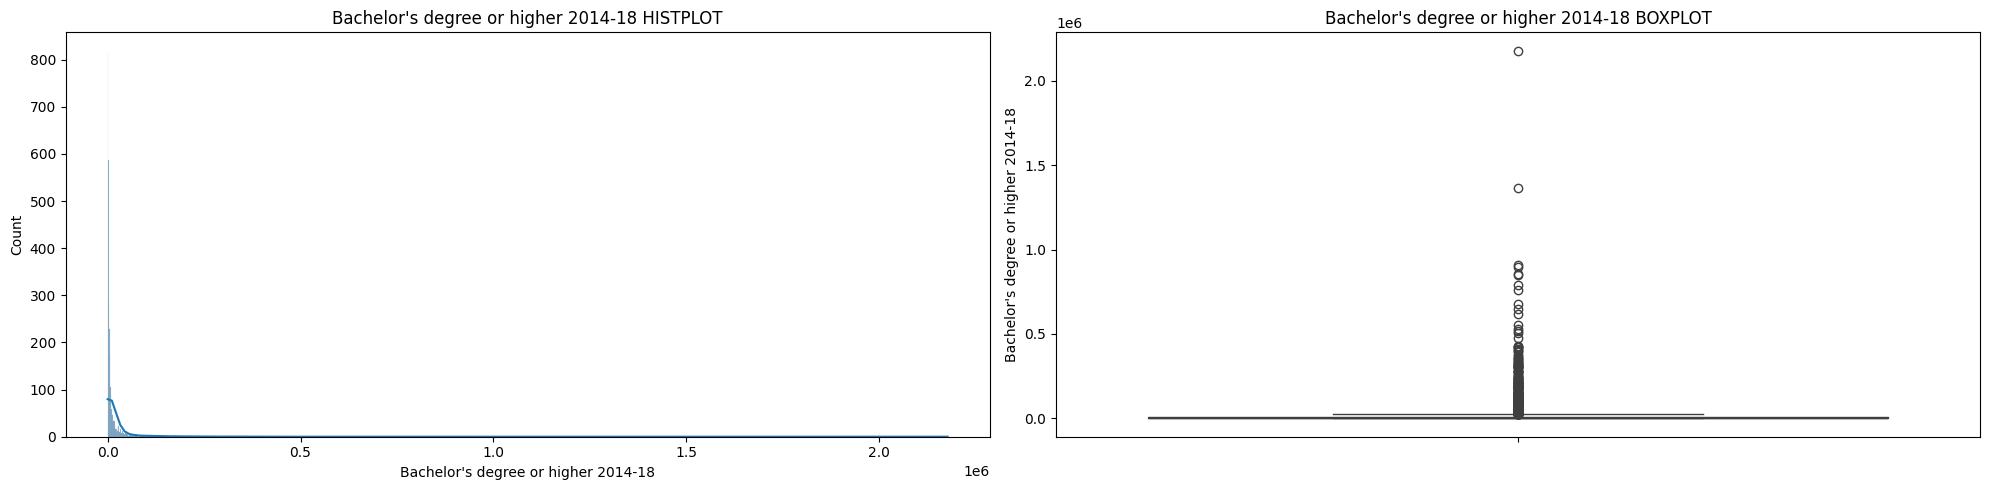

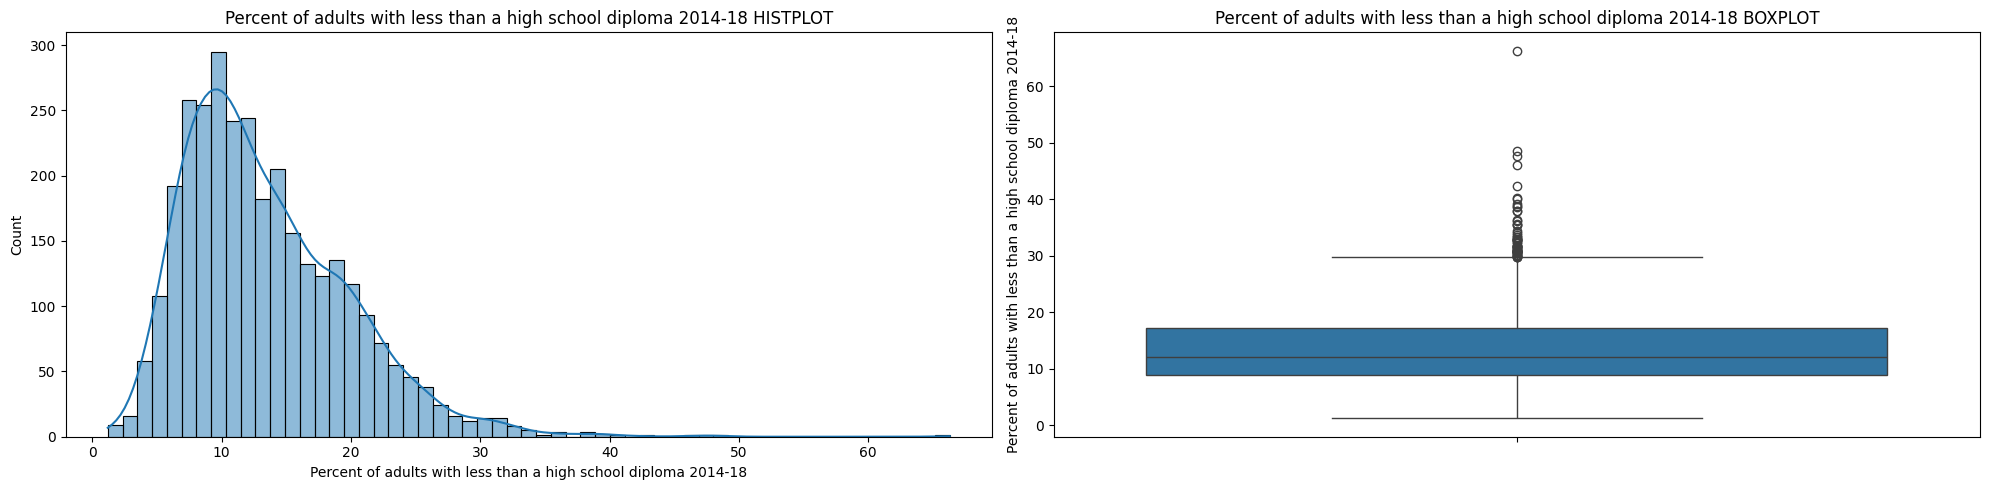

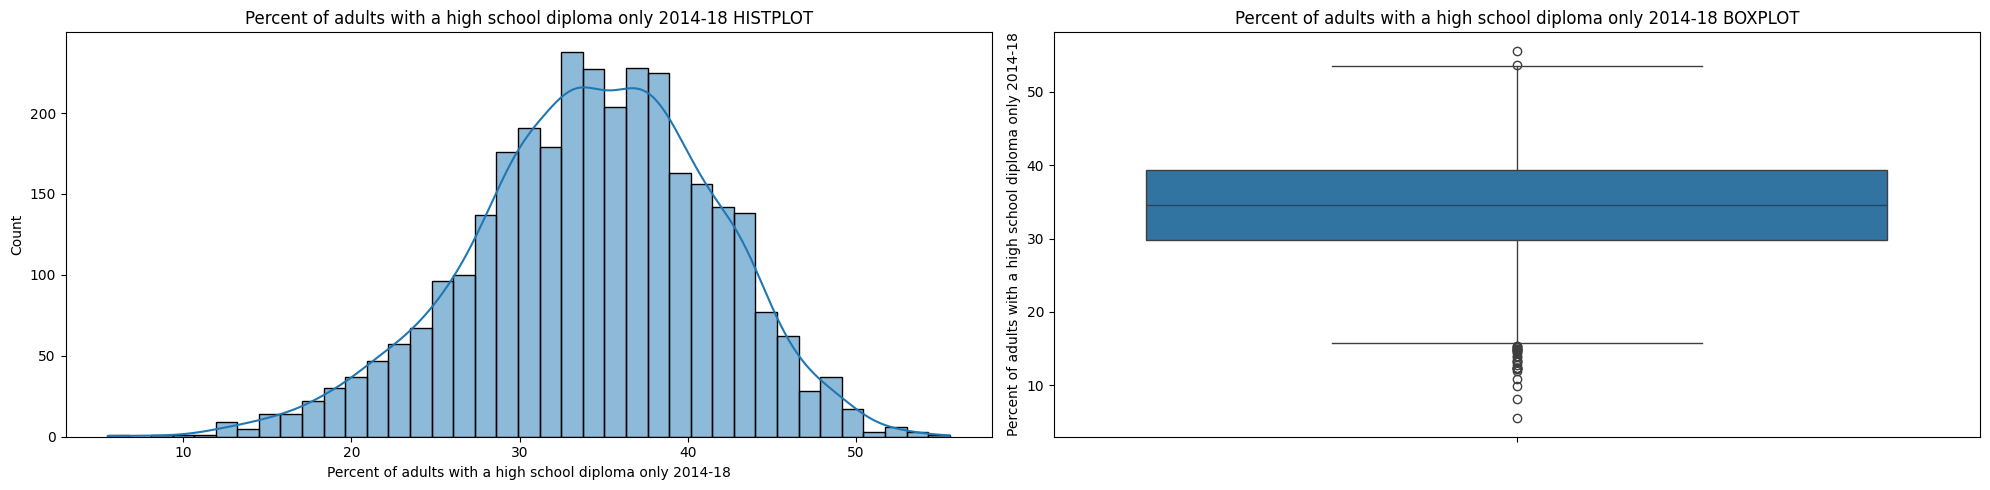

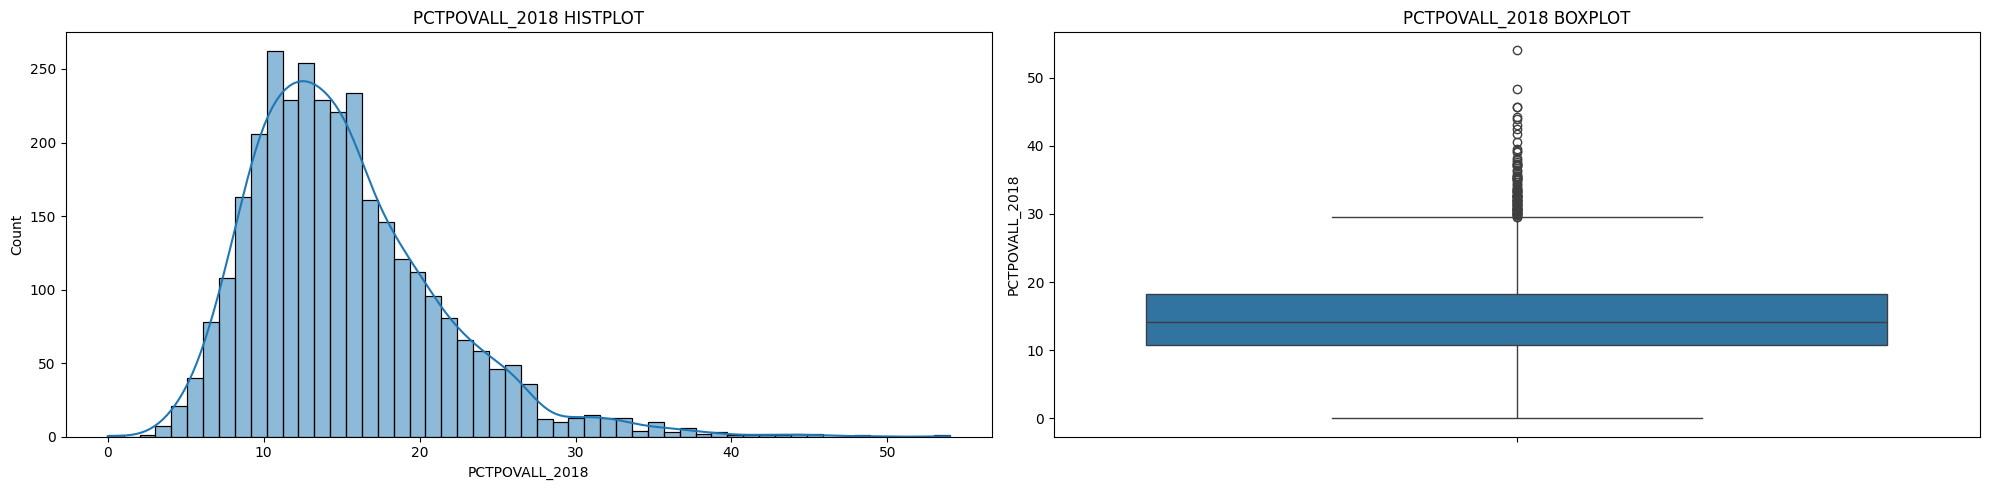

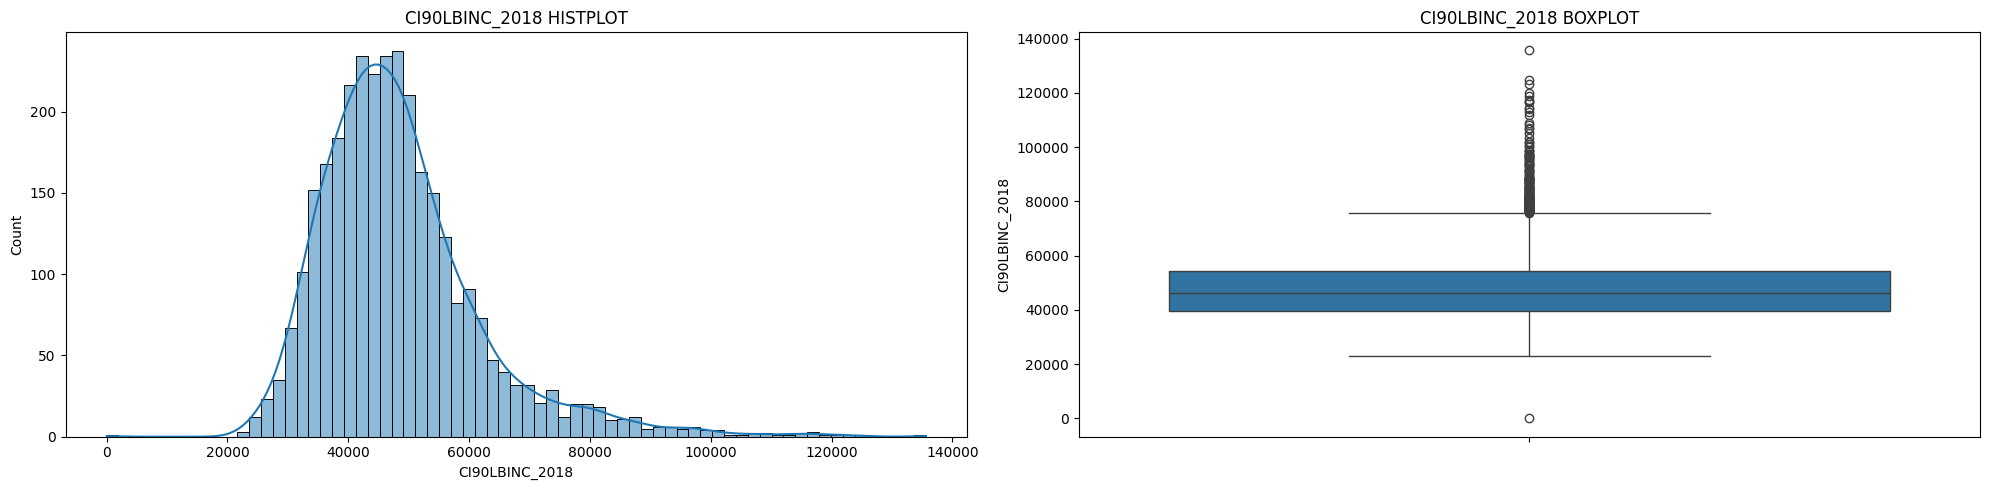

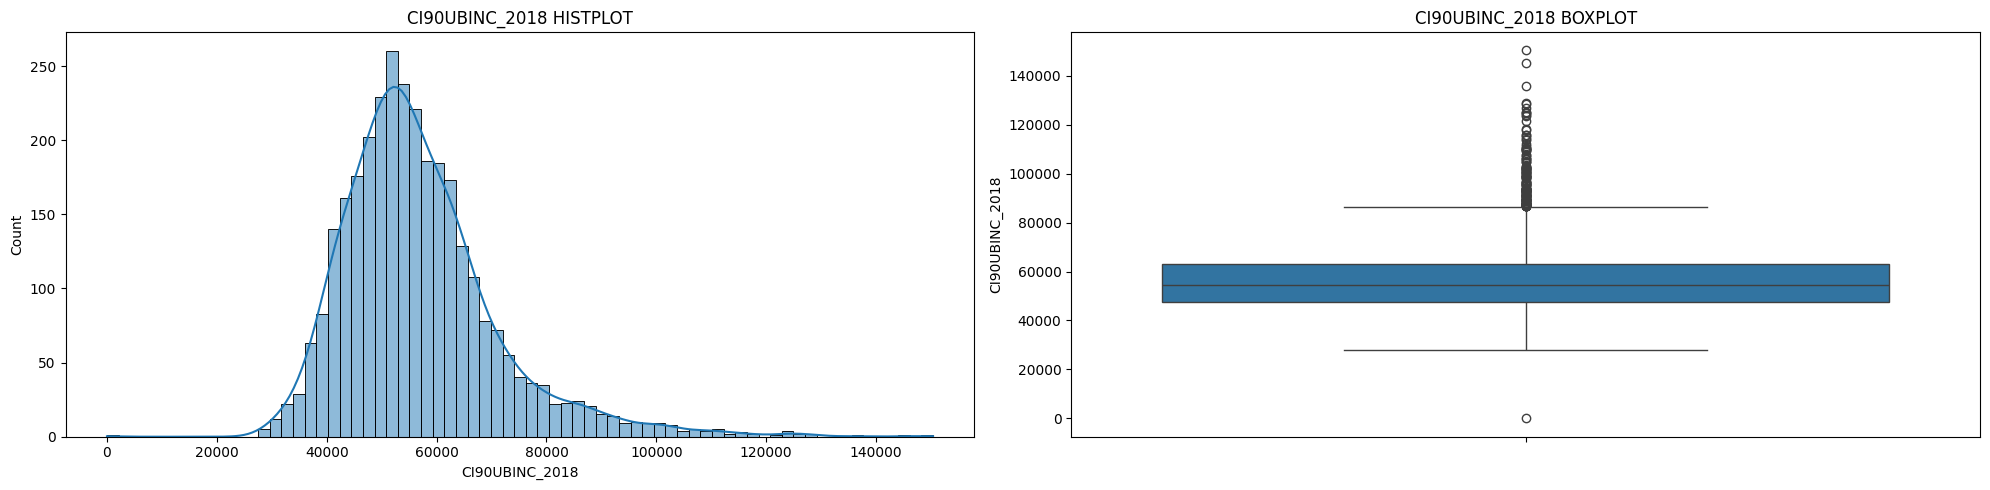

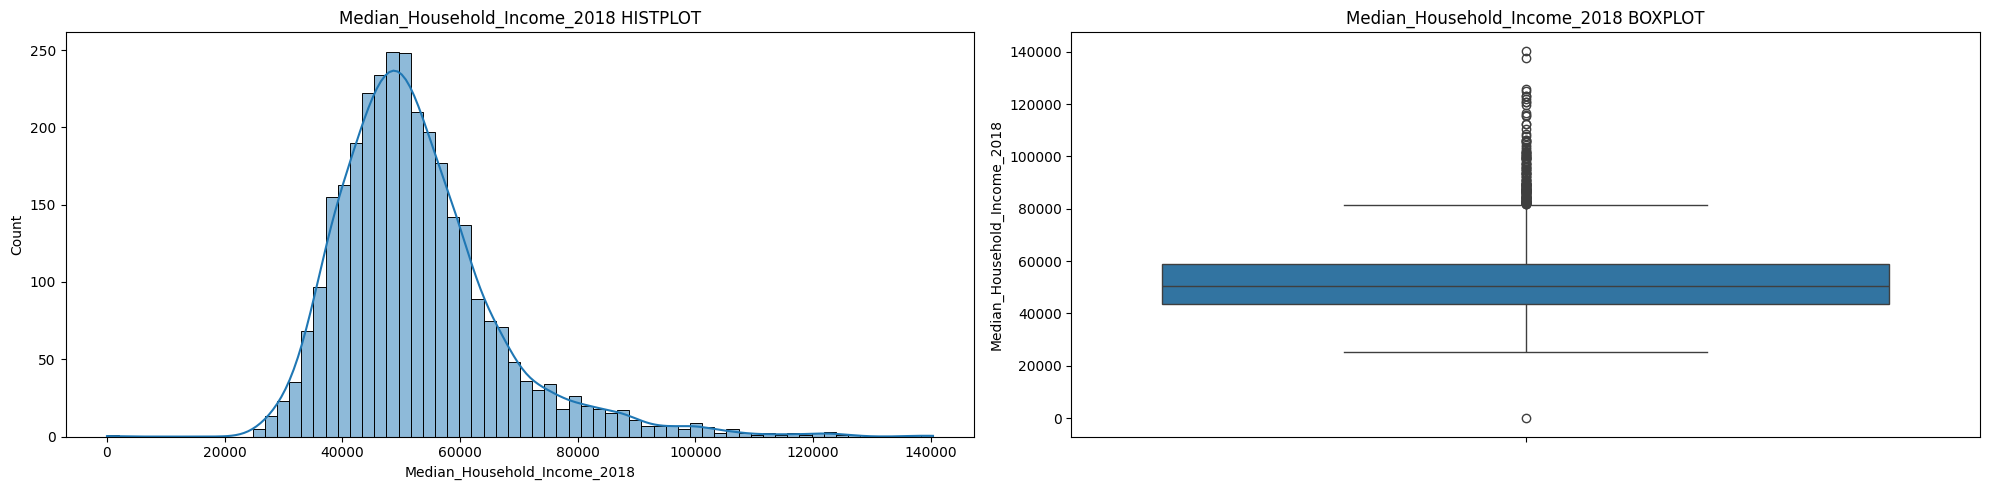

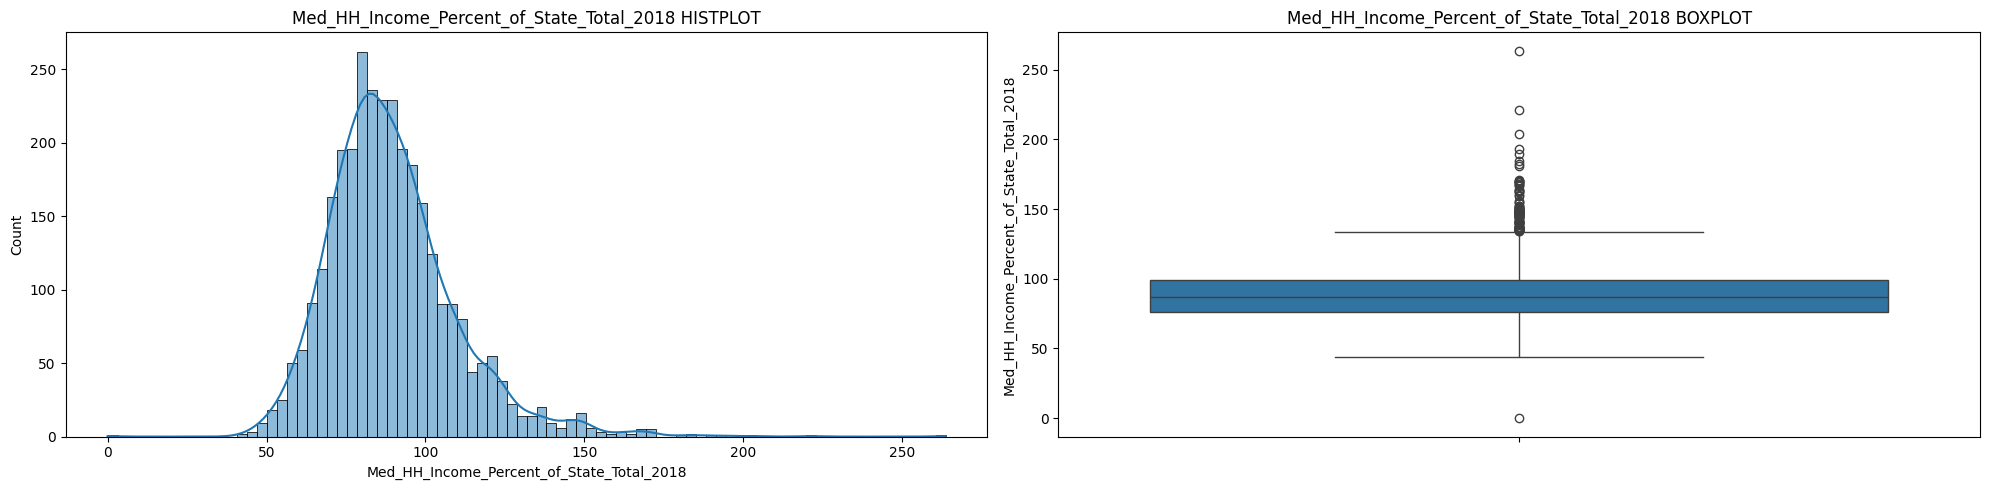

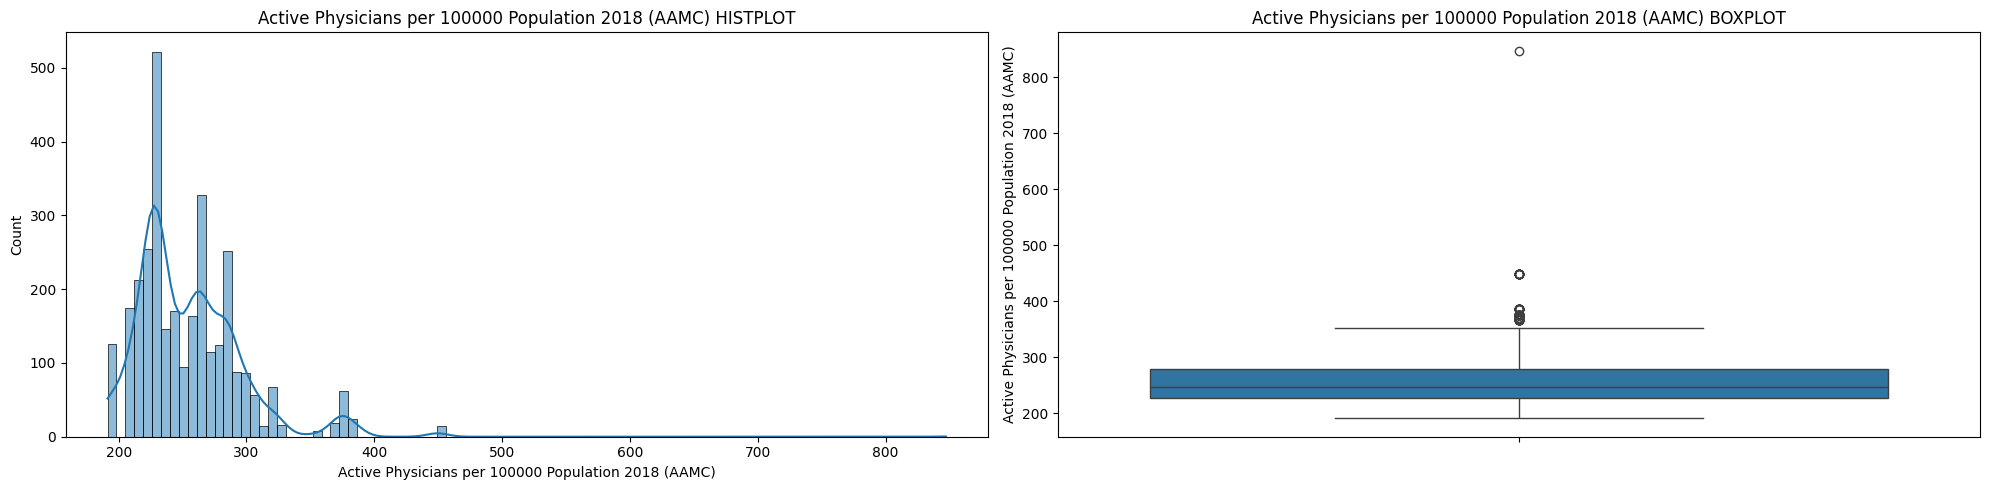

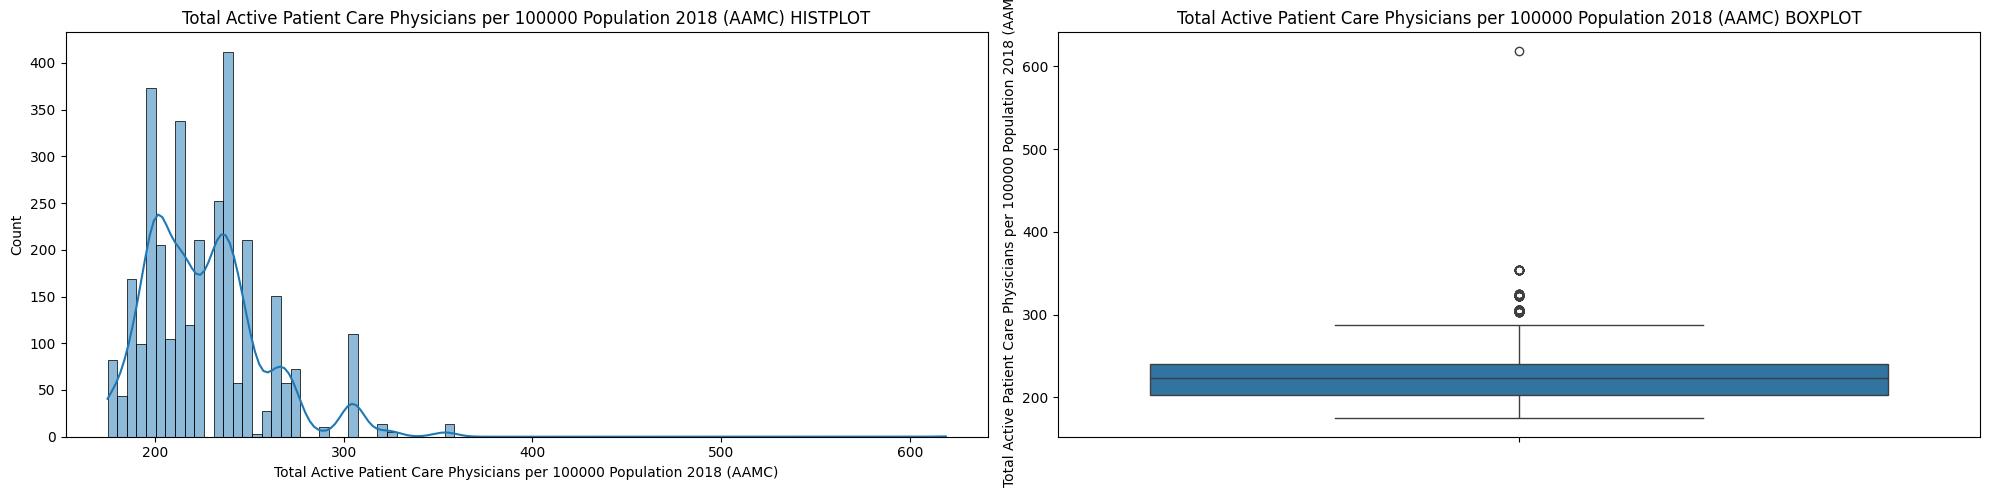

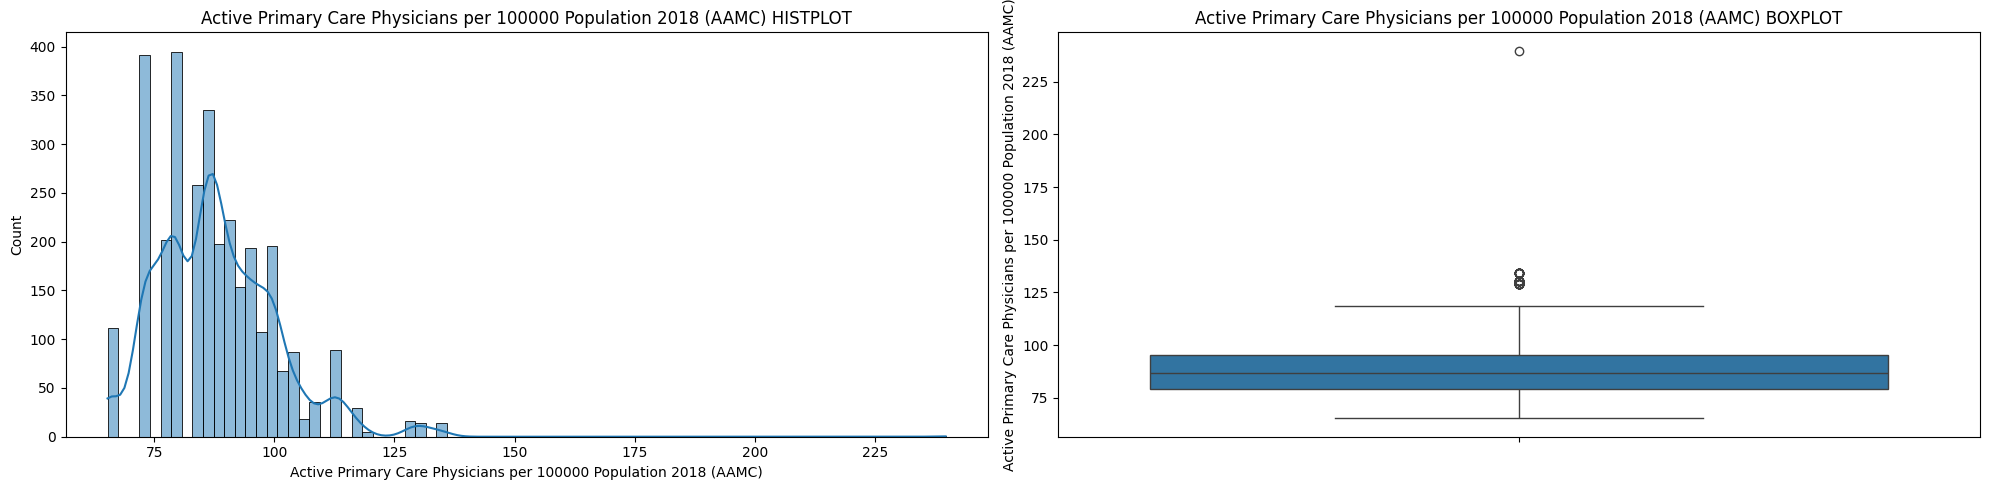

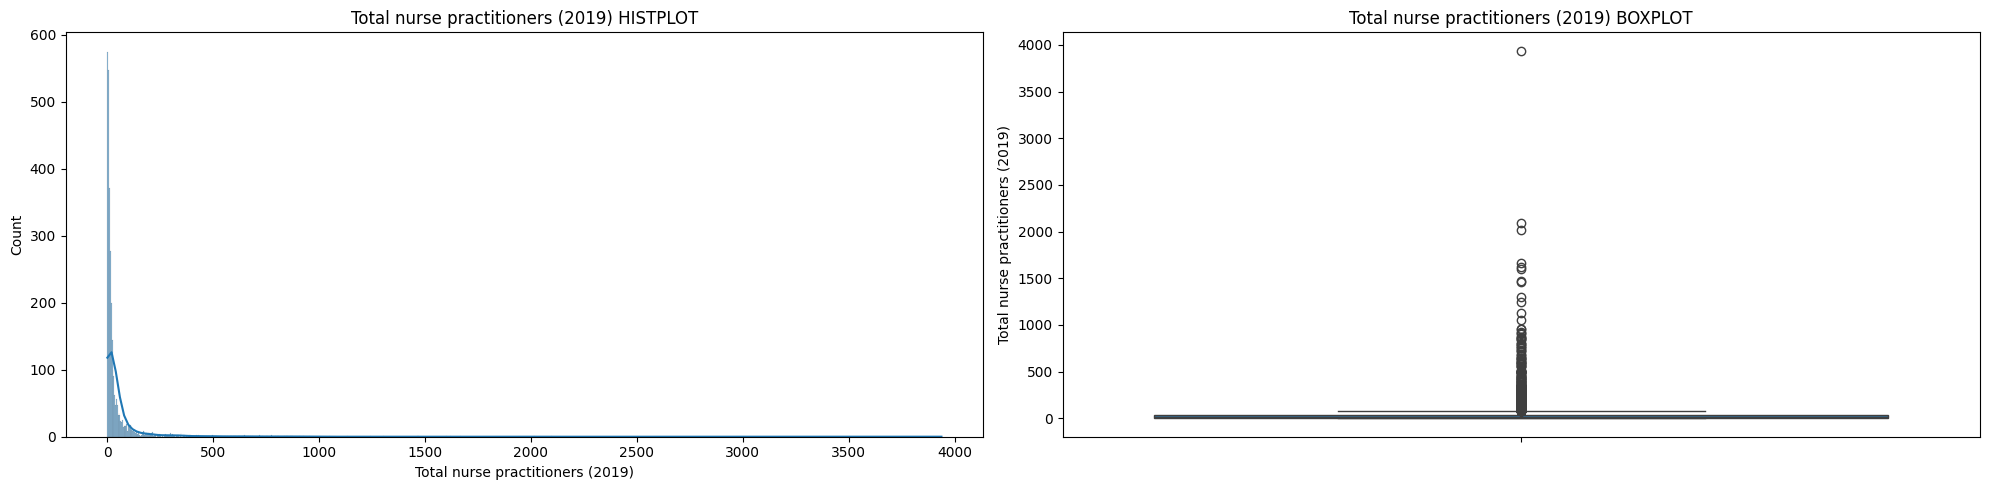

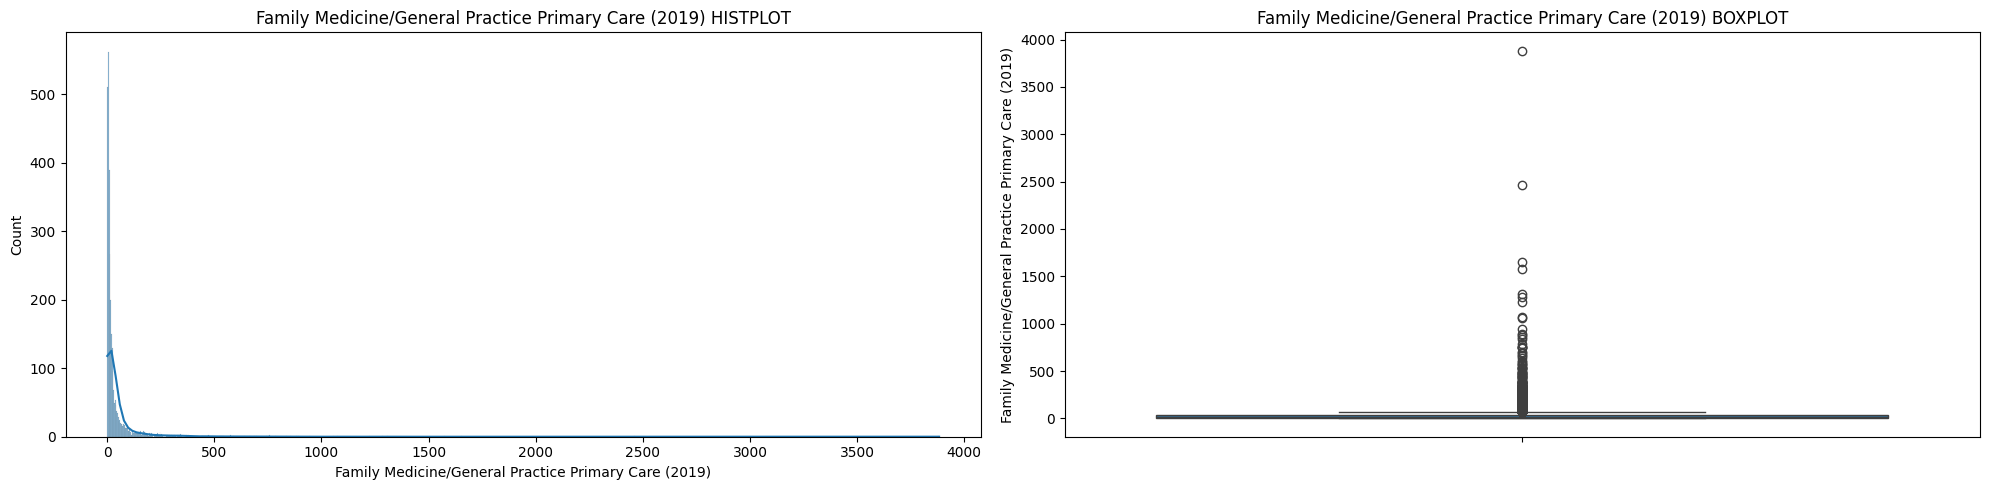

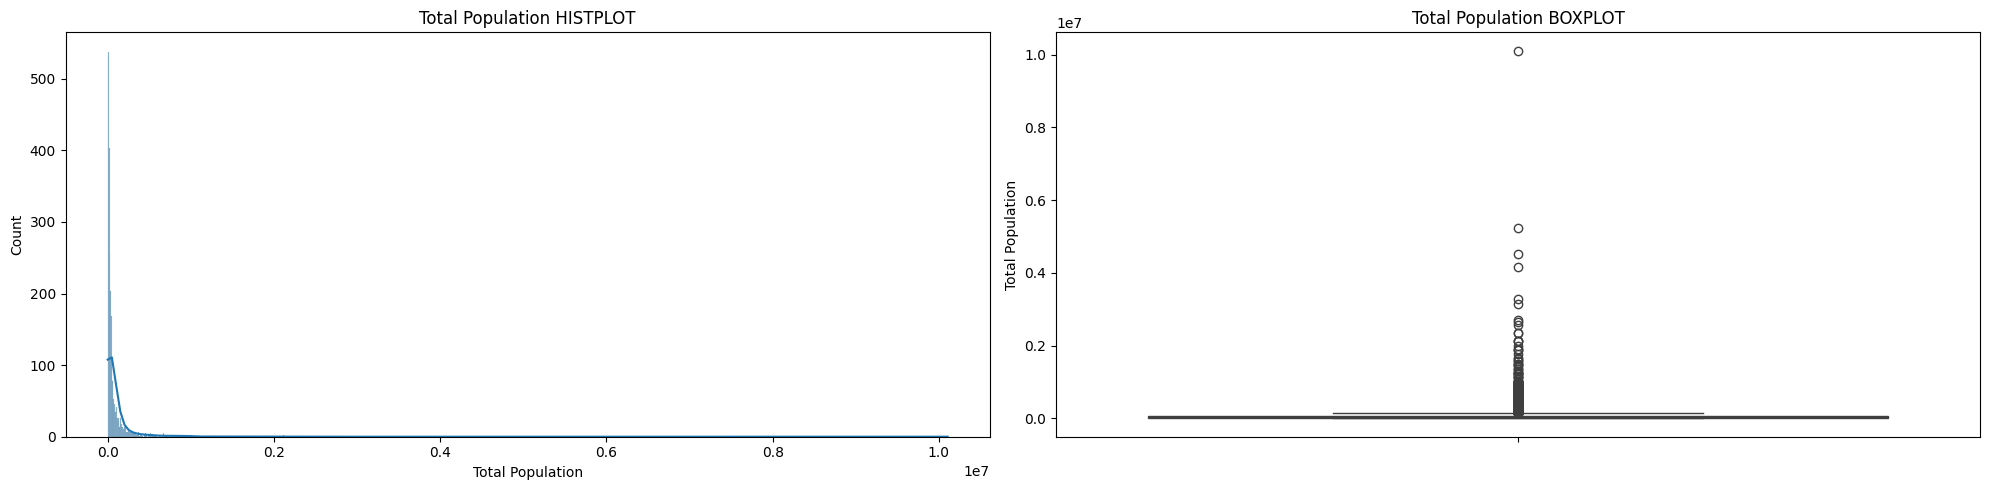

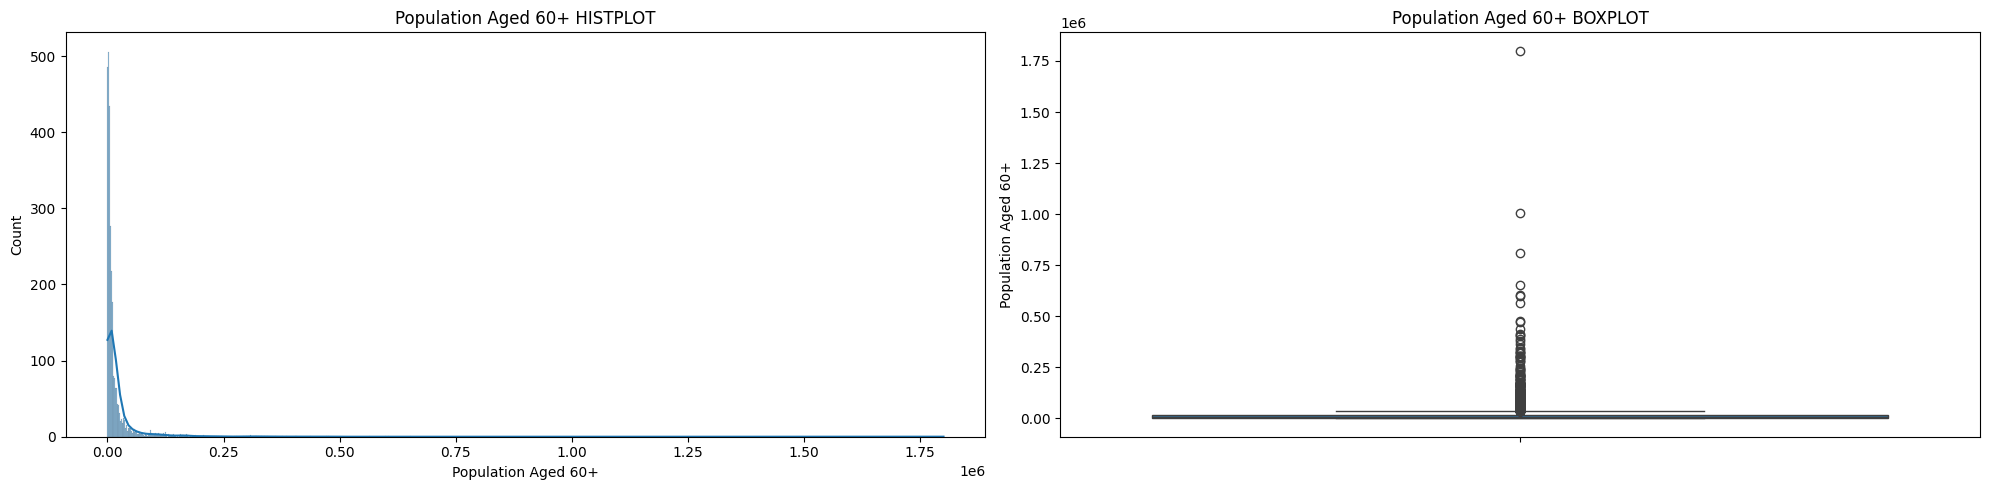

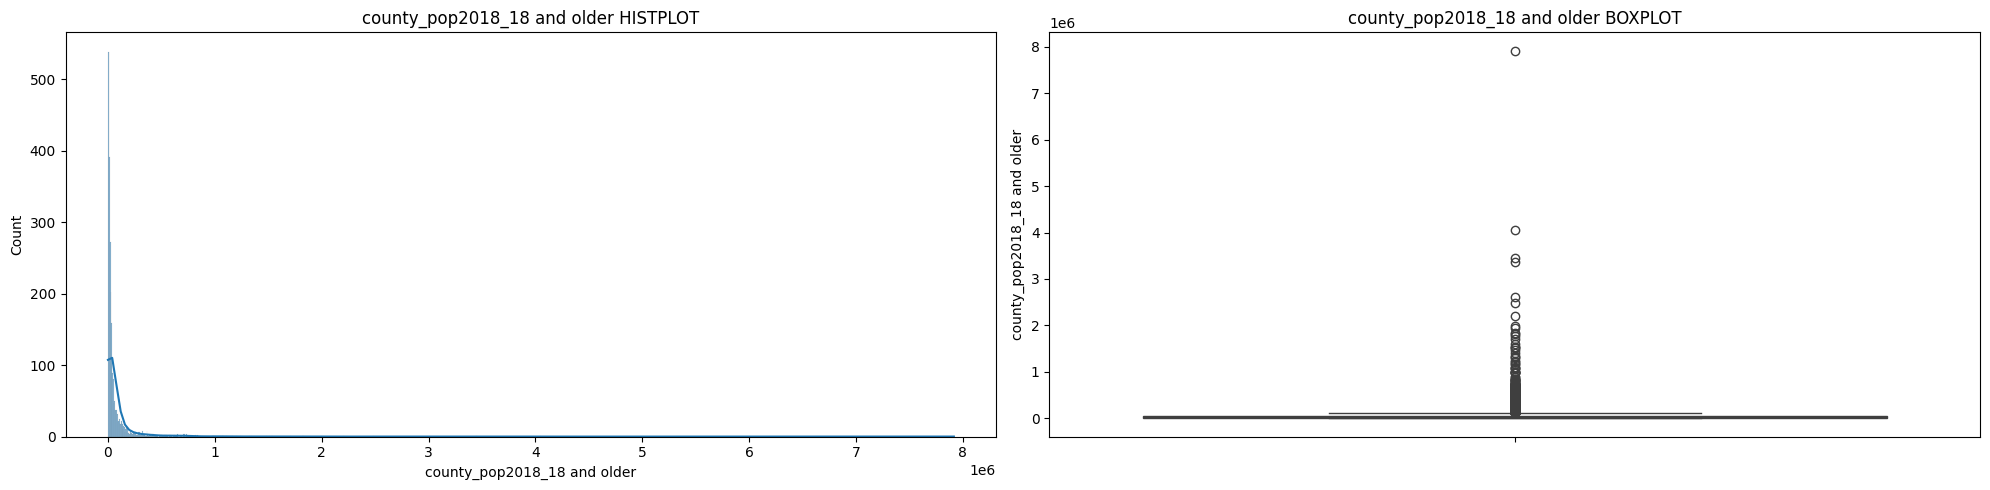

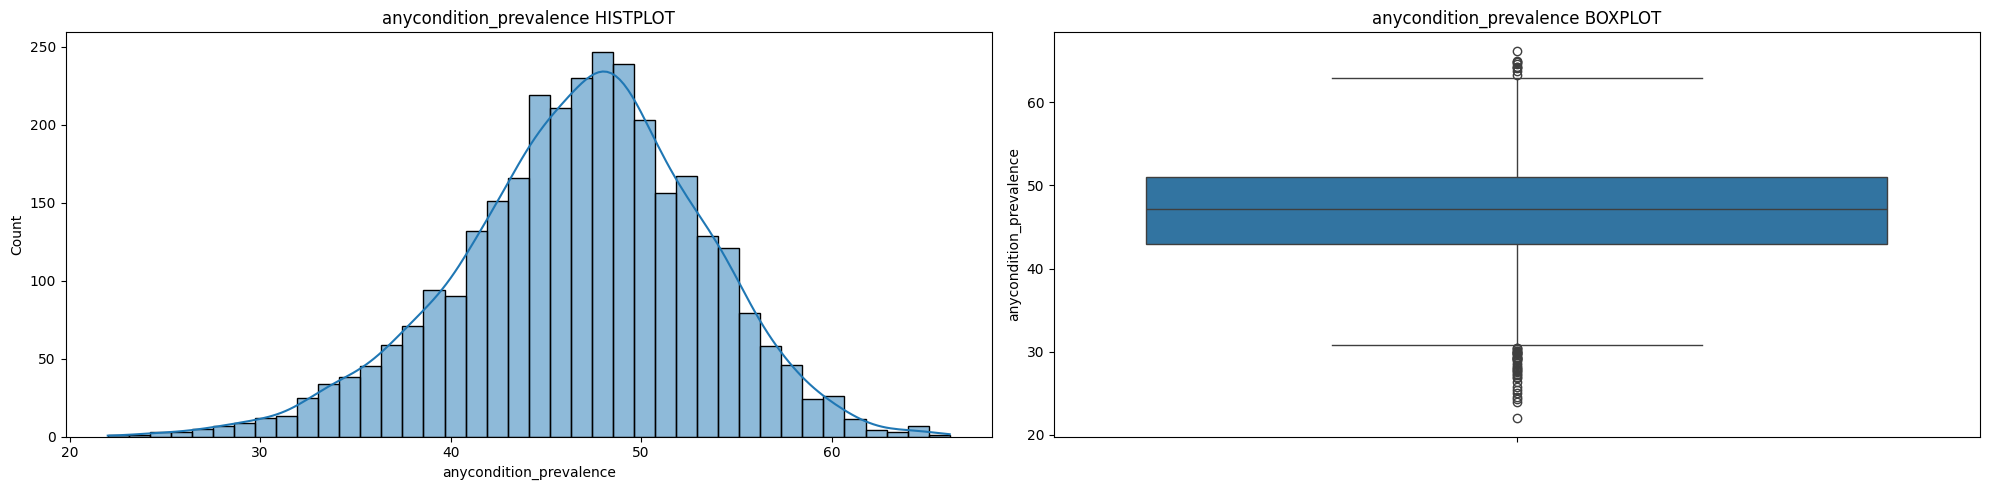

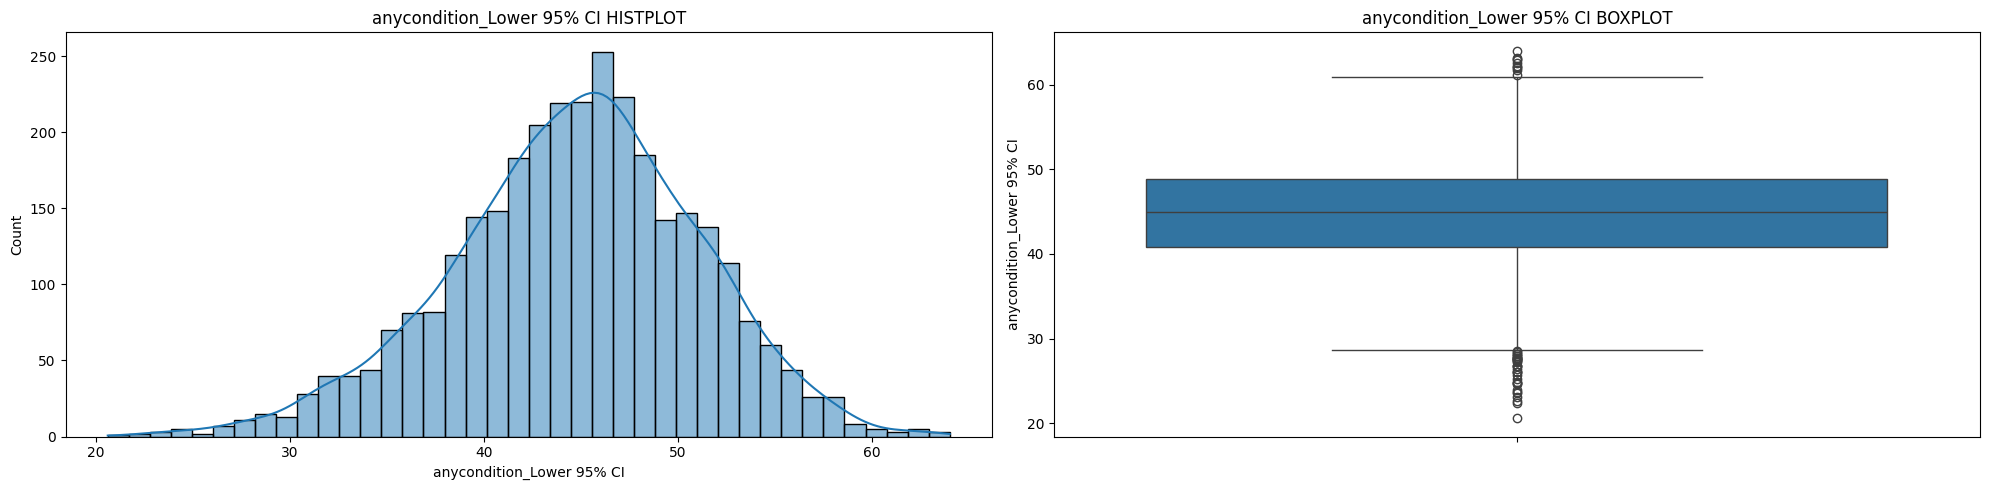

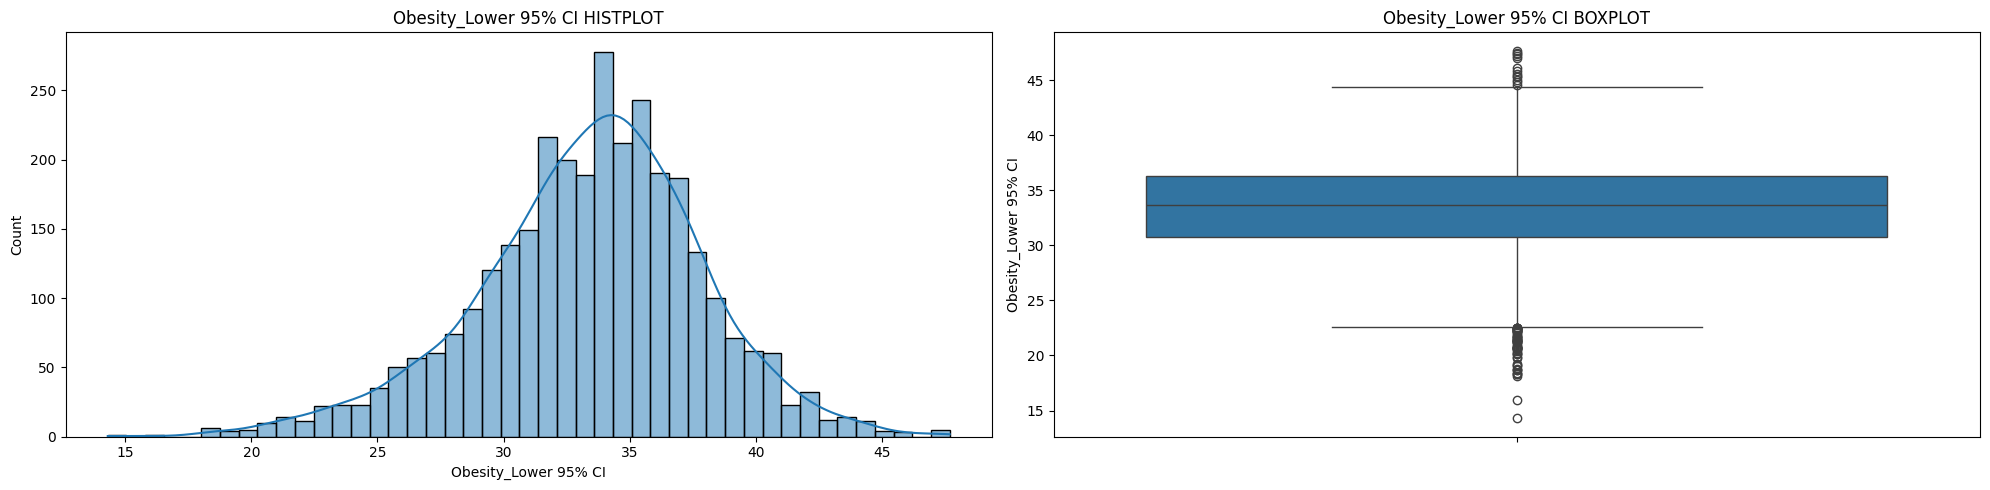

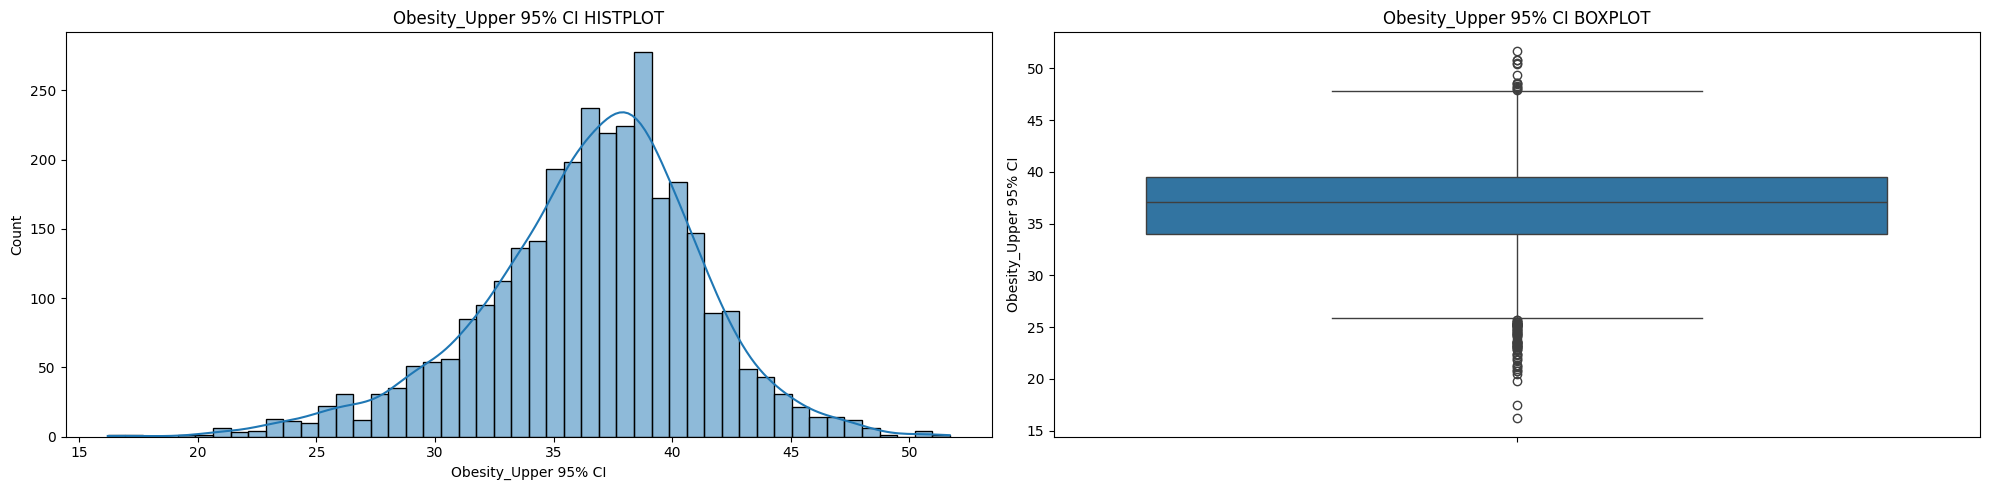

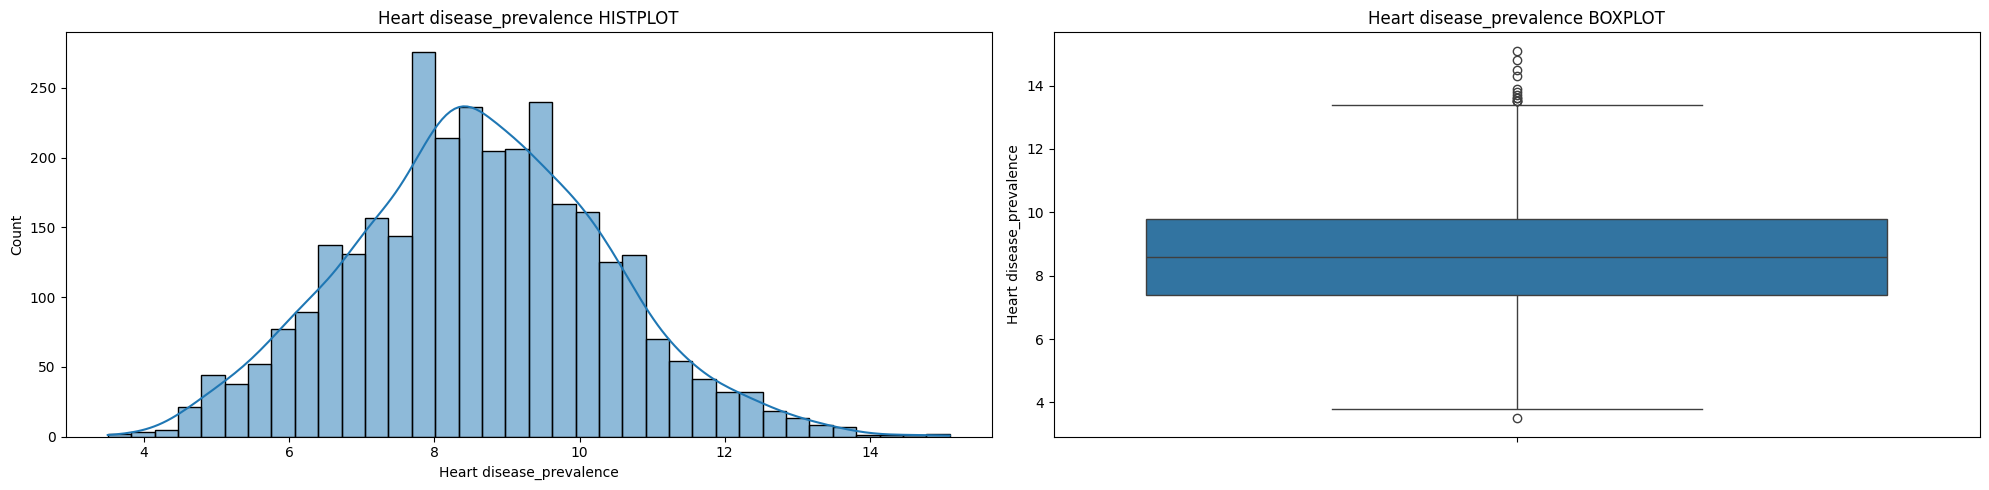

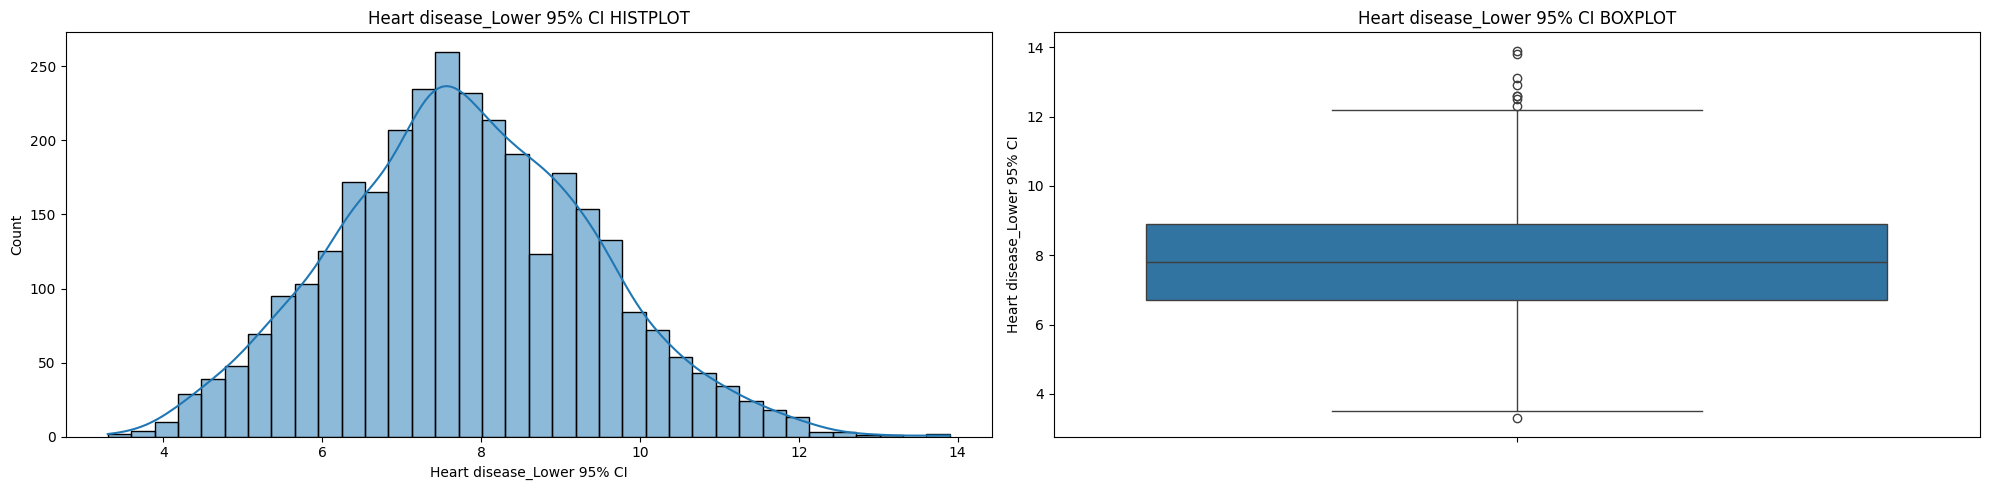

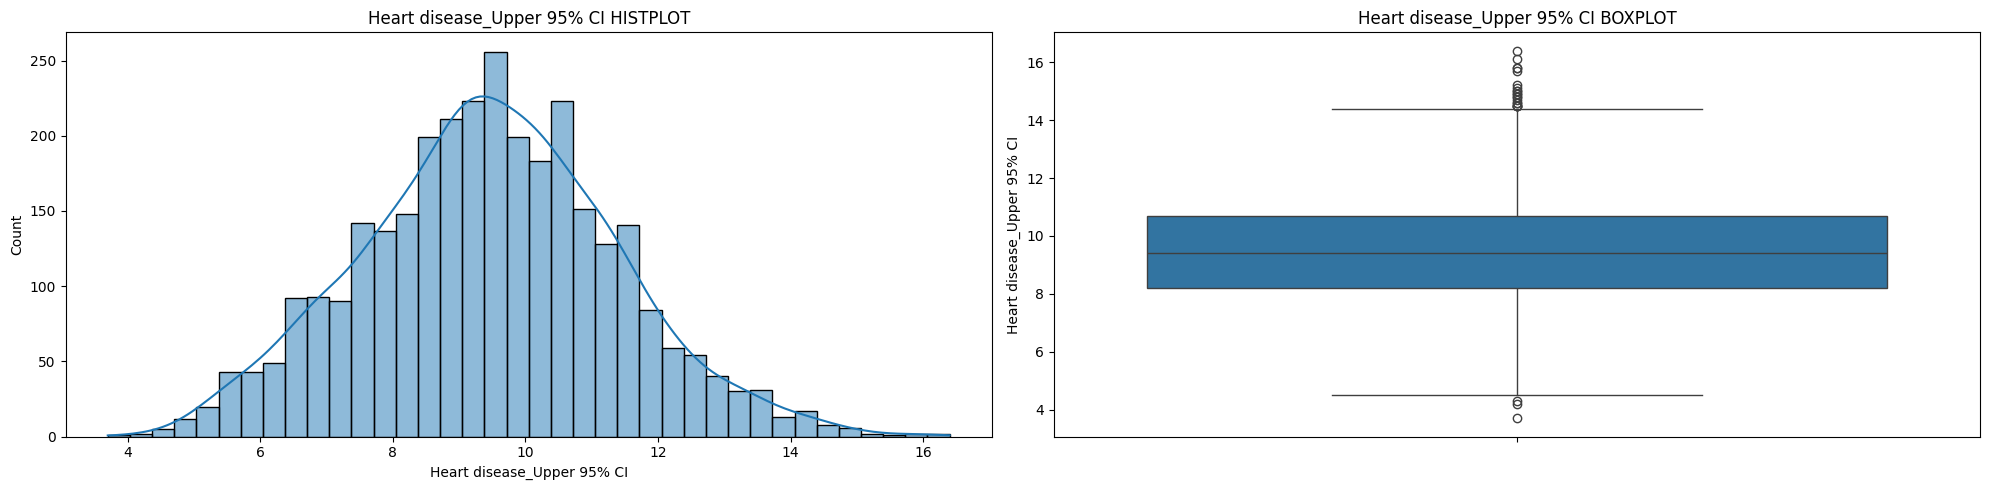

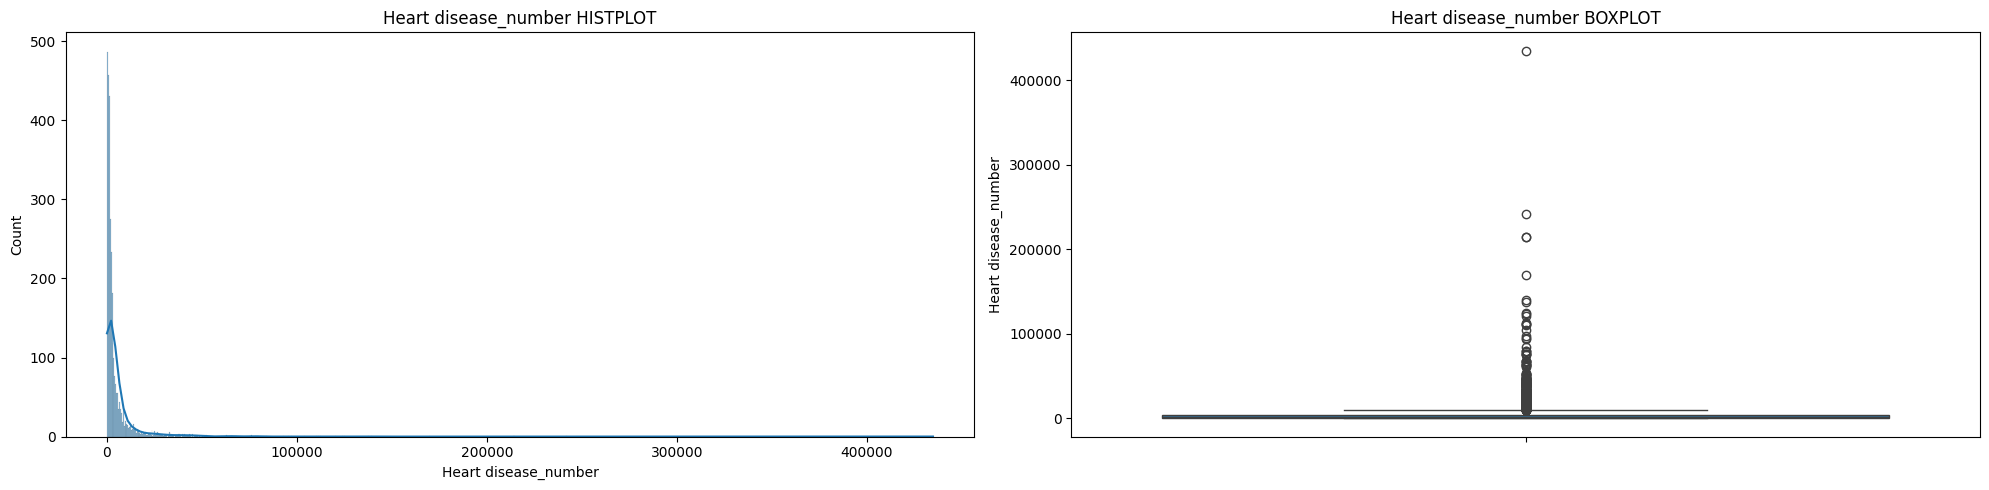

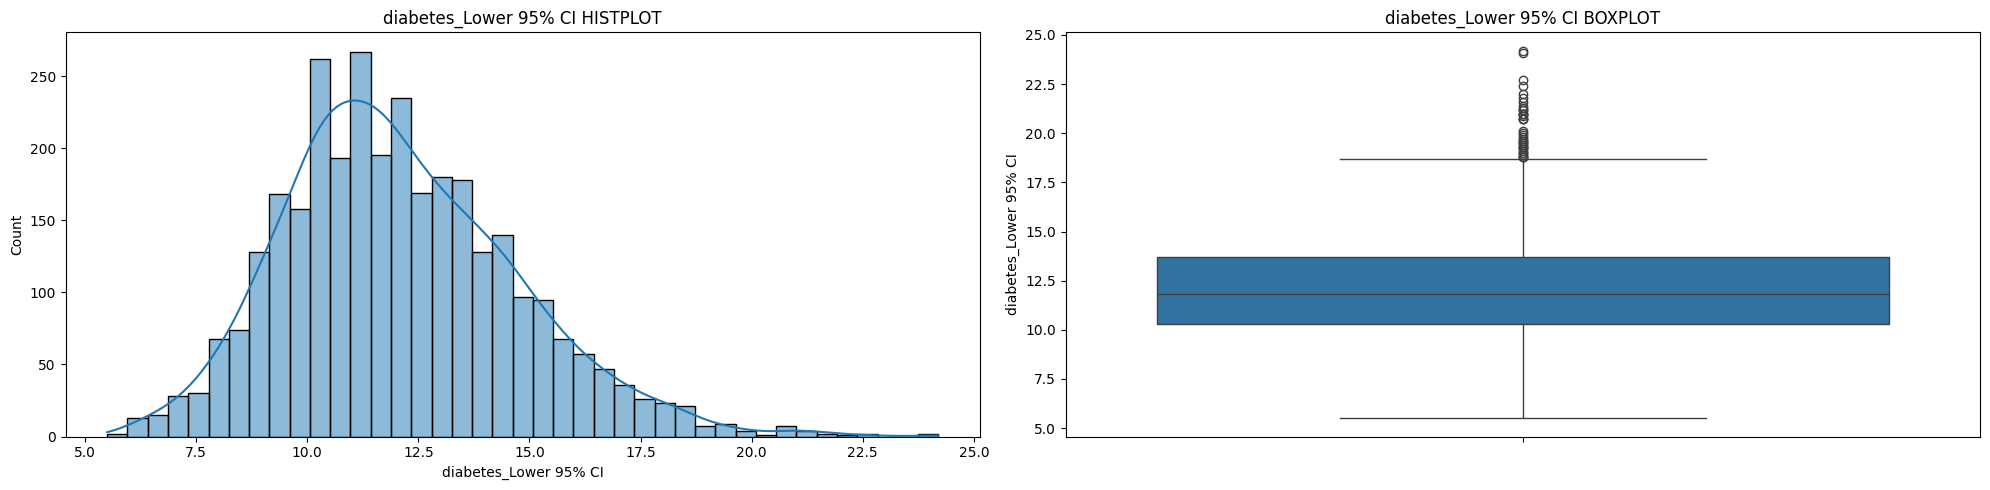

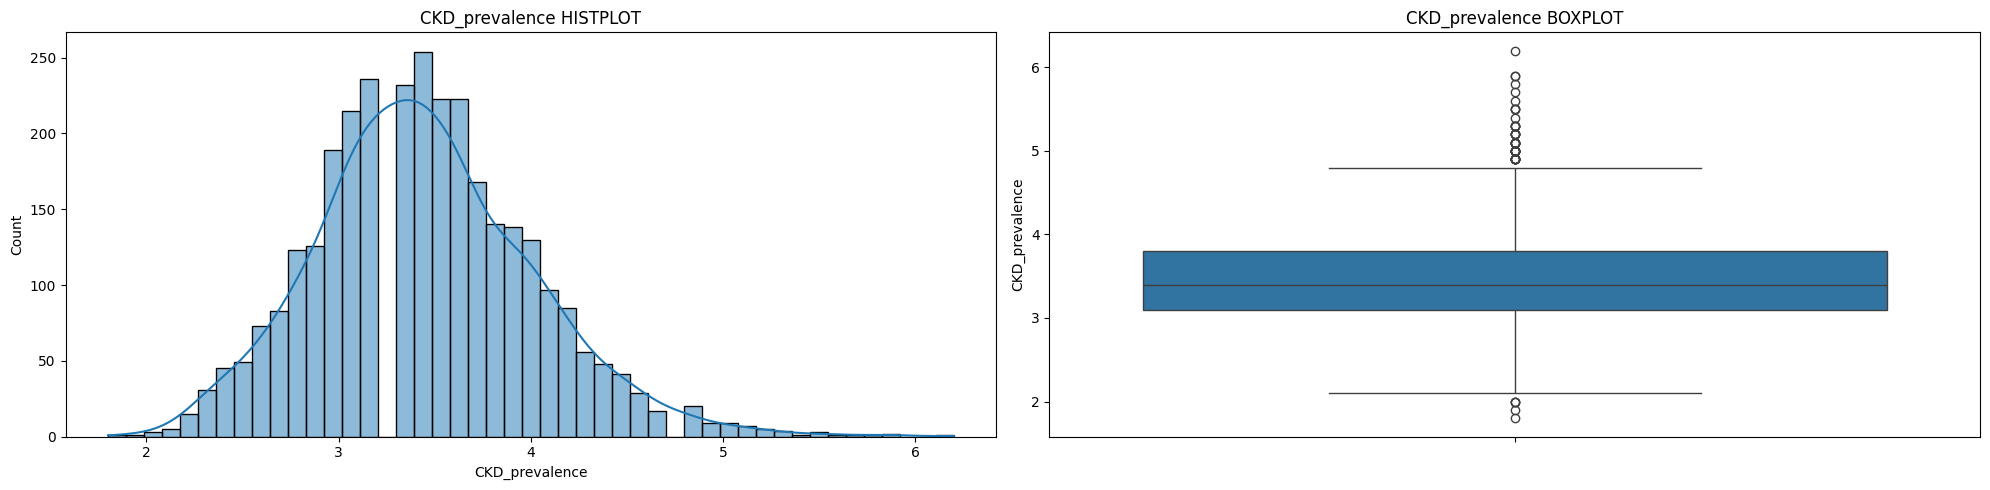

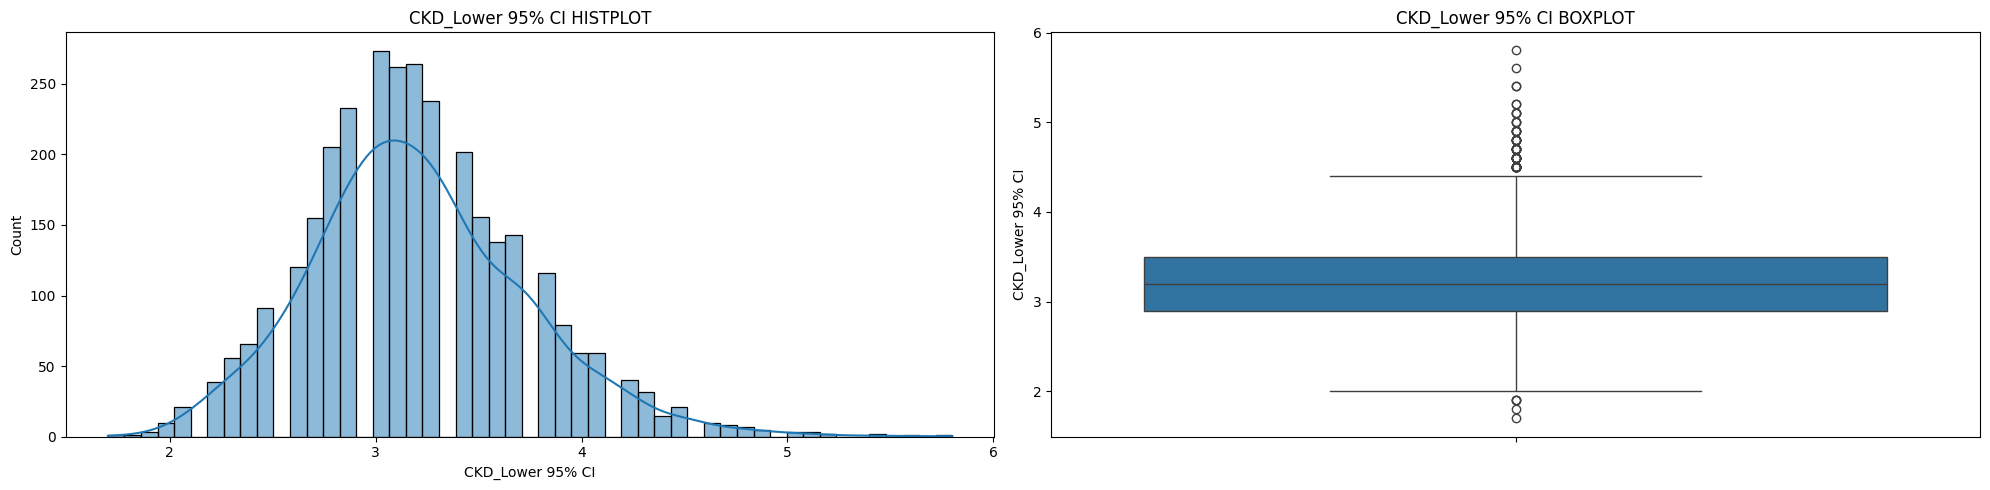

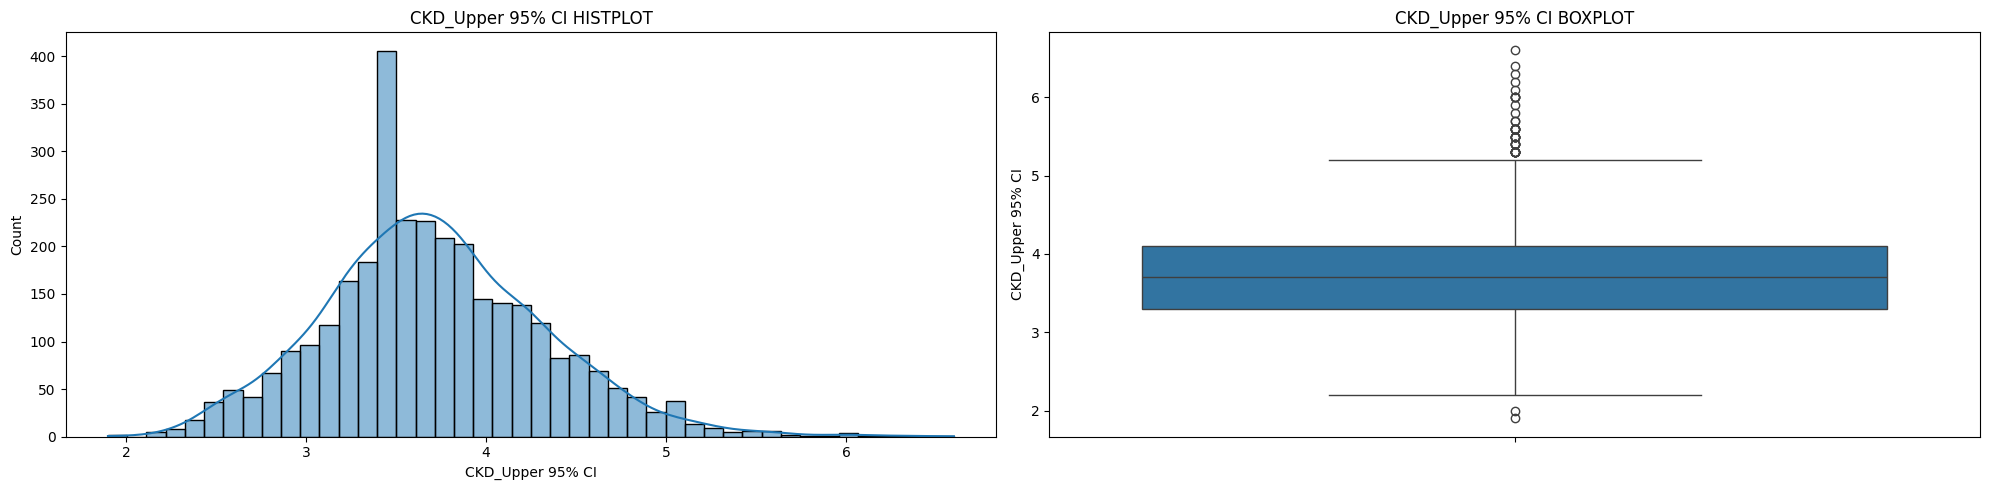

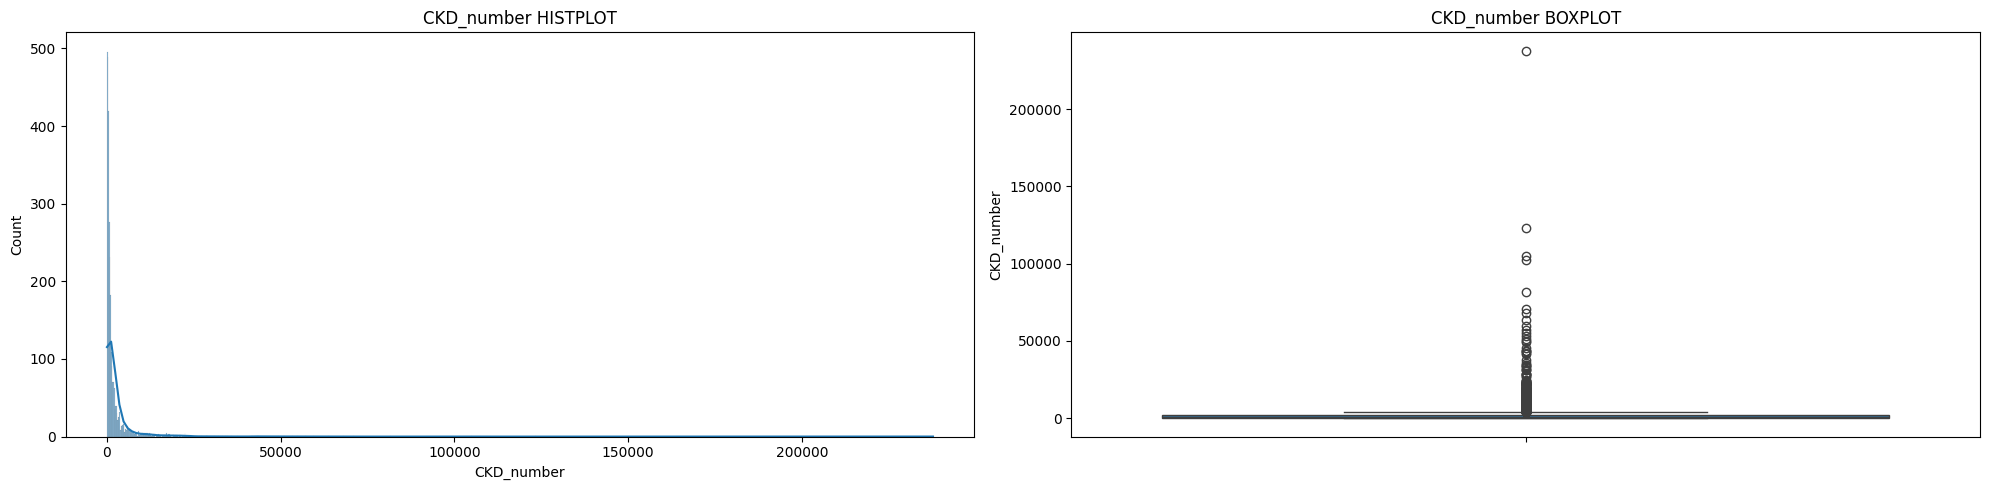

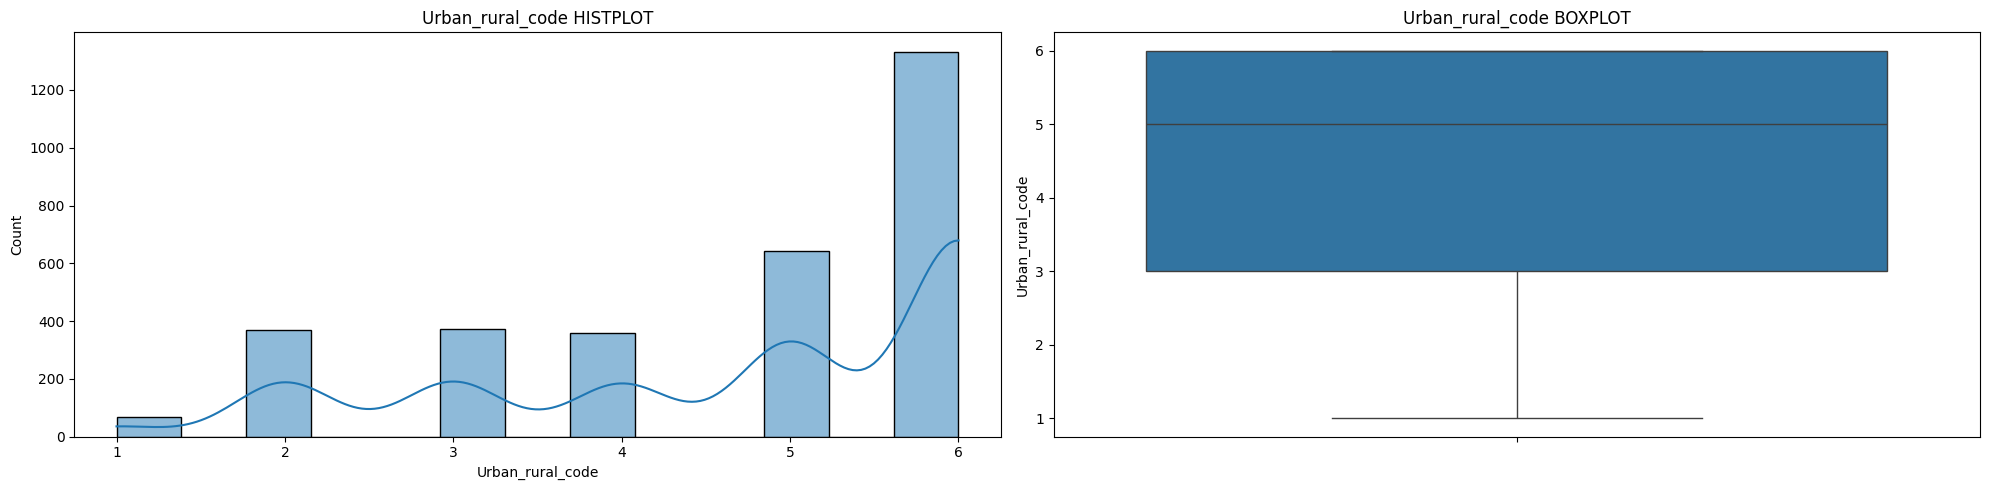

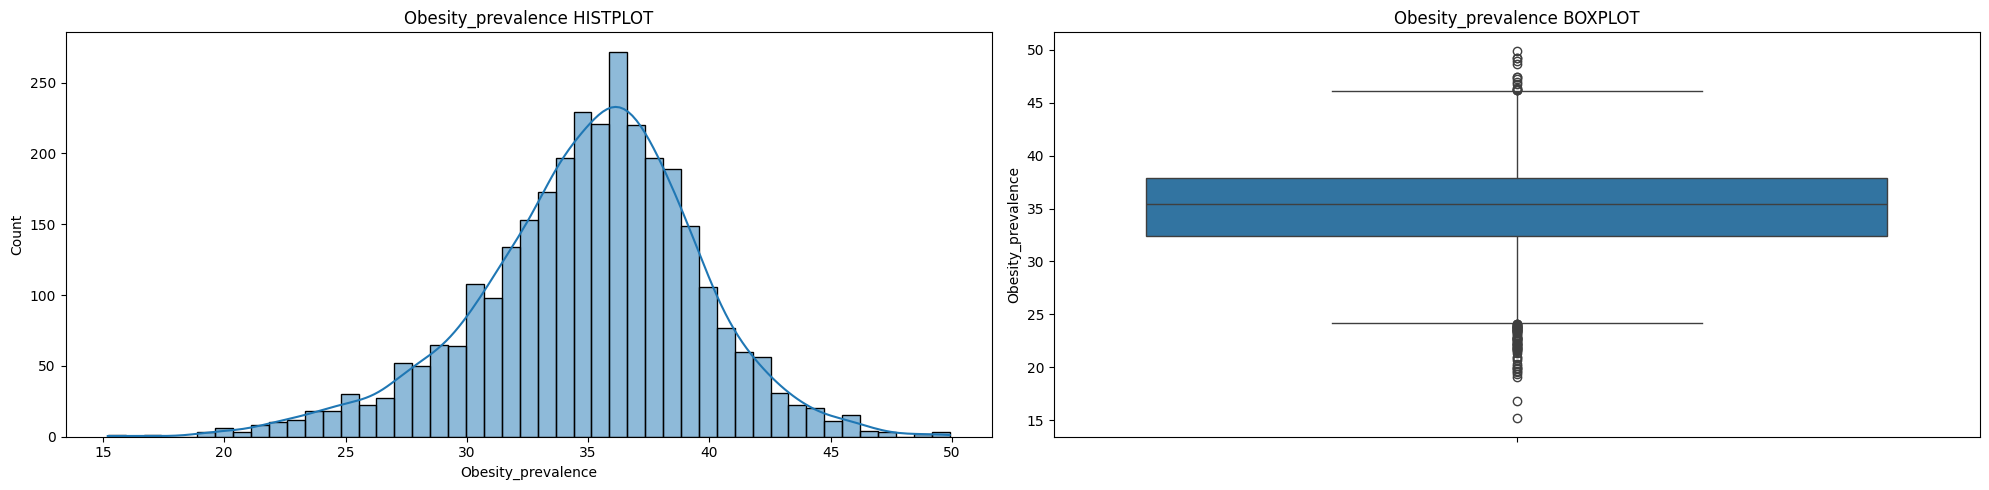

In [15]:
#Analysis of numerical variables

import matplotlib.pyplot as plt
import seaborn as sns

for column in total_data.columns:
    if (column == "COUNTY_NAMEn" or column == "STATE_NAMEn"):
        continue
    else:
        plt.figure(figsize=(20, 5))
 
        plt.subplot(1, 2, 1)
        sns.histplot(data=total_data, x=column, bins='auto', kde=True)
        plt.title(f'{column} HISTPLOT')
        #plt.xlabel('VALUES')
        #plt.ylabel('FREQUENCY')

        plt.subplot(1, 2, 2)
        sns.boxplot(data=total_data, y=column)
        plt.title(f'{column} BOXPLOT')
        #plt.xlabel('VALUES')

        plt.tight_layout()
        plt.show()

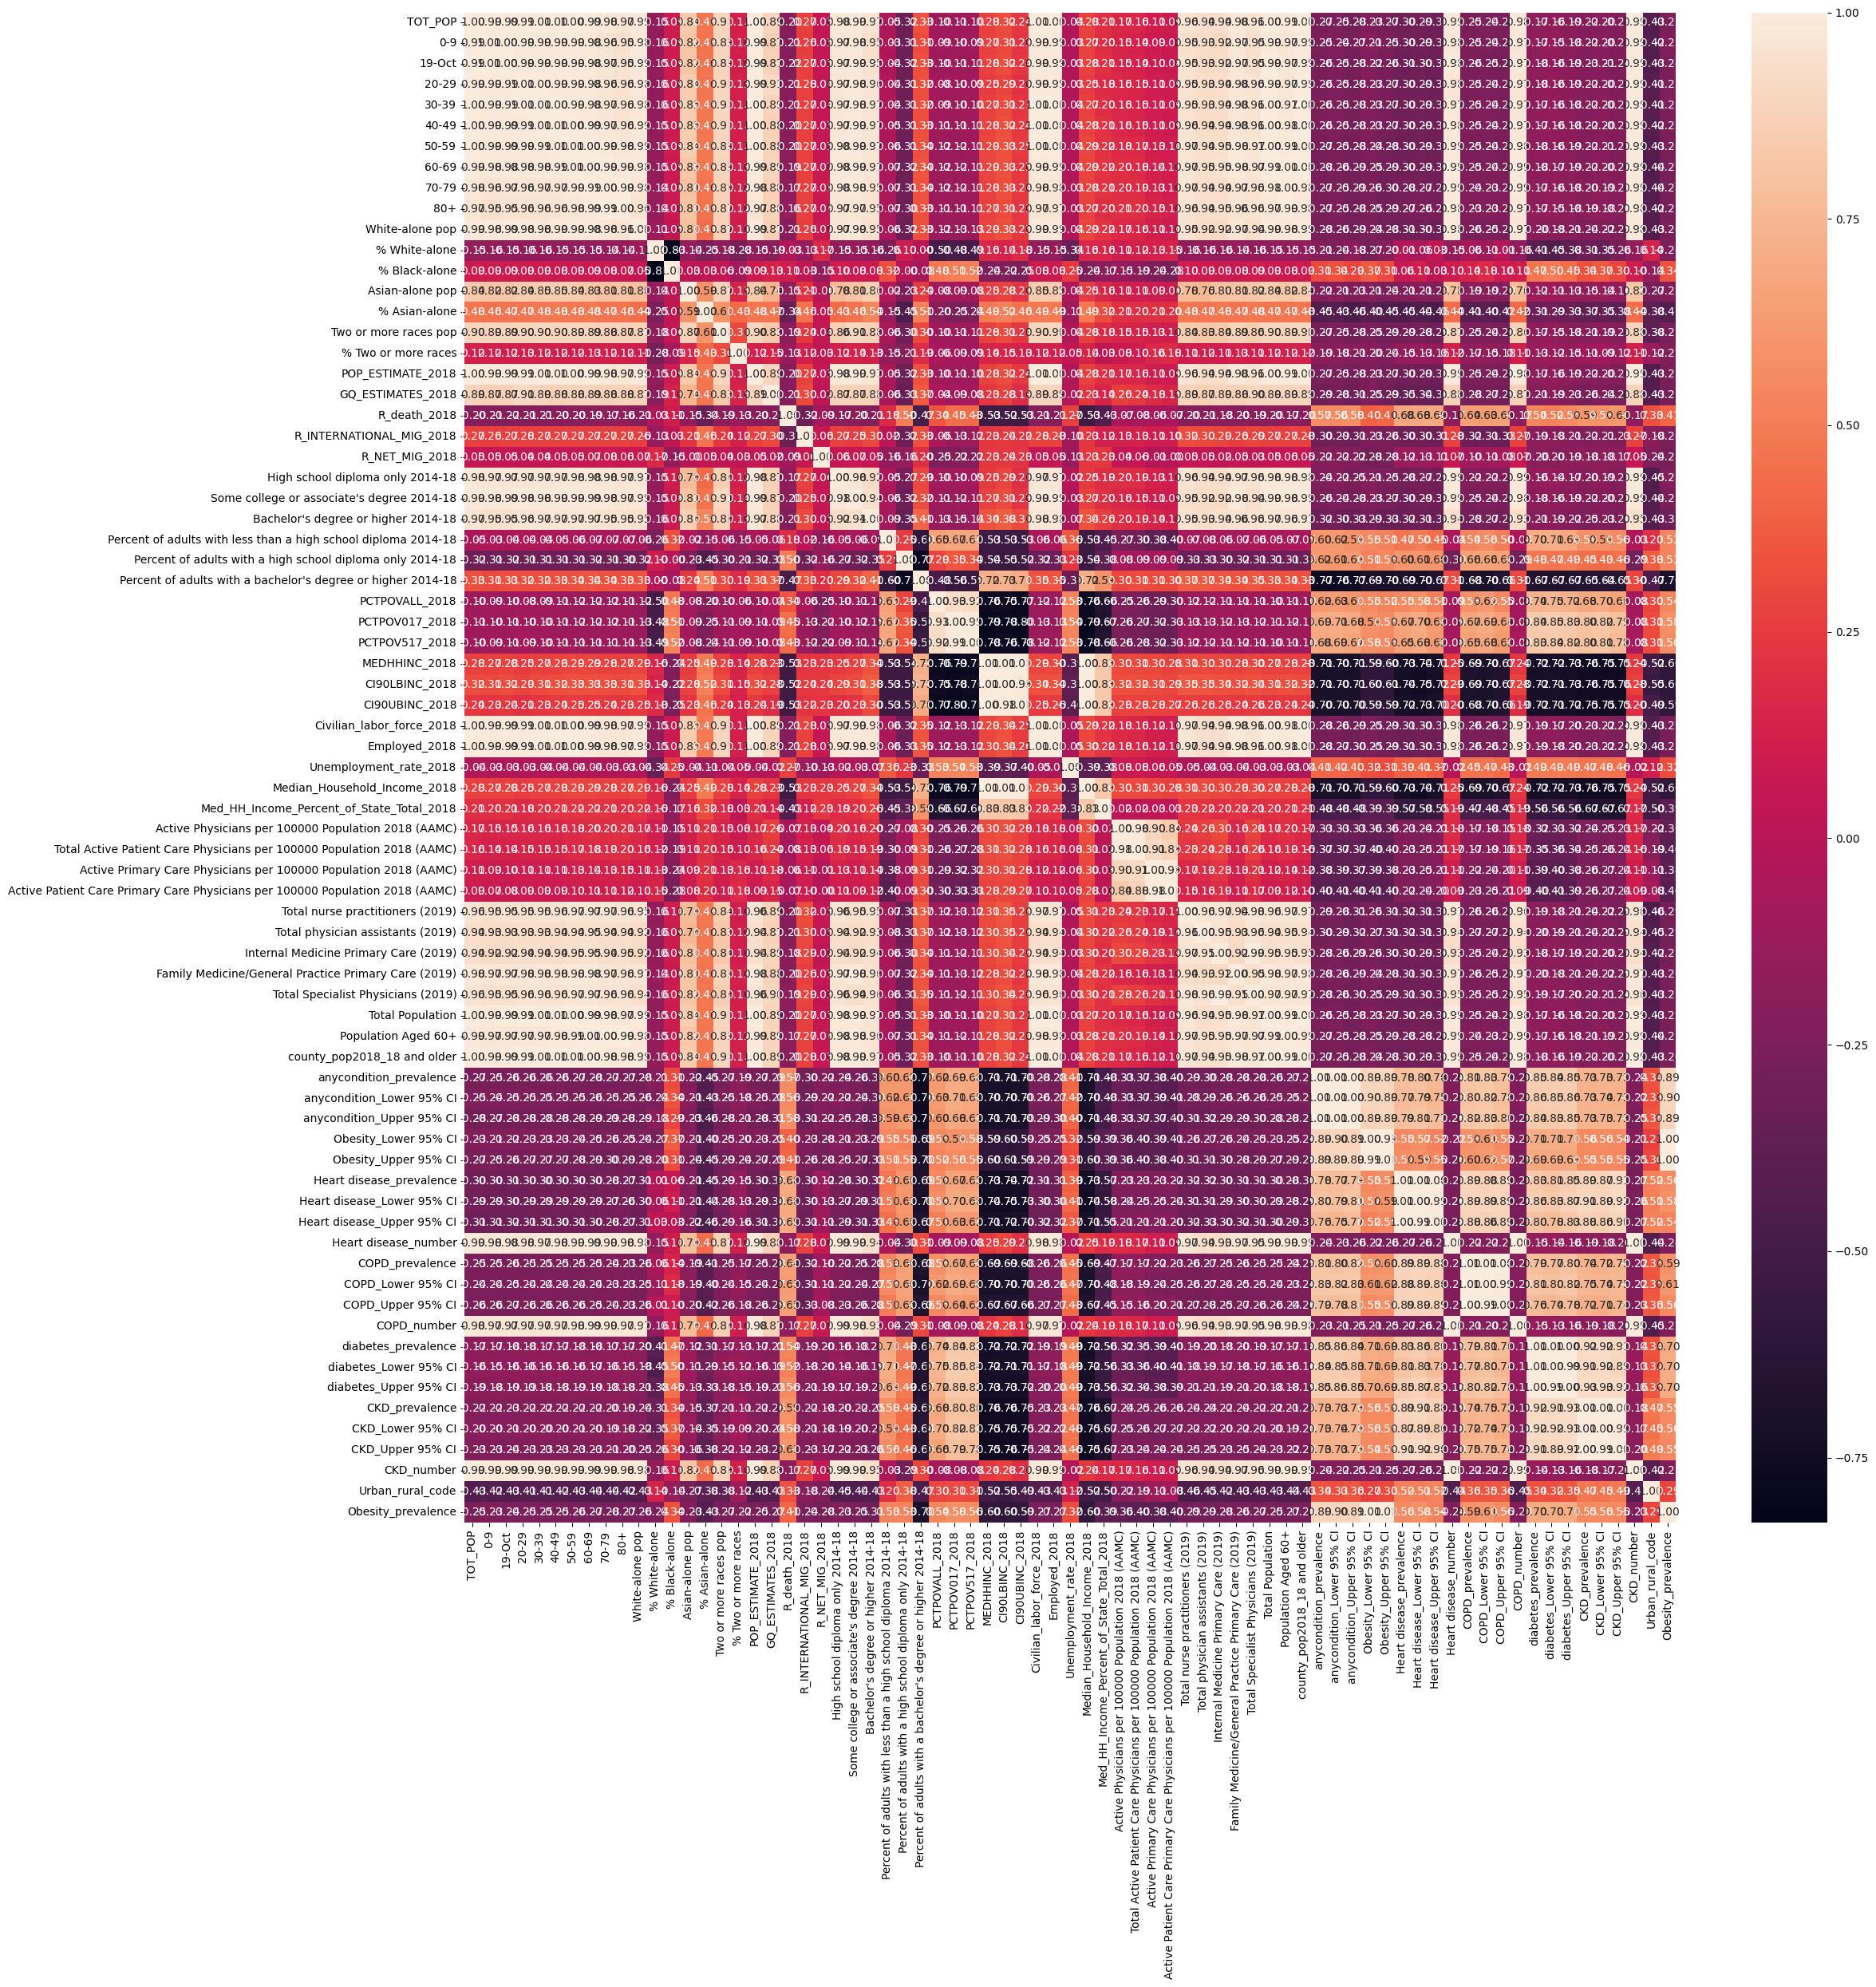

In [16]:
#Analysis of multivariate variables
fig, axis = plt.subplots(figsize= (25,25))
sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()

### Feature engineering

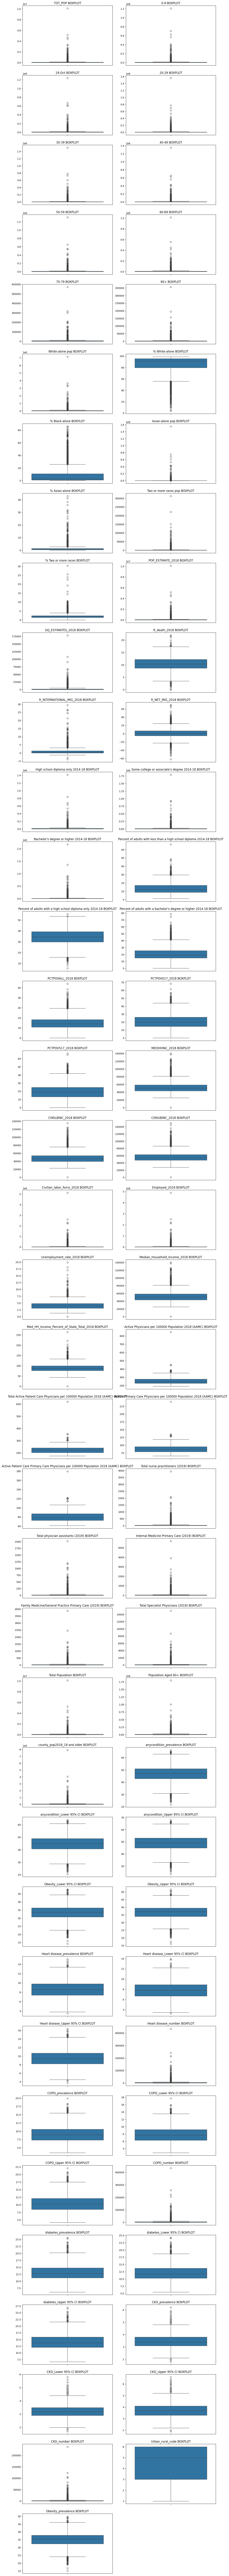

In [17]:
#Analysis of outliers
# Determine the number of rows needed for subplots
num_rows = (len(total_data.columns) + 1) // 2
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows*4))
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Iterate over each column and plot boxplots
for i, column in enumerate(total_data.columns):
    if i < len(axes):  # Ensure we don't go beyond the number of axes
        sns.boxplot(data=total_data, y=column, ax=axes[i])
        axes[i].set_title(f'{column} BOXPLOT')
        axes[i].set_ylabel('')  # Remove y-axis label
# Hide empty subplots if there are an odd number of columns
if len(total_data.columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()

It's still hard to reach any conclusion because of the high number of variables but we can observe that the distribution of most variables is right skewed and that there is a very high number of outliers. 

In [18]:
total_data.describe()

TOT_POP           0-9        19-Oct         20-29         30-39  \
count  3.140000e+03  3.140000e+03  3.140000e+03  3.140000e+03  3.140000e+03   
mean   1.041894e+05  1.274030e+04  1.336798e+04  1.446933e+04  1.391649e+04   
std    3.335834e+05  4.180730e+04  4.228439e+04  4.957773e+04  4.899095e+04   
min    8.800000e+01  0.000000e+00  0.000000e+00  0.000000e+00  1.100000e+01   
25%    1.096325e+04  1.280500e+03  1.374500e+03  1.263750e+03  1.232750e+03   
50%    2.580050e+04  3.057000e+03  3.274000e+03  3.108000e+03  3.000500e+03   
75%    6.791300e+04  8.097000e+03  8.822250e+03  8.976250e+03  8.314250e+03   
max    1.010552e+07  1.208253e+06  1.239139e+06  1.557073e+06  1.501844e+06   

              40-49         50-59         60-69          70-79            80+  \
count  3.140000e+03  3.140000e+03  3.140000e+03    3140.000000    3140.000000   
mean   1.288521e+04  1.363803e+04  1.191621e+04    7220.310510    4035.541720   
std    4.347219e+04  4.272063e+04  3.451858e+04   20287.498429   12063.782251   
min    4.000000e+00  1.400000e+01  2.000000e+01       6.000000       0.000000   
25%    1.245250e+03  1.483000e+03  1.476500e+03     950.750000     533.000000   
50%    3.048500e+03  3.515500e+03  3.410000e+03    2177.000000    1160.000000   
75%    8.120500e+03  9.157250e+03  8.710500e+03    5574.000000    2899.750000   
max    1.350076e+06  1.306003e+06  1.014325e+06  572530.000000  356275.000000   

       White-alone pop  % White-alone  % Black-alone  Asian-alone pop  \
count     3.140000e+03    3140.000000    3140.000000     3.140000e+03   
mean      7.965979e+04      84.494109       9.342405     6.155618e+03   
std       2.372880e+05      16.348987      14.478294     4.388798e+04   
min       2.400000e+01       3.841985       0.000000     0.000000e+00   
25%       9.008750e+03      79.620473       0.867069     5.700000e+01   
50%       2.206900e+04      91.410189       2.545440     1.770000e+02   
75%       5.898575e+04      95.521727      10.852053     8.662500e+02   
max       7.151444e+06      99.043785      86.069762     1.551894e+06   

       % Asian-alone  Two or more races pop  % Two or more races  \
count    3140.000000            3140.000000          3140.000000   
mean        1.554548            2848.954140             2.123190   
std         2.857088           11083.924606             1.544463   
min         0.000000               0.000000             0.000000   
25%         0.465659             180.000000             1.357557   
50%         0.739372             437.500000             1.789720   
75%         1.433411            1497.000000             2.409970   
max        42.952310          313259.000000            30.304056   

       POP_ESTIMATE_2018  GQ_ESTIMATES_2018  R_death_2018  \
count       3.140000e+03        3140.000000   3140.000000   
mean        1.041894e+05        2576.335350     10.365287   
std         3.335834e+05        6709.176105      2.687543   
min         8.800000e+01           0.000000      0.000000   
25%         1.096325e+04         174.750000      8.700000   
50%         2.580050e+04         611.500000     10.400000   
75%         6.791300e+04        2244.750000     12.200000   
max         1.010552e+07      178334.000000     21.900000   

       R_INTERNATIONAL_MIG_2018  R_NET_MIG_2018  \
count               3140.000000     3140.000000   
mean                   1.111529        1.116433   
std                    2.166349       11.385537   
min                   -3.900000      -62.100000   
25%                    0.000000       -5.000000   
50%                    0.400000        0.500000   
75%                    1.300000        6.825000   
max                   29.500000       69.400000   

       High school diploma only 2014-18  \
count                      3.140000e+03   
mean                       1.887329e+04   
std                        5.082858e+04   
min                        1.500000e+01   
25%                        2.803750e+03   
50%                        6.40

In [19]:

#Creating the variable for no outliers
total_data_no_outliers = total_data.copy()

In [20]:
#Replacing outliers with mean, median or mode
from statistics import mode


mean_columns = ['R_death_2018', 'R_NET_MIG_2018', 'anycondition_prevalence', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'anycondition_number', 'Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Heart disease_prevalence', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI']
median_columns = ['% White-alone', 'Percent of adults with a high school diploma only 2014-18']
mode_columns = ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', '% Black-alone', 'Asian-alone pop', '% Asian-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'GQ_ESTIMATES_2018', 'R_INTERNATIONAL_MIG_2018',  'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with less than a high school diploma 2014-18', "Percent of adults with a bachelor's degree or higher 2014-18", 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Unemployment_rate_2018', 'Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)', 'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Internal Medicine Primary Care (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older', 'Heart disease_number', 'COPD_prevalence', 'COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'CKD_number']


for column in total_data.columns:
    if column != 'obesity_prevalence':
        q25 = total_data[column].quantile(0.25)
        q75 = total_data[column].quantile(0.75)

        iqr=q75-q25
        lower_bound=q25 - 1.5 * iqr
        upper_bound=q75 + 1.5 * iqr

        median = total_data[column].median()
        mean = total_data[column].mean()
        mode = total_data[column].mode()

        if column in median_columns:
            total_data_no_outliers[column] = total_data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

        elif column in mean_columns:
            total_data_no_outliers[column] = total_data[column].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)

        elif column in mode_columns:
            total_data_no_outliers[column] = total_data[column].apply(lambda x: mode[0] if x < lower_bound or x > upper_bound else x)

        else:
            total_data_no_outliers[column] = total_data[column].copy()



In [21]:
#print(total_data.columns.tolist())

In [22]:
from sklearn.model_selection import train_test_split

#Splitting total_data
predictoras = ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', '% White-alone', '% Black-alone', 'Asian-alone pop', '% Asian-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'GQ_ESTIMATES_2018', 'R_death_2018', 'R_INTERNATIONAL_MIG_2018', 'R_NET_MIG_2018', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults with a bachelor's degree or higher 2014-18", 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployment_rate_2018', 'Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Internal Medicine Primary Care (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older', 'anycondition_prevalence', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Heart disease_prevalence', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'Heart disease_number', 'COPD_prevalence', 'COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number', 'Urban_rural_code']
target = 'Obesity_prevalence'

X = total_data[predictoras]
y = total_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

X_train.head()


TOT_POP      0-9   19-Oct    20-29    30-39    40-49    50-59    60-69  \
968   17408.0   2076.0   2129.0   2244.0   2419.0   2423.0   2338.0   1912.0   
1506  13824.0   1682.0   1764.0   1649.0   1557.0   1648.0   1913.0   1828.0   
2550  27109.0   2465.0   2812.0   2584.0   2771.0   3252.0   4013.0   4448.0   
1940  33370.0   3984.0   4771.0   4099.0   3710.0   4113.0   4600.0   4125.0   
333   88355.0  10874.0  11410.0  10206.0  11016.0  11147.0  12883.0  10351.0   

       70-79     80+  White-alone pop  % White-alone  % Black-alone  \
968   1341.0   526.0          15940.0      91.567096       5.675551   
1506  1181.0   602.0          10062.0      72.786458      23.466435   
2550  3174.0  1590.0          26259.0      96.864510       0.962780   
1940  2631.0  1337.0          32395.0      97.078214       0.869044   
333   6937.0  3531.0          80132.0      90.693226       4.604154   

      Asian-alone pop  % Asian-alone  Two or more races pop  \
968              66.0       0.379136                  274.0   
1506            155.0       1.121238                  270.0   
2550            152.0       0.560699                  307.0   
1940            159.0       0.476476                  395.0   
333            1585.0       1.793900                 2081.0   

      % Two or more races  POP_ESTIMATE_2018  GQ_ESTIMATES_2018  R_death_2018  \
968              1.573989            17408.0             1936.0           9.8   
1506             1.953125            13824.0              132.0          13.1   
2550             1.132465            27109.0              323.0          13.2   
1940             1.183698            33370.0              932.0           9.9   
333              2.355271            88355.0             1176.0           8.1   

      R_INTERNATIONAL_MIG_2018  R_NET_MIG_2018  \
968                        0.1            -2.9   
1506                      -0.1             0.2   
2550                      -0.3            16.8   
1940                       0.1            -3.9   
333                        1.8            17.9   

      High school diploma only 2014-18  \
968                             5285.0   
1506                            3753.0   
2550                            6534.0   
1940                            9461.0   
333                            19089.0   

      Some college or associate's degree 2014-18  \
968                                       3084.0   
1506                                      2326.0   
2550                                      6663.0   
1940                                      6945.0   
333                                      16374.0   

      Bachelor's degree or higher 2014-18  \
968                                 851.0   
1506                               1505.0   
2550                               3848.0   
1940                               3323.0   
333                               16432.0   

      Percent of adults with less than a high school diploma 2014-18  \
968                                                25.4                
1506                                               21.6                
2550                                               15.8                
1940                                               11.8                
333                                                11.4                

      Percent of adults with a high school diploma only 2014-18  \
968                                                42.7           
1506                                               38.8           
2550                                               32.3           
1940                                               42.3           
333                                                32.6           

      Percent of adults with a bachelor's degree or higher 2014-18  \
968                                                 6.9              
1506                                               15.6              
2550                                            

In [23]:
#Splitting total_data_no_outliers
X = total_data_no_outliers[predictoras]
y = total_data_no_outliers[target]

X_train_no_outliers, X_test_no_outliers, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

X_train_no_outliers.head()

TOT_POP      0-9   19-Oct    20-29    30-39    40-49    50-59    60-69  \
968   17408.0   2076.0   2129.0   2244.0   2419.0   2423.0   2338.0   1912.0   
1506  13824.0   1682.0   1764.0   1649.0   1557.0   1648.0   1913.0   1828.0   
2550  27109.0   2465.0   2812.0   2584.0   2771.0   3252.0   4013.0   4448.0   
1940  33370.0   3984.0   4771.0   4099.0   3710.0   4113.0   4600.0   4125.0   
333   88355.0  10874.0  11410.0  10206.0  11016.0  11147.0  12883.0  10351.0   

       70-79     80+  White-alone pop  % White-alone  % Black-alone  \
968   1341.0   526.0          15940.0      91.567096       5.675551   
1506  1181.0   602.0          10062.0      72.786458      23.466435   
2550  3174.0  1590.0          26259.0      96.864510       0.962780   
1940  2631.0  1337.0          32395.0      97.078214       0.869044   
333   6937.0  3531.0          80132.0      90.693226       4.604154   

      Asian-alone pop  % Asian-alone  Two or more races pop  \
968              66.0       0.379136                  274.0   
1506            155.0       1.121238                  270.0   
2550            152.0       0.560699                  307.0   
1940            159.0       0.476476                  395.0   
333            1585.0       1.793900                 2081.0   

      % Two or more races  POP_ESTIMATE_2018  GQ_ESTIMATES_2018  R_death_2018  \
968              1.573989            17408.0             1936.0           9.8   
1506             1.953125            13824.0              132.0          13.1   
2550             1.132465            27109.0              323.0          13.2   
1940             1.183698            33370.0              932.0           9.9   
333              2.355271            88355.0             1176.0           8.1   

      R_INTERNATIONAL_MIG_2018  R_NET_MIG_2018  \
968                        0.1            -2.9   
1506                      -0.1             0.2   
2550                      -0.3            16.8   
1940                       0.1            -3.9   
333                        1.8            17.9   

      High school diploma only 2014-18  \
968                             5285.0   
1506                            3753.0   
2550                            6534.0   
1940                            9461.0   
333                            19089.0   

      Some college or associate's degree 2014-18  \
968                                       3084.0   
1506                                      2326.0   
2550                                      6663.0   
1940                                      6945.0   
333                                      16374.0   

      Bachelor's degree or higher 2014-18  \
968                                 851.0   
1506                               1505.0   
2550                               3848.0   
1940                               3323.0   
333                               16432.0   

      Percent of adults with less than a high school diploma 2014-18  \
968                                                25.4                
1506                                               21.6                
2550                                               15.8                
1940                                               11.8                
333                                                11.4                

      Percent of adults with a high school diploma only 2014-18  \
968                                                42.7           
1506                                               38.8           
2550                                               32.3           
1940                                               42.3           
333                                                32.6           

      Percent of adults with a bachelor's degree or higher 2014-18  \
968                                                 6.9              
1506                                               15.6              
2550                                            

In [24]:

#Saving total_data (train + test) and total_data_no_ouliers (train + test)

X_train.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/X_train.csv", index = False)
X_test.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/X_test.csv", index = False)
X_train_no_outliers.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/X_train_no_outliers.csv", index = False)
X_test_no_outliers.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/X_test_no_outliers.csv", index = False)
y_train.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/y_train.csv", index = False)
y_test.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/y_test.csv", index = False)



In [25]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

# Normalizing total_data

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = predictoras)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = predictoras)

X_train_norm.head()

TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59  \
968  -0.251037 -0.250131 -0.260270 -0.236840 -0.225328 -0.231331 -0.253516   
1506 -0.262134 -0.260101 -0.269361 -0.249133 -0.243397 -0.249672 -0.263707   
2550 -0.220999 -0.240287 -0.243258 -0.229815 -0.217949 -0.211712 -0.213354   
1940 -0.201612 -0.201849 -0.194463 -0.198515 -0.198266 -0.191335 -0.199279   
333  -0.031359 -0.027500 -0.029100 -0.072341 -0.045117 -0.024866 -0.000673   

         60-69     70-79       80+  White-alone pop  % White-alone  \
968  -0.278814 -0.280475 -0.278286        -0.261489       0.431837   
1506 -0.281309 -0.288626 -0.271854        -0.287415      -0.704843   
2550 -0.203479 -0.187105 -0.188237        -0.215975       0.752458   
1940 -0.213074 -0.214764 -0.209649        -0.188911       0.765392   
333  -0.028123  0.004578 -0.023964         0.021643       0.378947   

      % Black-alone  Asian-alone pop  % Asian-alone  Two or more races pop  \
968       -0.251487        -0.127451      -0.396050              -0.218439   
1506       0.972533        -0.125543      -0.142884              -0.218793   
2550      -0.575728        -0.125607      -0.334110              -0.215513   
1940      -0.582177        -0.125457      -0.362843              -0.207711   
333       -0.325200        -0.094878       0.086592              -0.058235   

      % Two or more races  POP_ESTIMATE_2018  GQ_ESTIMATES_2018  R_death_2018  \
968             -0.349269          -0.251037          -0.083761     -0.221664   
1506            -0.110343          -0.262134          -0.349880      0.992335   
2550            -0.627511          -0.220999          -0.321705      1.029123   
1940            -0.595225          -0.201612          -0.231867     -0.184877   
333              0.143084          -0.031359          -0.195873     -0.847058   

      R_INTERNATIONAL_MIG_2018  R_NET_MIG_2018  \
968                  -0.469531       -0.365881   
1506                 -0.563399       -0.091536   
2550                 -0.657268        1.377542   
1940                 -0.469531       -0.454380   
333                   0.328354        1.474891   

      High school diploma only 2014-18  \
968                          -0.259762   
1506                         -0.291273   
2550                         -0.234073   
1940                         -0.173870   
333                           0.024161   

      Some college or associate's degree 2014-18  \
968                                    -0.272167   
1506                                   -0.285049   
2550                                   -0.211347   
1940                                   -0.206555   
333                                    -0.046321   

      Bachelor's degree or higher 2014-18  \
968                             -0.252215   
1506                            -0.243961   
2550                            -0.214388   
1940                            -0.221015   
333                             -0.055558   

      Percent of adults with less than a high school diploma 2014-18  \
968                                            1.892377                
1506                                           1.292111                
2550                                           0.375915                
1940                                          -0.255944                
333                                           -0.319130                

      Percent of adults with a high school diploma only 2014-18  \
968                                            1.152916           
1506                                           0.611327           
2550                                          -0.291321           
1940                                           1.097369           
333                                           -0.249660           

      Percent of adults with a bachelor's degree or higher 2014-18  \
968                                           -1.552114              
1506                                          -

In [26]:
# Normalizing total_data_no_outliers

scaler = StandardScaler()
scaler.fit(X_train_no_outliers)

X_train_no_outliers_norm = scaler.transform(X_train_no_outliers)
X_train_no_outliers_norm = pd.DataFrame(X_train_no_outliers_norm, index = X_train_no_outliers.index, columns = predictoras)

X_test_no_outliers_norm = scaler.transform(X_test_no_outliers)
X_test_no_outliers_norm = pd.DataFrame(X_test_no_outliers_norm, index = X_test_no_outliers.index, columns = predictoras)

X_train_no_outliers_norm.head()

TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59  \
968  -0.408705 -0.342761 -0.358173 -0.311296 -0.254378 -0.242238 -0.406977   
1506 -0.524873 -0.445885 -0.445434 -0.451306 -0.475005 -0.447708 -0.508575   
2550 -0.094267 -0.240945 -0.194886 -0.231291 -0.164284 -0.022451 -0.006562   
1940  0.108671  0.156632  0.273458  0.125204  0.076052  0.205821  0.133763   
333   1.890899  1.959994  1.860663  1.562243  1.946010  2.070697  2.113846   

         60-69     70-79       80+  White-alone pop  % White-alone  \
968  -0.463800 -0.428258 -0.587552        -0.327002       0.322502   
1506 -0.484368 -0.488693 -0.530535        -0.535635      -1.560445   
2550  0.157174  0.264099  0.210693         0.039260       0.853621   
1940  0.078083  0.058998  0.020885         0.257050       0.875046   
333   1.602603  1.685451  1.666890         1.951423       0.234888   

      % Black-alone  Asian-alone pop  % Asian-alone  Two or more races pop  \
968        0.290735        -0.471865      -0.580296              -0.408691   
1506       3.388092        -0.232095       0.663767              -0.414485   
2550      -0.529749        -0.240177      -0.275922              -0.360890   
1940      -0.546068        -0.221318      -0.417115              -0.233422   
333        0.104207         3.620393       1.791417               2.208751   

      % Two or more races  POP_ESTIMATE_2018  GQ_ESTIMATES_2018  R_death_2018  \
968             -0.199981          -0.408705           0.911746     -0.254324   
1506             0.270289          -0.524873          -0.628713      1.048197   
2550            -0.747634          -0.094267          -0.465616      1.087667   
1940            -0.684087           0.108671           0.054417     -0.214854   
333              0.769099           1.890899           0.262772     -0.925320   

      R_INTERNATIONAL_MIG_2018  R_NET_MIG_2018  \
968                  -0.555132       -0.434116   
1506                 -0.805422       -0.076931   
2550                 -1.055712        1.835738   
1940                 -0.555132       -0.549337   
333                   1.572333        1.962481   

      High school diploma only 2014-18  \
968                          -0.241947   
1506                         -0.448866   
2550                         -0.073251   
1940                          0.322083   
333                           1.622486   

      Some college or associate's degree 2014-18  \
968                                    -0.432670   
1506                                   -0.544363   
2550                                    0.094701   
1940                                    0.136255   
333                                     1.525634   

      Bachelor's degree or higher 2014-18  \
968                             -0.628483   
1506                            -0.489207   
2550                             0.009759   
1940                            -0.102046   
333                              2.689649   

      Percent of adults with less than a high school diploma 2014-18  \
968                                            2.249742                
1506                                           1.565114                
2550                                           0.520156                
1940                                          -0.200506                
333                                           -0.272572                

      Percent of adults with a high school diploma only 2014-18  \
968                                            1.178323           
1506                                           0.611461           
2550                                          -0.333308           
1940                                           1.120183           
333                                           -0.289703           

      Percent of adults with a bachelor's degree or higher 2014-18  \
968                                           -1.833381              
1506                                          -

In [27]:
#Saving the normalization model
dump(scaler, open("/workspaces/machine-learning-regularized-linear-regression/models/normalizer.sav", "wb"))

In [28]:
#Saving total_data (normalized) and total_data_no_outliers (normalized)

X_train_norm.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/X_train_norm.csv", index = False)
X_test_norm.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/X_test_norm.csv", index = False)
X_train_no_outliers_norm.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/X_train_no_outliers_norm.csv", index = False)
X_test_no_outliers_norm.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/X_test_no_outliers_norm.csv", index = False)




In [29]:
from sklearn.preprocessing import MinMaxScaler

# Scalating total_data

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = predictoras)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = predictoras)

X_train_scal.head()

TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59  \
968   0.001714  0.001718  0.001718  0.001441  0.001603  0.001792  0.001779   
1506  0.001359  0.001392  0.001424  0.001059  0.001029  0.001218  0.001454   
2550  0.002674  0.002040  0.002269  0.001660  0.001838  0.002406  0.003062   
1940  0.003293  0.003297  0.003850  0.002633  0.002463  0.003044  0.003512   
333   0.008735  0.009000  0.009208  0.006555  0.007328  0.008254  0.009854   

         60-69     70-79       80+  White-alone pop  % White-alone  \
968   0.001865  0.002332  0.001476         0.002226       0.917247   
1506  0.001783  0.002052  0.001690         0.001404       0.709382   
2550  0.004366  0.005533  0.004463         0.003669       0.975880   
1940  0.004047  0.004585  0.003753         0.004527       0.978245   
333   0.010185  0.012106  0.009911         0.011202       0.907575   

      % Black-alone  Asian-alone pop  % Asian-alone  Two or more races pop  \
968        0.066651         0.000043       0.008827               0.000875   
1506       0.275578         0.000100       0.026104               0.000862   
2550       0.011306         0.000098       0.013054               0.000980   
1940       0.010206         0.000102       0.011093               0.001261   
333        0.054069         0.001021       0.041765               0.006643   

      % Two or more races  POP_ESTIMATE_2018  GQ_ESTIMATES_2018  R_death_2018  \
968              0.051940           0.001714           0.010856      0.453704   
1506             0.064451           0.001359           0.000740      0.606481   
2550             0.037370           0.002674           0.001811      0.611111   
1940             0.039061           0.003293           0.005226      0.458333   
333              0.077721           0.008735           0.006594      0.375000   

      R_INTERNATIONAL_MIG_2018  R_NET_MIG_2018  \
968                   0.119760        0.450190   
1506                  0.113772        0.473764   
2550                  0.107784        0.600000   
1940                  0.119760        0.442586   
333                   0.170659        0.608365   

      High school diploma only 2014-18  \
968                           0.003721   
1506                          0.002639   
2550                          0.004602   
1940                          0.006669   
333                           0.013466   

      Some college or associate's degree 2014-18  \
968                                     0.001709   
1506                                    0.001285   
2550                                    0.003707   
1940                                    0.003865   
333                                     0.009130   

      Bachelor's degree or higher 2014-18  \
968                              0.000391   
1506                             0.000691   
2550                             0.001767   
1940                             0.001526   
333                              0.007546   

      Percent of adults with less than a high school diploma 2014-18  \
968                                            0.371736                
1506                                           0.313364                
2550                                           0.224270                
1940                                           0.162826                
333                                            0.156682                

      Percent of adults with a high school diploma only 2014-18  \
968                                            0.742515           
1506                                           0.664671           
2550                                           0.534930           
1940                                           0.734531           
333                                            0.540918           

      Percent of adults with a bachelor's degree or higher 2014-18  \
968                                            0.087898              
1506                                           

In [30]:
# Scalating total_data_no_outliers

scaler = MinMaxScaler()
scaler.fit(X_train_no_outliers)

X_train_no_outliers_scal = scaler.transform(X_train_no_outliers)
X_train_no_outliers_scal = pd.DataFrame(X_train_no_outliers_scal, index = X_train_no_outliers.index, columns = predictoras)

X_test_no_outliers_scal = scaler.transform(X_test_no_outliers)
X_test_no_outliers_scal = pd.DataFrame(X_test_no_outliers_scal, index = X_test_no_outliers.index, columns = predictoras)

X_train_no_outliers_scal.head()

TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59  \
968   0.113115  0.113872  0.107200  0.109303  0.128201  0.131467  0.113405   
1506  0.089708  0.092260  0.088822  0.080321  0.082308  0.089348  0.092666   
2550  0.176471  0.135209  0.141591  0.125865  0.146941  0.176522  0.195140   
1940  0.217360  0.218529  0.240232  0.199659  0.196933  0.223315  0.223784   
333   0.576460  0.596457  0.574522  0.497126  0.585902  0.605598  0.627971   

         60-69     70-79       80+  White-alone pop  % White-alone  \
968   0.097175  0.106868  0.081804         0.118859       0.826829   
1506  0.092861  0.094060  0.093624         0.074962       0.391841   
2550  0.227427  0.253602  0.247278         0.195920       0.949525   
1940  0.210837  0.210134  0.207932         0.241742       0.954474   
333   0.530611  0.554835  0.549145         0.598236       0.806589   

      % Black-alone  Asian-alone pop  % Asian-alone  Two or more races pop  \
968        0.220152         0.032132       0.131443               0.079099   
1506       0.910253         0.075463       0.388724               0.077945   
2550       0.037346         0.074002       0.194390               0.088626   
1940       0.033710         0.077410       0.165190               0.114030   
333        0.178593         0.771665       0.621929               0.600751   

      % Two or more races  POP_ESTIMATE_2018  GQ_ESTIMATES_2018  R_death_2018  \
968              0.395795           0.113115           0.363568      0.456522   
1506             0.491132           0.089708           0.024789      0.695652   
2550             0.284769           0.176471           0.060657      0.702899   
1940             0.297652           0.217360           0.175023      0.463768   
333              0.592256           0.576460           0.220845      0.333333   

      R_INTERNATIONAL_MIG_2018  R_NET_MIG_2018  \
968                   0.311111        0.419492   
1506                  0.266667        0.485169   
2550                  0.222222        0.836864   
1940                  0.311111        0.398305   
333                   0.688889        0.860169   

      High school diploma only 2014-18  \
968                           0.156065   
1506                          0.110697   
2550                          0.193053   
1940                          0.279732   
333                           0.564854   

      Some college or associate's degree 2014-18  \
968                                     0.094177   
1506                                    0.070848   
2550                                    0.204327   
1940                                    0.213006   
333                                     0.503201   

      Bachelor's degree or higher 2014-18  \
968                              0.034873   
1506                             0.061673   
2550                             0.157686   
1940                             0.136172   
333                              0.673360   

      Percent of adults with less than a high school diploma 2014-18  \
968                                            0.849123                
1506                                           0.715789                
2550                                           0.512281                
1940                                           0.371930                
333                                            0.357895                

      Percent of adults with a high school diploma only 2014-18  \
968                                            0.721925           
1506                                           0.617647           
2550                                           0.443850           
1940                                           0.711230           
333                                            0.451872           

      Percent of adults with a bachelor's degree or higher 2014-18  \
968                                            0.166265              
1506                                           

In [31]:
#Saving the min-Max model
dump(scaler, open("/workspaces/machine-learning-regularized-linear-regression/models/mmscaler.sav", "wb"))

In [32]:
#Saving total_data (scaled) and total_data_no_outliers (scaled)

X_train_scal.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/X_train_scal.csv", index = False)
X_test_scal.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/X_test_scal.csv", index = False)
X_test_no_outliers_scal.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/X_test_no_outliers_scal.csv", index = False)
X_train_no_outliers_scal.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/X_train_no_outliers_scal.csv", index = False)


In [33]:
#FEATURE SELECTION

from sklearn.feature_selection import f_regression, SelectKBest

#Feature selection (X_train + X_test)
selection_model = SelectKBest(f_regression, k = 30)
selection_model.fit(X_train, y_train)
bv_X_train = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[bv_X_train])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[bv_X_train])
X_train_sel.head()

R_death_2018  \
0           9.8   
1          13.1   
2          13.2   
3           9.9   
4           8.1   

   Percent of adults with less than a high school diploma 2014-18  \
0                                               25.4                
1                                               21.6                
2                                               15.8                
3                                               11.8                
4                                               11.4                

   Percent of adults with a high school diploma only 2014-18  \
0                                               42.7           
1                                               38.8           
2                                               32.3           
3                                               42.3           
4                                               32.6           

   Percent of adults with a bachelor's degree or higher 2014-18  \
0                                                6.9              
1                                               15.6              
2                                               19.0              
3                                               14.9              
4                                               28.1              

   PCTPOVALL_2018  PCTPOV017_2018  PCTPOV517_2018  MEDHHINC_2018  \
0            33.7            39.4            38.5        30029.0   
1            19.5            30.8            29.3        39057.0   
2            16.9            26.2            23.3        41864.0   
3             9.4            12.3            11.4        66720.0   
4             7.0             9.8             9.3        77684.0   

   CI90LBINC_2018  CI90UBINC_2018  Median_Household_Income_2018  \
0         27041.0         33017.0                       30029.0   
1         34833.0         43281.0                       39057.0   
2         37707.0         46021.0                       41864.0   
3         61971.0         71469.0                       66720.0   
4         71810.0         83558.0                       77684.0   

   Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)  \
0                                              214.6                        
1                                              196.7                        
2                                              223.5                        
3                                              212.0                        
4                                              231.8                        

   Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)  \
0                                               72.9                               
1                                               71.2                               
2                                               78.1                               
3                                               74.4                               
4                                               81.7                               

   anycondition_prevalence  anycondition_Lower 95% CI  \
0                     64.1                       62.2   
1                     52.7                       50.8   
2                     45.6                       43.1   
3                     45.1                       43.0   
4                     44.2                       41.8   

   anycondition_Upper 95% CI  Obesity_Lower 95% CI  Obesity_Upper 95% CI  \
0                       65.9                  41.7                  45.2   
1                       54.6                  35.1                  38.1   
2                       48.1                  30.8                  34.6   
3                       47.3                  32.4                  35.9   
4                       46.3                  30.9                  34.0   

   Heart disease_prevalence  Heart disease_Lower 95% CI  \
0                      13.0                   

In [34]:
#Saving X_train_sel + X_test_sel after feature selection
X_train_sel["Obesity_prevalence"] = y_train.values
X_test_sel["Obesity_prevalence"] = y_test.values

X_train_sel.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_train_sel.csv", index = False)
X_test_sel.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_test_sel.csv", index = False)
X_train_sel.head()

R_death_2018  \
0           9.8   
1          13.1   
2          13.2   
3           9.9   
4           8.1   

   Percent of adults with less than a high school diploma 2014-18  \
0                                               25.4                
1                                               21.6                
2                                               15.8                
3                                               11.8                
4                                               11.4                

   Percent of adults with a high school diploma only 2014-18  \
0                                               42.7           
1                                               38.8           
2                                               32.3           
3                                               42.3           
4                                               32.6           

   Percent of adults with a bachelor's degree or higher 2014-18  \
0                                                6.9              
1                                               15.6              
2                                               19.0              
3                                               14.9              
4                                               28.1              

   PCTPOVALL_2018  PCTPOV017_2018  PCTPOV517_2018  MEDHHINC_2018  \
0            33.7            39.4            38.5        30029.0   
1            19.5            30.8            29.3        39057.0   
2            16.9            26.2            23.3        41864.0   
3             9.4            12.3            11.4        66720.0   
4             7.0             9.8             9.3        77684.0   

   CI90LBINC_2018  CI90UBINC_2018  Median_Household_Income_2018  \
0         27041.0         33017.0                       30029.0   
1         34833.0         43281.0                       39057.0   
2         37707.0         46021.0                       41864.0   
3         61971.0         71469.0                       66720.0   
4         71810.0         83558.0                       77684.0   

   Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)  \
0                                              214.6                        
1                                              196.7                        
2                                              223.5                        
3                                              212.0                        
4                                              231.8                        

   Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)  \
0                                               72.9                               
1                                               71.2                               
2                                               78.1                               
3                                               74.4                               
4                                               81.7                               

   anycondition_prevalence  anycondition_Lower 95% CI  \
0                     64.1                       62.2   
1                     52.7                       50.8   
2                     45.6                       43.1   
3                     45.1                       43.0   
4                     44.2                       41.8   

   anycondition_Upper 95% CI  Obesity_Lower 95% CI  Obesity_Upper 95% CI  \
0                       65.9                  41.7                  45.2   
1                       54.6                  35.1                  38.1   
2                       48.1                  30.8                  34.6   
3                       47.3                  32.4                  35.9   
4                       46.3                  30.9                  34.0   

   Heart disease_prevalence  Heart disease_Lower 95% CI  \
0                      13.0                   

In [35]:

#Feature selection (X_train_no_outliers + X_test_no_outliers)
selection_model = SelectKBest(f_regression, k = 30)
selection_model.fit(X_train_no_outliers, y_train)
bv_X_train_no_outliers = selection_model.get_support()
X_train_no_outliers_sel = pd.DataFrame(selection_model.transform(X_train_no_outliers), columns = X_train.columns.values[bv_X_train_no_outliers])
X_test_no_outliers_sel = pd.DataFrame(selection_model.transform(X_test_no_outliers), columns = X_test.columns.values[bv_X_train_no_outliers])

In [36]:
#Saving X_train_no_outliers_sel + X_test_no_outliers_sel after feature selection
X_train_no_outliers_sel["Obesity_prevalence"] = list(y_train)
X_test_no_outliers_sel["Obesity_prevalence"] = list(y_test)

X_train_no_outliers_sel.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_train_sel.csv", index = False)
X_test_no_outliers_sel.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_test_sel.csv", index = False)
X_train_no_outliers_sel.head()

R_death_2018  \
0           9.8   
1          13.1   
2          13.2   
3           9.9   
4           8.1   

   Percent of adults with less than a high school diploma 2014-18  \
0                                               25.4                
1                                               21.6                
2                                               15.8                
3                                               11.8                
4                                               11.4                

   Percent of adults with a high school diploma only 2014-18  \
0                                               42.7           
1                                               38.8           
2                                               32.3           
3                                               42.3           
4                                               32.6           

   Percent of adults with a bachelor's degree or higher 2014-18  \
0                                                6.9              
1                                               15.6              
2                                               19.0              
3                                               14.9              
4                                               28.1              

   PCTPOVALL_2018  PCTPOV017_2018  PCTPOV517_2018  MEDHHINC_2018  \
0            12.0            39.4            38.5        30029.0   
1            19.5            30.8            29.3        39057.0   
2            16.9            26.2            23.3        41864.0   
3             9.4            12.3            11.4        66720.0   
4             7.0             9.8             9.3        77684.0   

   CI90LBINC_2018  CI90UBINC_2018  Unemployment_rate_2018  \
0         27041.0         33017.0                     6.3   
1         34833.0         43281.0                     4.1   
2         37707.0         46021.0                     3.6   
3         61971.0         71469.0                     3.9   
4         71810.0         83558.0                     2.6   

   Median_Household_Income_2018  \
0                       30029.0   
1                       39057.0   
2                       41864.0   
3                       66720.0   
4                       77684.0   

   Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)  \
0                                               72.9                               
1                                               71.2                               
2                                               78.1                               
3                                               74.4                               
4                                               81.7                               

   anycondition_prevalence  anycondition_Lower 95% CI  \
0                46.793917                  44.658121   
1                52.700000                  50.800000   
2                45.600000                  43.100000   
3                45.100000                  43.000000   
4                44.200000                  41.800000   

   anycondition_Upper 95% CI  Obesity_Lower 95% CI  Obesity_Upper 95% CI  \
0                  48.838694                  41.7                  45.2   
1                  54.600000                  35.1                  38.1   
2                  48.100000                  30.8                  34.6   
3                  47.300000                  32.4                  35.9   
4                  46.300000                  30.9                  34.0   

   Heart disease_prevalence  Heart disease_Lower 95% CI  \
0                      13.0                        12.0   
1                       9.8                         9.0   
2                      10.2                         9.1   
3                       7.7                         6.9   
4                       7.0                         6.2   

   Heart disease_Upper 95% CI  COPD_pr

In [37]:
#Feature selection (X_train_norm + X_test_norm)
selection_model = SelectKBest(f_regression, k = 30)
selection_model.fit(X_train_norm, y_train)
bv_X_train_norm = selection_model.get_support()
X_train_norm_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train.columns.values[bv_X_train_norm])
X_test_norm_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test.columns.values[bv_X_train_norm])

In [38]:
#Saving X_train_norm_sel + X_test_norm_sel after feature selection
X_train_norm_sel["Obesity_prevalence"] = list(y_train)
X_test_norm_sel["Obesity_prevalence"] = list(y_test)

X_train_norm_sel.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_train_sel.csv", index = False)
X_test_norm_sel.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_test_sel.csv", index = False)
X_train_norm_sel.head()

R_death_2018  \
0     -0.221664   
1      0.992335   
2      1.029123   
3     -0.184877   
4     -0.847058   

   Percent of adults with less than a high school diploma 2014-18  \
0                                           1.892377                
1                                           1.292111                
2                                           0.375915                
3                                          -0.255944                
4                                          -0.319130                

   Percent of adults with a high school diploma only 2014-18  \
0                                           1.152916           
1                                           0.611327           
2                                          -0.291321           
3                                           1.097369           
4                                          -0.249660           

   Percent of adults with a bachelor's degree or higher 2014-18  \
0                                          -1.552114              
1                                          -0.626651              
2                                          -0.264976              
3                                          -0.701114              
4                                           0.703037              

   PCTPOVALL_2018  PCTPOV017_2018  PCTPOV517_2018  MEDHHINC_2018  \
0        3.019562        2.041816        2.100641      -1.638238   
1        0.704380        1.079192        1.059037      -0.983777   
2        0.280473        0.564299        0.379730      -0.780291   
3       -0.942334       -0.991570       -0.967561       1.021580   
4       -1.333632       -1.271403       -1.205319       1.816387   

   CI90LBINC_2018  CI90UBINC_2018  Median_Household_Income_2018  \
0       -1.591413       -1.670486                     -1.638238   
1       -1.012228       -0.949697                     -0.983777   
2       -0.798602       -0.757280                     -0.780291   
3        1.004959        1.029806                      1.021580   
4        1.736300        1.878757                      1.816387   

   Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)  \
0                                          -0.367715                        
1                                          -0.932599                        
2                                          -0.086852                        
3                                          -0.449765                        
4                                           0.175078                        

   Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)  \
0                                          -0.684297                               
1                                          -0.846601                               
2                                          -0.187837                               
3                                          -0.541087                               
4                                           0.155866                               

   anycondition_prevalence  anycondition_Lower 95% CI  \
0                 2.708123                   2.750995   
1                 0.920012                   0.959444   
2                -0.193636                  -0.250639   
3                -0.272062                  -0.266354   
4                -0.413228                  -0.454938   

   anycondition_Upper 95% CI  Obesity_Lower 95% CI  Obesity_Upper 95% CI  \
0                   2.667600              1.856907              1.877628   
1                   0.896293              0.375805              0.323248   
2                  -0.122600             -0.589155             -0.442995   
3                  -0.248003             -0.230100             -0.158391   
4                  -0.404756             -0.566714             -0.574351   

   Heart disease_prevalence  Heart disease_Lower 95% CI  \
0                  2.486811                   

In [39]:
#Feature selection (X_train_no_outliers_norm + X_test_no_outliers_norm)
selection_model = SelectKBest(f_regression, k = 30)
selection_model.fit(X_train_no_outliers_norm, y_train)
bv_X_train_no_outliers_norm = selection_model.get_support()
X_train_no_outliers_norm_sel = pd.DataFrame(selection_model.transform(X_train_no_outliers_norm), columns = X_train.columns.values[bv_X_train_no_outliers_norm])
X_test_no_outliers_norm_sel = pd.DataFrame(selection_model.transform(X_test_no_outliers_norm), columns = X_test.columns.values[bv_X_train_no_outliers_norm])

In [40]:
#Saving X_train_no_outliers_norm_sel + X_test_no_outliers_norm_sel after feature selection
X_train_no_outliers_norm_sel["Obesity_prevalence"] = list(y_train)
X_test_no_outliers_norm_sel["Obesity_prevalence"] = list(y_test)

X_train_no_outliers_norm_sel.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_train_sel.csv", index = False)
X_test_no_outliers_norm_sel.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_test_sel.csv", index = False)
X_train_no_outliers_norm_sel.head()

R_death_2018  \
0     -0.254324   
1      1.048197   
2      1.087667   
3     -0.214854   
4     -0.925320   

   Percent of adults with less than a high school diploma 2014-18  \
0                                           2.249742                
1                                           1.565114                
2                                           0.520156                
3                                          -0.200506                
4                                          -0.272572                

   Percent of adults with a high school diploma only 2014-18  \
0                                           1.178323           
1                                           0.611461           
2                                          -0.333308           
3                                           1.120183           
4                                          -0.289703           

   Percent of adults with a bachelor's degree or higher 2014-18  \
0                                          -1.833381              
1                                          -0.612520              
2                                          -0.135402              
3                                          -0.710750              
4                                           1.141591              

   PCTPOVALL_2018  PCTPOV017_2018  PCTPOV517_2018  MEDHHINC_2018  \
0       -0.492822        2.291839        2.417074      -2.012280   
1        0.983200        1.238493        1.257597      -1.133922   
2        0.471512        0.675075        0.501416      -0.860822   
3       -1.004510       -1.027426       -0.998342       1.557484   
4       -1.476837       -1.333631       -1.263005       2.624200   

   CI90LBINC_2018  CI90UBINC_2018  Unemployment_rate_2018  \
0       -1.952327       -2.032249                2.053683   
1       -1.159263       -1.071111                0.112407   
2       -0.866749       -0.814533               -0.328792   
3        1.602823        1.568461               -0.064072   
4        2.604229        2.700495               -1.211189   

   Median_Household_Income_2018  \
0                     -2.012280   
1                     -1.133922   
2                     -0.860822   
3                      1.557484   
4                      2.624200   

   Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)  \
0                                          -0.686416                               
1                                          -0.868946                               
2                                          -0.128088                               
3                                          -0.525360                               
4                                           0.258446                               

   anycondition_prevalence  anycondition_Lower 95% CI  \
0                -0.035373                  -0.030549   
1                 0.958287                   0.998022   
2                -0.236242                  -0.291485   
3                -0.320364                  -0.308232   
4                -0.471783                  -0.509194   

   anycondition_Upper 95% CI  Obesity_Lower 95% CI  Obesity_Upper 95% CI  \
0                  -0.042319              2.016973              2.075051   
1                   0.935484              0.373195              0.304379   
2                  -0.167690             -0.697752             -0.568488   
3                  -0.303465             -0.299260             -0.244281   
4                  -0.473184             -0.672846             -0.718122   

   Heart disease_prevalence  Heart disease_Lower 95% CI  \
0                  2.549424                    2.639675   
1                  0.693486                    0.747936   
2                  0.925478                    0.810994   
3                 -0.524473                   -0.576282   
4                 -0.930459                   -1.017688   

   Heart disease_Upper 95% CI  COPD_pr

In [41]:
#Feature selection (X_train_scal + X_test_scal)
selection_model = SelectKBest(f_regression, k = 30)
selection_model.fit(X_train_scal, y_train)
bv_X_train_scal = selection_model.get_support()
X_train_scal_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train.columns.values[bv_X_train_scal])
X_test_scal_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test.columns.values[bv_X_train_scal])

In [42]:
#Saving X_train_scal_sel + X_test_scal_sel after feature selection
X_train_scal_sel["Obesity_prevalence"] = list(y_train)
X_test_scal_sel["Obesity_prevalence"] = list(y_test)

X_train_scal_sel.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_train_sel.csv", index = False)
X_test_scal_sel.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_test_sel.csv", index = False)
X_train_scal_sel.head()

R_death_2018  \
0      0.453704   
1      0.606481   
2      0.611111   
3      0.458333   
4      0.375000   

   Percent of adults with less than a high school diploma 2014-18  \
0                                           0.371736                
1                                           0.313364                
2                                           0.224270                
3                                           0.162826                
4                                           0.156682                

   Percent of adults with a high school diploma only 2014-18  \
0                                           0.742515           
1                                           0.664671           
2                                           0.534930           
3                                           0.734531           
4                                           0.540918           

   Percent of adults with a bachelor's degree or higher 2014-18  \
0                                           0.087898              
1                                           0.198726              
2                                           0.242038              
3                                           0.189809              
4                                           0.357962              

   PCTPOVALL_2018  PCTPOV017_2018  PCTPOV517_2018  MEDHHINC_2018  \
0        0.696281        0.576867        0.578947       0.213909   
1        0.402893        0.450952        0.440602       0.278219   
2        0.349174        0.383602        0.350376       0.298215   
3        0.194215        0.180088        0.171429       0.475275   
4        0.144628        0.143485        0.139850       0.553376   

   CI90LBINC_2018  CI90UBINC_2018  Median_Household_Income_2018  \
0        0.199362        0.219580                      0.213909   
1        0.256809        0.287842                      0.278219   
2        0.277997        0.306064                      0.298215   
3        0.456885        0.475307                      0.475275   
4        0.529424        0.555705                      0.553376   

   Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)  \
0                                           0.089599                        
1                                           0.049302                        
2                                           0.109635                        
3                                           0.083746                        
4                                           0.128321                        

   Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)  \
0                                           0.098985                               
1                                           0.084602                               
2                                           0.142978                               
3                                           0.111675                               
4                                           0.173435                               

   anycondition_prevalence  anycondition_Lower 95% CI  \
0                 0.979070                   0.981132   
1                 0.713953                   0.712264   
2                 0.548837                   0.530660   
3                 0.537209                   0.528302   
4                 0.516279                   0.500000   

   anycondition_Upper 95% CI  Obesity_Lower 95% CI  Obesity_Upper 95% CI  \
0                   0.976959              0.820359              0.816901   
1                   0.716590              0.622754              0.616901   
2                   0.566820              0.494012              0.518310   
3                   0.548387              0.541916              0.554930   
4                   0.525346              0.497006              0.501408   

   Heart disease_prevalence  Heart disease_Lower 95% CI  \
0                  0.818966                   

In [43]:
#Feature selection (X_train_no_outliers_scal + X_test_no_outliers_scal)
selection_model = SelectKBest(f_regression, k = 30)
selection_model.fit(X_train_no_outliers_scal, y_train)
bv_X_train_no_outliers_scal = selection_model.get_support()
X_train_no_outliers_scal_sel = pd.DataFrame(selection_model.transform(X_train_no_outliers_scal), columns = X_train.columns.values[bv_X_train_no_outliers_scal])
X_test_no_outliers_scal_sel = pd.DataFrame(selection_model.transform(X_test_no_outliers_scal), columns = X_test.columns.values[bv_X_train_no_outliers_scal])

In [44]:
#Saving X_train_no_outliers_scal_sel + X_test_no_outliers_scal_sel after feature selection
X_train_no_outliers_scal_sel["Obesity_prevalence"] = list(y_train)
X_test_no_outliers_scal_sel["Obesity_prevalence"] = list(y_test)

X_train_no_outliers_scal_sel.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_train_sel.csv", index = False)
X_test_no_outliers_scal_sel.to_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_test_sel.csv", index = False)
X_train_no_outliers_scal_sel.head()

R_death_2018  \
0      0.456522   
1      0.695652   
2      0.702899   
3      0.463768   
4      0.333333   

   Percent of adults with less than a high school diploma 2014-18  \
0                                           0.849123                
1                                           0.715789                
2                                           0.512281                
3                                           0.371930                
4                                           0.357895                

   Percent of adults with a high school diploma only 2014-18  \
0                                           0.721925           
1                                           0.617647           
2                                           0.443850           
3                                           0.711230           
4                                           0.451872           

   Percent of adults with a bachelor's degree or higher 2014-18  \
0                                           0.166265              
1                                           0.375904              
2                                           0.457831              
3                                           0.359036              
4                                           0.677108              

   PCTPOVALL_2018  PCTPOV017_2018  PCTPOV517_2018  MEDHHINC_2018  \
0        0.406780        0.895455        0.916667       0.083032   
1        0.661017        0.700000        0.697619       0.244448   
2        0.572881        0.595455        0.554762       0.294636   
3        0.318644        0.279545        0.271429       0.739049   
4        0.237288        0.222727        0.221429       0.935080   

   CI90LBINC_2018  CI90UBINC_2018  Unemployment_rate_2018  \
0        0.077211        0.089000                0.833333   
1        0.224670        0.264402                0.466667   
2        0.279058        0.311226                0.383333   
3        0.738239        0.746108                0.433333   
4        0.924435        0.952698                0.216667   

   Median_Household_Income_2018  \
0                      0.083032   
1                      0.244448   
2                      0.294636   
3                      0.739049   
4                      0.935080   

   Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)  \
0                                           0.257709                               
1                                           0.220264                               
2                                           0.372247                               
3                                           0.290749                               
4                                           0.451542                               

   anycondition_prevalence  anycondition_Lower 95% CI  \
0                 0.498253                   0.495594   
1                 0.682243                   0.686335   
2                 0.461059                   0.447205   
3                 0.445483                   0.444099   
4                 0.417445                   0.406832   

   anycondition_Upper 95% CI  Obesity_Lower 95% CI  Obesity_Upper 95% CI  \
0                   0.499643              0.880184              0.881279   
1                   0.681388              0.576037              0.557078   
2                   0.476341              0.377880              0.397260   
3                   0.451104              0.451613              0.456621   
4                   0.419558              0.382488              0.369863   

   Heart disease_prevalence  Heart disease_Lower 95% CI  \
0                  0.957447                    0.976744   
1                  0.617021                    0.627907   
2                  0.659574                    0.639535   
3                  0.393617                    0.383721   
4                  0.319149                    0.302326   

   Heart disease_Upper 95% CI  COPD_pr

In [45]:

#Saving the feature selection model
dump(selection_model, open("/workspaces/machine-learning-regularized-linear-regression/models/selector2.sav", "wb"))


Now that the EDA is finished we will start by applying the lineal regression model. 

In [46]:
#Reading the total_data_sel dataset
total_data_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_train_sel.csv")
total_data_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_test_sel.csv")

X_train_sel = total_data_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_sel = total_data_test_sel.drop(["Obesity_prevalence"], axis = 1)

#Initialization and training of the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sel, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")


Intercept (a): 5.444739170941503
Coefficients (b1, b2): [ 1.31045493e-02  5.32880990e-02  8.82101334e-03  4.90199816e-02
 -2.91341139e-02  7.31680764e-02 -3.97141473e-02  4.15011596e-06
 -4.46232649e-05  5.29234459e-05  4.15011596e-06 -5.28258961e-04
 -1.94825845e-03 -1.54315111e-01  8.08170045e-01 -6.61024201e-01
  8.51424012e-02  7.11907091e-01 -5.16218228e-02  6.17224603e-01
 -3.82935484e-01  2.13537517e-01  1.54602831e+00 -1.35415786e+00
 -1.25122435e+00 -1.25421728e+00  2.24848993e+00 -1.49067035e+00
 -6.33569001e-01  1.93696234e+00]


In [47]:
#Model prediction
y_pred = model.predict(X_test_sel)
y_pred

from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")


Mean squared error: 3.203118333298508
Coefficient of determination: 0.802122423250818


In [48]:
#Reading the total_data_no_outliers_sel dataset
total_data_no_outliers_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_train_sel.csv")
total_data_no_outliers_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_test_sel.csv")

X_train_no_outliers_sel = total_data_no_outliers_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_sel = total_data_no_outliers_test_sel.drop(["Obesity_prevalence"], axis = 1)


#Initialization and training of the model
model = LinearRegression()
model.fit(X_train_no_outliers_sel, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")




Intercept (a): 0.0912181238903571
Coefficients (b1, b2): [ 1.12888657e-02  2.33967800e-03 -6.87533585e-04  2.36024211e-03
 -8.09859629e-03 -4.87521658e-04  1.11939239e-03 -4.49255595e-06
 -1.11170658e-05  1.73729679e-05 -1.06092503e-03 -4.49255581e-06
  7.14931965e-04 -1.67658555e-01  7.95105987e-02  9.05276276e-02
  5.71084778e-01  4.29167536e-01  2.36937482e-02 -1.70756415e-02
  4.98290581e-03 -3.15157460e-03 -8.26806544e-03  6.17791786e-03
  1.32403453e-01 -1.04361060e-02 -1.09728323e-01  5.16833238e-02
 -9.65374540e-02 -2.75177963e-02]


In [49]:
#Model prediction
y_pred = model.predict(X_test_no_outliers_sel)
y_pred

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 0.18700812820468496
Coefficient of determination: 0.9884472843675941


In [50]:
#Reading the total_data_norm_sel dataset
total_data_norm_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_train_sel.csv")
total_data_norm_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_test_sel.csv")


X_train_norm_sel = total_data_norm_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_norm_sel = total_data_norm_test_sel.drop(["Obesity_prevalence"], axis = 1)


#Initialization and training of the model
model = LinearRegression()
model.fit(X_train_norm_sel, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")




Intercept (a): 35.25275312893018
Coefficients (b1, b2): [ 0.03562193  0.33734162  0.06352042  0.46082221 -0.17869197  0.65367705
 -0.35077659  0.07666129 -0.61926616  0.73358757  0.07666129 -0.01673945
 -0.02040638 -0.98382719  5.14254799 -4.21698411  0.37940657  3.25180592
 -0.0908487   0.99409871 -0.73640539  0.49838368  3.21282032 -3.52334241
 -3.40960895 -3.28703403  6.35904161 -0.85192318 -0.33583103  1.1951415 ]


In [51]:
#Model prediction
y_pred = model.predict(X_test_norm_sel)
y_pred

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 3.2031183332983453
Coefficient of determination: 0.8021224232508279


In [52]:
#Reading the total_data_no_outliers_norm
total_data_no_outliers_norm_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_train_sel.csv")
total_data_no_outliers_norm_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_test_sel.csv")

X_train_no_outliers_norm_sel = total_data_no_outliers_norm_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_norm_sel = total_data_no_outliers_norm_test_sel.drop(["Obesity_prevalence"], axis = 1)


#Initialization and training of the model

model = LinearRegression()
model.fit(X_train_no_outliers_norm_sel, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")




Intercept (a): 35.25275312893018
Coefficients (b1, b2): [ 2.86008824e-02  1.29862854e-02 -4.73022211e-03  1.68193605e-02
 -4.11507874e-02 -3.98035087e-03  8.88194452e-03 -4.61757046e-02
 -1.09227232e-01  1.85526045e-01 -1.20232044e-03 -4.61757046e-02
  6.65853848e-03 -9.96522513e-01  4.74779517e-01  5.33397188e-01
  2.29298497e+00  1.72086571e+00  4.08526673e-02 -2.70792706e-02
  9.26769483e-03 -6.99518411e-03 -1.63932803e-02  1.52545170e-02
  3.38502350e-01 -2.55254684e-02 -2.93267210e-01  2.71489684e-02
 -4.57489405e-02 -1.58027139e-02]


In [53]:
#Model prediction
y_pred = model.predict(X_test_no_outliers_norm_sel)
y_pred

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 0.18700812820469762
Coefficient of determination: 0.9884472843675933


In [54]:
#Reading the total_data_norm_sel dataset
total_data_scal_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_train_sel.csv")
total_data_scal_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_test_sel.csv")

X_train_scal_sel = total_data_scal_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_scal_sel = total_data_scal_test_sel.drop(["Obesity_prevalence"], axis = 1)


#Initialization and training of the model
model = LinearRegression()
model.fit(X_train_scal_sel, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")




Intercept (a): 16.60415090364472
Coefficients (b1, b2): [  0.28305826   3.46905525   0.44193277   3.84806855  -1.41009111
   4.99737962  -2.6409908    0.95271129  -6.41021281   7.5613543
   0.95271129  -0.23465263  -0.23028415  -6.63554977  34.2664099
 -28.68845034   2.8437562   25.27270174  -0.59881314   6.54258079
  -4.86328064   3.45930778  22.57201337 -24.23942575 -24.39887478
 -23.45386317  45.64434559  -6.11174845  -2.4709191    8.71633055]


In [55]:
#Model prediction
y_pred = model.predict(X_test_scal_sel)
y_pred

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 3.203118333298346
Coefficient of determination: 0.8021224232508279


In [56]:
#Reading the total_data_no_outliers_scal dataset
total_data_no_outliers_scal_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_train_sel.csv")
total_data_no_outliers_scal_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_test_sel.csv")

X_train_no_outliers_scal_sel = total_data_no_outliers_scal_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_scal_sel = total_data_no_outliers_scal_test_sel.drop(["Obesity_prevalence"], axis = 1)


#Initialization and training of the model
model = LinearRegression()
model.fit(X_train_no_outliers_scal_sel, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")



Intercept (a): 24.206718365016904
Coefficients (b1, b2): [ 1.55786347e-01  6.66808229e-02 -2.57137561e-02  9.79500477e-02
 -2.38908591e-01 -2.14509530e-02  4.70144805e-02 -2.51268650e-01
 -5.87447990e-01  1.01661396e+00 -6.36555016e-03 -2.51268650e-01
  3.24579112e-02 -5.38183961e+00  2.56024128e+00  2.86972579e+00
  1.23925397e+01  9.39876905e+00  2.22721233e-01 -1.46850517e-01
  4.88324769e-02 -3.71885803e-02 -8.59878805e-02  8.21663076e-02
  1.86688869e+00 -1.37756599e-01 -1.63495202e+00  1.39544974e-01
 -2.31689889e-01 -8.25533890e-02]


In [57]:
#Model prediction
y_pred = model.predict(X_test_no_outliers_scal_sel)
y_pred

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 0.18700812820469775
Coefficient of determination: 0.9884472843675933


In [58]:
#Saving the model
dump(model, open("/workspaces/machine-learning-regularized-linear-regression/models/LinearRegression.sav", "wb"))

From the use of the linear regression model, we can conclude there is a significant difference between the three datasets with outliers and the ones without. All three datasets with outliers got a much lower performance with a very slight difference among them: 0.802122423250818 for the regular one and 0.8021224232508279 for both the scaled and the normalized one. 
As for the no outliers datasets, the performance was much better and the best one was the regular one with a performance of 0.9884472843675941, closely followed by the normalized and the scaled ones both with a score of 0.9884472843675933.


As requested, let's check now the results with the regularized linear regression model. 

In [59]:
#Reading the processed dataset
total_data_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_train_sel.csv")
total_data_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_test_sel.csv")
total_data_sel = pd.concat([total_data_train_sel, total_data_test_sel]).reset_index(drop = True)

X_train_sel = total_data_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_sel = total_data_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_train_sel["Obesity_prevalence"]
y_test = total_data_test_sel["Obesity_prevalence"]


#Initialization and training of the model
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha= 0.0, random_state=8)
lasso_model.fit(X_train, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test)
y_pred

from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_1 = {}

# Adding alpha value 0.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_1 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_1)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.0, 'r2_score': 0.8151031469825052}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.413e+03, tolerance: 4.044e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [60]:
#Reading the processed dataset
total_data_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_train_sel.csv")
total_data_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_test_sel.csv")
total_data_sel = pd.concat([total_data_train_sel, total_data_test_sel]).reset_index(drop = True)

X_train_sel = total_data_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_sel = total_data_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_train_sel["Obesity_prevalence"]
y_test = total_data_test_sel["Obesity_prevalence"]


#Initialization and training of the model
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha= 5.0, random_state=8)
lasso_model.fit(X_train, y_train)
alpha_value = lasso_model.alpha


#Model prediction
y_pred = lasso_model.predict(X_test)
y_pred

from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_2 = {}

# Adding alpha value 5.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_2 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_2)


{'alpha': 5.0, 'r2_score': 0.6548486973515992}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+04, tolerance: 4.044e+00
  model = cd_fast.enet_coordinate_descent(


In [61]:
#Reading the processed dataset
total_data_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_train_sel.csv")
total_data_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_test_sel.csv")
total_data_sel = pd.concat([total_data_train_sel, total_data_test_sel]).reset_index(drop = True)

X_train_sel = total_data_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_sel = total_data_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_train_sel["Obesity_prevalence"]
y_test = total_data_test_sel["Obesity_prevalence"]


#Initialization and training of the model
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha= 10.0, random_state=8)
lasso_model.fit(X_train, y_train)
alpha_value = lasso_model.alpha


#Model prediction
y_pred = lasso_model.predict(X_test)
y_pred

from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_3 = {}

# Adding alpha value 10.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_3 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_3)


{'alpha': 10.0, 'r2_score': 0.28271211453696254}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.326e+04, tolerance: 4.044e+00
  model = cd_fast.enet_coordinate_descent(


In [62]:
#Reading the processed dataset
total_data_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_train_sel.csv")
total_data_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_test_sel.csv")
total_data_sel = pd.concat([total_data_train_sel, total_data_test_sel]).reset_index(drop = True)

X_train_sel = total_data_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_sel = total_data_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_train_sel["Obesity_prevalence"]
y_test = total_data_test_sel["Obesity_prevalence"]


#Initialization and training of the model
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha= 15.0, random_state=8)
lasso_model.fit(X_train, y_train)
alpha_value = lasso_model.alpha


#Model prediction
y_pred = lasso_model.predict(X_test)
y_pred

from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_4 = {}

# Adding alpha value 15.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_4 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_4)


{'alpha': 15.0, 'r2_score': 0.2625284508230308}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+04, tolerance: 4.044e+00
  model = cd_fast.enet_coordinate_descent(


In [63]:
#Reading the processed dataset
total_data_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_train_sel.csv")
total_data_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_test_sel.csv")
total_data_sel = pd.concat([total_data_train_sel, total_data_test_sel]).reset_index(drop = True)

X_train_sel = total_data_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_sel = total_data_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_train_sel["Obesity_prevalence"]
y_test = total_data_test_sel["Obesity_prevalence"]


#Initialization and training of the model
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha= 20.0, random_state=8)
lasso_model.fit(X_train, y_train)
alpha_value = lasso_model.alpha


#Model prediction
y_pred = lasso_model.predict(X_test)
y_pred

from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_5 = {}

# Adding alpha value 20.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_5 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_5)


{'alpha': 20.0, 'r2_score': 0.25591480879613926}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.275e+04, tolerance: 4.044e+00
  model = cd_fast.enet_coordinate_descent(


In [64]:

# Combining the dictionaries (alpha hyperparameter + r2_score) into a list and then a DataFrame
dicts_list = [total_data_sel_alphas_1, total_data_sel_alphas_2, total_data_sel_alphas_3, total_data_sel_alphas_4, total_data_sel_alphas_5 ]

alphas_diagram = pd.DataFrame.from_dict(dicts_list)

print(alphas_diagram)


   alpha  r2_score
0    0.0  0.815103
1    5.0  0.654849
2   10.0  0.282712
3   15.0  0.262528
4   20.0  0.255915


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the lines
plt.figure(figsize=(8, 5))  

sns.lineplot(x='alpha', y='r2_score', data=alphas_diagram)

# Add labels and legend
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('R-squared scores for different alphas')


# Show the plot
plt.show()

In [66]:
#Reading the total_data_no_outliers_sel dataset
total_data_no_outliers_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_train_sel.csv")
total_data_no_outliers_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_test_sel.csv")

X_train_no_outliers_sel = total_data_no_outliers_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_sel = total_data_no_outliers_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 0.0, random_state=8)
lasso_model.fit(X_train_no_outliers_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_no_outliers_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_1 = {}

# Adding alpha value 0.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_1 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_1)


{'alpha': 0.0, 'r2_score': 0.9884473146769773}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.641e+02, tolerance: 4.044e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

In [67]:
#Reading the total_data_no_outliers_sel dataset
total_data_no_outliers_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_train_sel.csv")
total_data_no_outliers_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_test_sel.csv")

X_train_no_outliers_sel = total_data_no_outliers_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_sel = total_data_no_outliers_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 5.0, random_state=8)
lasso_model.fit(X_train_no_outliers_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_no_outliers_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_2 = {}

# Adding alpha value 5.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_2 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_2)

{'alpha': 5.0, 'r2_score': 0.8610720639735298}


In [68]:
#Reading the total_data_no_outliers_sel dataset
total_data_no_outliers_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_train_sel.csv")
total_data_no_outliers_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_test_sel.csv")

X_train_no_outliers_sel = total_data_no_outliers_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_sel = total_data_no_outliers_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 10.0, random_state=8)
lasso_model.fit(X_train_no_outliers_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_no_outliers_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_3 = {}

# Adding alpha value 10.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_3 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_3)



{'alpha': 10.0, 'r2_score': 0.4725661110138103}


In [69]:
#Reading the total_data_no_outliers_sel dataset
total_data_no_outliers_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_train_sel.csv")
total_data_no_outliers_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_test_sel.csv")

X_train_no_outliers_sel = total_data_no_outliers_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_sel = total_data_no_outliers_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 15.0, random_state=8)
lasso_model.fit(X_train_no_outliers_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_no_outliers_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_4 = {}

# Adding alpha value 15.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_4 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_4)


{'alpha': 15.0, 'r2_score': 0.22218595897713034}


In [70]:
#Reading the total_data_no_outliers_sel dataset
total_data_no_outliers_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_train_sel.csv")
total_data_no_outliers_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_test_sel.csv")

X_train_no_outliers_sel = total_data_no_outliers_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_sel = total_data_no_outliers_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 20.0, random_state=8)
lasso_model.fit(X_train_no_outliers_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_no_outliers_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_5 = {}

# Adding alpha value 20.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_5 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_5)

{'alpha': 20.0, 'r2_score': 0.2221435498677995}


In [71]:
# Combining the dictionaries (alpha hyperparameter + r2_score) into a list and then a DataFrame
dicts_list = [total_data_sel_alphas_1, total_data_sel_alphas_2, total_data_sel_alphas_3, total_data_sel_alphas_4, total_data_sel_alphas_5 ]

alphas_diagram = pd.DataFrame.from_dict(dicts_list)

print(alphas_diagram)

   alpha  r2_score
0    0.0  0.988447
1    5.0  0.861072
2   10.0  0.472566
3   15.0  0.222186
4   20.0  0.222144


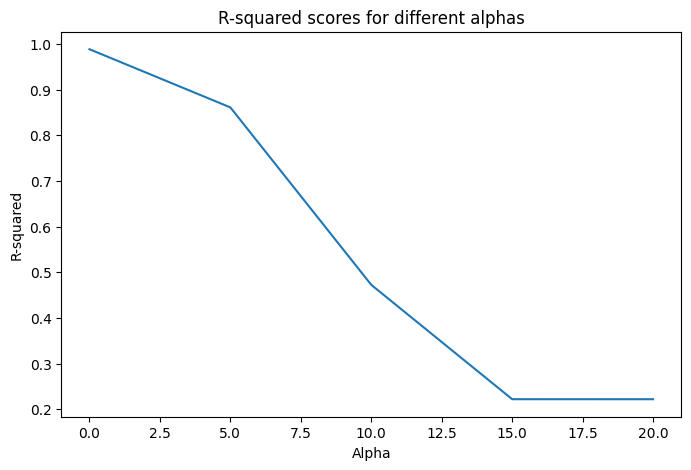

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the lines
plt.figure(figsize=(8, 5))  

sns.lineplot(x='alpha', y='r2_score', data=alphas_diagram)

# Add labels and legend
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('R-squared scores for different alphas')


# Show the plot
plt.show()

In [73]:
#Reading the total_data_norm_sel dataset
total_data_norm_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_train_sel.csv")
total_data_norm_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_test_sel.csv")

X_train_norm_sel = total_data_norm_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_norm_sel = total_data_norm_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_norm_train_sel["Obesity_prevalence"]
y_test = total_data_norm_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 0.0, random_state=8)
lasso_model.fit(X_train_norm_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_norm_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_1 = {}

# Adding alpha value 0.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_1 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_1)


{'alpha': 0.0, 'r2_score': 0.8013410723913758}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.877e+03, tolerance: 4.044e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

In [74]:
#Reading the total_data_norm_sel dataset
total_data_norm_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_train_sel.csv")
total_data_norm_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_test_sel.csv")

X_train_norm_sel = total_data_norm_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_norm_sel = total_data_norm_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_norm_train_sel["Obesity_prevalence"]
y_test = total_data_norm_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 5.0, random_state=8)
lasso_model.fit(X_train_norm_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_norm_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_2 = {}

# Adding alpha value 5.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_2 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_2)

{'alpha': 5.0, 'r2_score': -0.00113975444058112}


In [75]:
#Reading the total_data_norm_sel dataset
total_data_norm_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_train_sel.csv")
total_data_norm_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_test_sel.csv")

X_train_norm_sel = total_data_norm_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_norm_sel = total_data_norm_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_norm_train_sel["Obesity_prevalence"]
y_test = total_data_norm_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 10.0, random_state=8)
lasso_model.fit(X_train_norm_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_norm_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_3 = {}

# Adding alpha value 10.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_3 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_3)


{'alpha': 10.0, 'r2_score': -0.00113975444058112}


In [76]:
#Reading the total_data_norm_sel dataset
total_data_norm_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_train_sel.csv")
total_data_norm_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_test_sel.csv")

X_train_norm_sel = total_data_norm_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_norm_sel = total_data_norm_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_norm_train_sel["Obesity_prevalence"]
y_test = total_data_norm_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 15.0, random_state=8)
lasso_model.fit(X_train_norm_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_norm_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_4 = {}

# Adding alpha value 15.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_4 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_4)

{'alpha': 15.0, 'r2_score': -0.00113975444058112}


In [77]:
#Reading the total_data_norm_sel dataset
total_data_norm_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_train_sel.csv")
total_data_norm_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_norm_test_sel.csv")

X_train_norm_sel = total_data_norm_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_norm_sel = total_data_norm_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_norm_train_sel["Obesity_prevalence"]
y_test = total_data_norm_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 20.0, random_state=8)
lasso_model.fit(X_train_norm_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_norm_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_5 = {}

# Adding alpha value 20.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_5 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_5)

{'alpha': 20.0, 'r2_score': -0.00113975444058112}


In [78]:
# Combining the dictionaries (alpha hyperparameter + r2_score) into a list and then a DataFrame
dicts_list = [total_data_sel_alphas_1, total_data_sel_alphas_2, total_data_sel_alphas_3, total_data_sel_alphas_4, total_data_sel_alphas_5 ]

alphas_diagram = pd.DataFrame.from_dict(dicts_list)

print(alphas_diagram)

   alpha  r2_score
0    0.0  0.801341
1    5.0 -0.001140
2   10.0 -0.001140
3   15.0 -0.001140
4   20.0 -0.001140


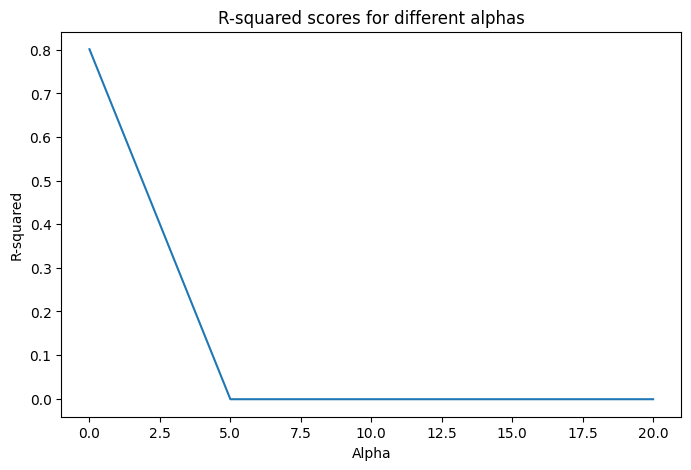

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the lines
plt.figure(figsize=(8, 5))  

sns.lineplot(x='alpha', y='r2_score', data=alphas_diagram)

# Add labels and legend
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('R-squared scores for different alphas')


# Show the plot
plt.show()

In [80]:
#Reading the total_data_no_outliers_norm
total_data_no_outliers_norm_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_train_sel.csv")
total_data_no_outliers_norm_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_test_sel.csv")

X_train_no_outliers_norm_sel = total_data_no_outliers_norm_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_norm_sel = total_data_no_outliers_norm_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_norm_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_norm_test_sel["Obesity_prevalence"]

#Initialization and training of the model
lasso_model = Lasso(alpha= 0, random_state=8)
lasso_model.fit(X_train_no_outliers_norm_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = model.predict(X_test_no_outliers_norm_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_1 = {}

# Adding alpha value 0.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_1 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_1)

{'alpha': 0, 'r2_score': -27.260047006191563}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.641e+02, tolerance: 4.044e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

In [81]:
#Reading the total_data_no_outliers_norm
total_data_no_outliers_norm_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_train_sel.csv")
total_data_no_outliers_norm_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_test_sel.csv")

X_train_no_outliers_norm_sel = total_data_no_outliers_norm_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_norm_sel = total_data_no_outliers_norm_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_norm_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_norm_test_sel["Obesity_prevalence"]

#Initialization and training of the model
lasso_model = Lasso(alpha= 5, random_state=8)
lasso_model.fit(X_train_no_outliers_norm_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = model.predict(X_test_no_outliers_norm_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_2 = {}

# Adding alpha value 5.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_2 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_2)

{'alpha': 5, 'r2_score': -27.260047006191563}


In [82]:
#Reading the total_data_no_outliers_norm
total_data_no_outliers_norm_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_train_sel.csv")
total_data_no_outliers_norm_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_test_sel.csv")

X_train_no_outliers_norm_sel = total_data_no_outliers_norm_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_norm_sel = total_data_no_outliers_norm_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_norm_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_norm_test_sel["Obesity_prevalence"]

#Initialization and training of the model
lasso_model = Lasso(alpha= 10, random_state=8)
lasso_model.fit(X_train_no_outliers_norm_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = model.predict(X_test_no_outliers_norm_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_3 = {}

# Adding alpha value 10.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_3 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_3)

{'alpha': 10, 'r2_score': -27.260047006191563}


In [83]:
#Reading the total_data_no_outliers_norm
total_data_no_outliers_norm_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_train_sel.csv")
total_data_no_outliers_norm_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_test_sel.csv")

X_train_no_outliers_norm_sel = total_data_no_outliers_norm_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_norm_sel = total_data_no_outliers_norm_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_norm_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_norm_test_sel["Obesity_prevalence"]

#Initialization and training of the model
lasso_model = Lasso(alpha= 15, random_state=8)
lasso_model.fit(X_train_no_outliers_norm_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = model.predict(X_test_no_outliers_norm_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_4 = {}

# Adding alpha value 15.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_4 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_4)

{'alpha': 15, 'r2_score': -27.260047006191563}


In [84]:
#Reading the total_data_no_outliers_norm
total_data_no_outliers_norm_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_train_sel.csv")
total_data_no_outliers_norm_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_norm_test_sel.csv")

X_train_no_outliers_norm_sel = total_data_no_outliers_norm_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_norm_sel = total_data_no_outliers_norm_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_norm_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_norm_test_sel["Obesity_prevalence"]

#Initialization and training of the model
lasso_model = Lasso(alpha= 20, random_state=8)
lasso_model.fit(X_train_no_outliers_norm_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = model.predict(X_test_no_outliers_norm_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_5 = {}

# Adding alpha value 20.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_5 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_5)

{'alpha': 20, 'r2_score': -27.260047006191563}


In [85]:
# Combining the dictionaries (alpha hyperparameter + r2_score) into a list and then a DataFrame
dicts_list = [total_data_sel_alphas_1, total_data_sel_alphas_2, total_data_sel_alphas_3, total_data_sel_alphas_4, total_data_sel_alphas_5 ]

alphas_diagram = pd.DataFrame.from_dict(dicts_list)

print(alphas_diagram)

   alpha   r2_score
0      0 -27.260047
1      5 -27.260047
2     10 -27.260047
3     15 -27.260047
4     20 -27.260047


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the lines
plt.figure(figsize=(8, 5))  

sns.lineplot(x='alpha', y='r2_score', data=alphas_diagram)

# Add labels and legend
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('R-squared scores for different alphas')


# Show the plot
plt.show()

In [87]:
#Reading the total_data_scal_sel dataset
total_data_scal_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_train_sel.csv")
total_data_scal_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_test_sel.csv")

X_train_scal_sel = total_data_scal_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_scal_sel = total_data_scal_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_scal_train_sel["Obesity_prevalence"]
y_test = total_data_scal_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 0.0, random_state=8)
lasso_model.fit(X_train_scal_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_scal_sel)
y_pred



from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_1 = {}

# Adding alpha value 0.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_1 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_1)

{'alpha': 0.0, 'r2_score': 0.8013410723913756}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.877e+03, tolerance: 4.044e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

In [88]:
#Reading the total_data_scal_sel dataset
total_data_scal_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_train_sel.csv")
total_data_scal_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_test_sel.csv")

X_train_scal_sel = total_data_scal_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_scal_sel = total_data_scal_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_scal_train_sel["Obesity_prevalence"]
y_test = total_data_scal_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 5.0, random_state=8)
lasso_model.fit(X_train_scal_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_scal_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_2 = {}

# Adding alpha value 5.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_2 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_2)

{'alpha': 5.0, 'r2_score': -0.00113975444058112}


In [89]:
#Reading the total_data_scal_sel dataset
total_data_scal_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_train_sel.csv")
total_data_scal_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_test_sel.csv")

X_train_scal_sel = total_data_scal_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_scal_sel = total_data_scal_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_scal_train_sel["Obesity_prevalence"]
y_test = total_data_scal_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 10.0, random_state=8)
lasso_model.fit(X_train_scal_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_scal_sel)
y_pred



from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_3 = {}

# Adding alpha value 10.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_3 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_3)

{'alpha': 10.0, 'r2_score': -0.00113975444058112}


In [90]:
#Reading the total_data_scal_sel dataset
total_data_scal_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_train_sel.csv")
total_data_scal_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_test_sel.csv")

X_train_scal_sel = total_data_scal_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_scal_sel = total_data_scal_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_scal_train_sel["Obesity_prevalence"]
y_test = total_data_scal_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 15.0, random_state=8)
lasso_model.fit(X_train_scal_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_scal_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_4 = {}

# Adding alpha value 15.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_4 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_4)

{'alpha': 15.0, 'r2_score': -0.00113975444058112}


In [91]:
#Reading the total_data_scal_sel dataset
total_data_scal_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_train_sel.csv")
total_data_scal_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_scal_test_sel.csv")

X_train_scal_sel = total_data_scal_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_scal_sel = total_data_scal_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_scal_train_sel["Obesity_prevalence"]
y_test = total_data_scal_test_sel["Obesity_prevalence"]


#Initialization and training of the model
lasso_model = Lasso(alpha= 20.0, random_state=8)
lasso_model.fit(X_train_scal_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_scal_sel)
y_pred



from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_5 = {}

# Adding alpha value 20.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_5 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_5)


{'alpha': 20.0, 'r2_score': -0.00113975444058112}


In [92]:
# Combining the dictionaries (alpha hyperparameter + r2_score) into a list and then a DataFrame
dicts_list = [total_data_sel_alphas_1, total_data_sel_alphas_2, total_data_sel_alphas_3, total_data_sel_alphas_4, total_data_sel_alphas_5 ]

alphas_diagram = pd.DataFrame.from_dict(dicts_list)

print(alphas_diagram)

   alpha  r2_score
0    0.0  0.801341
1    5.0 -0.001140
2   10.0 -0.001140
3   15.0 -0.001140
4   20.0 -0.001140


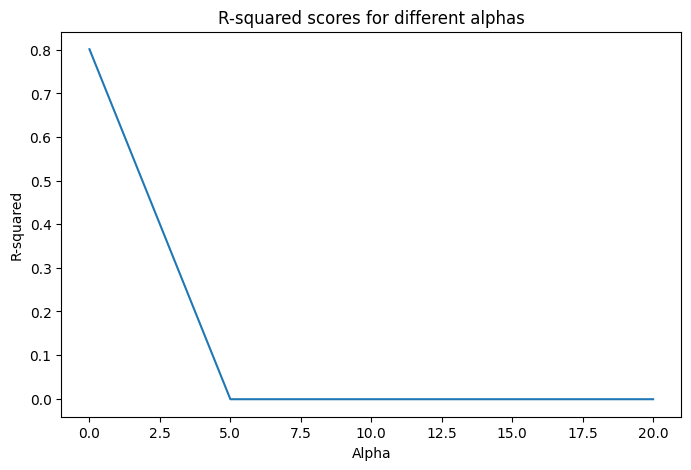

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the lines
plt.figure(figsize=(8, 5))  

sns.lineplot(x='alpha', y='r2_score', data=alphas_diagram)

# Add labels and legend
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('R-squared scores for different alphas')


# Show the plot
plt.show()

In [94]:
#Reading the total_data_no_outliers_scal dataset
total_data_no_outliers_scal_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_train_sel.csv")
total_data_no_outliers_scal_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_test_sel.csv")

X_train_no_outliers_scal_sel = total_data_no_outliers_scal_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_scal_sel = total_data_no_outliers_scal_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_scal_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_scal_test_sel["Obesity_prevalence"]

#Initialization and training of the model
lasso_model = Lasso(alpha= 0.0, random_state=8)
lasso_model.fit(X_train_no_outliers_scal_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_no_outliers_scal_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_1 = {}

# Adding alpha value 0.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_1 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_1)

{'alpha': 0.0, 'r2_score': 0.9884473146769773}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.641e+02, tolerance: 4.044e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

In [95]:
#Reading the total_data_no_outliers_scal dataset
total_data_no_outliers_scal_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_train_sel.csv")
total_data_no_outliers_scal_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_test_sel.csv")

X_train_no_outliers_scal_sel = total_data_no_outliers_scal_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_scal_sel = total_data_no_outliers_scal_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_scal_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_scal_test_sel["Obesity_prevalence"]

#Initialization and training of the model
lasso_model = Lasso(alpha= 5.0, random_state=8)
lasso_model.fit(X_train_no_outliers_scal_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_no_outliers_scal_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_2 = {}

# Adding alpha value 5.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_2 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_2)

{'alpha': 5.0, 'r2_score': -0.00113975444058112}


In [96]:
#Reading the total_data_no_outliers_scal dataset
total_data_no_outliers_scal_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_train_sel.csv")
total_data_no_outliers_scal_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_test_sel.csv")

X_train_no_outliers_scal_sel = total_data_no_outliers_scal_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_scal_sel = total_data_no_outliers_scal_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_scal_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_scal_test_sel["Obesity_prevalence"]

#Initialization and training of the model
lasso_model = Lasso(alpha= 10.0, random_state=8)
lasso_model.fit(X_train_no_outliers_scal_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_no_outliers_scal_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_3 = {}

# Adding alpha value 10.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_3 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_3)

{'alpha': 10.0, 'r2_score': -0.00113975444058112}


In [97]:
#Reading the total_data_no_outliers_scal dataset
total_data_no_outliers_scal_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_train_sel.csv")
total_data_no_outliers_scal_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_test_sel.csv")

X_train_no_outliers_scal_sel = total_data_no_outliers_scal_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_scal_sel = total_data_no_outliers_scal_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_scal_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_scal_test_sel["Obesity_prevalence"]

#Initialization and training of the model
lasso_model = Lasso(alpha= 15.0, random_state=8)
lasso_model.fit(X_train_no_outliers_scal_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_no_outliers_scal_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_4 = {}

# Adding alpha value 15.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_4 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_4)

{'alpha': 15.0, 'r2_score': -0.00113975444058112}


In [98]:
#Reading the total_data_no_outliers_scal dataset
total_data_no_outliers_scal_train_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_train_sel.csv")
total_data_no_outliers_scal_test_sel = pd.read_csv("/workspaces/machine-learning-regularized-linear-regression/data/processed/total_data_no_outliers_scal_test_sel.csv")

X_train_no_outliers_scal_sel = total_data_no_outliers_scal_train_sel.drop(["Obesity_prevalence"], axis = 1)
X_test_no_outliers_scal_sel = total_data_no_outliers_scal_test_sel.drop(["Obesity_prevalence"], axis = 1)
y_train = total_data_no_outliers_scal_train_sel["Obesity_prevalence"]
y_test = total_data_no_outliers_scal_test_sel["Obesity_prevalence"]

#Initialization and training of the model
lasso_model = Lasso(alpha= 20.0, random_state=8)
lasso_model.fit(X_train_no_outliers_scal_sel, y_train)
alpha_value = lasso_model.alpha

#Model prediction
y_pred = lasso_model.predict(X_test_no_outliers_scal_sel)
y_pred


from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

total_data_sel_alphas_5 = {}

# Adding alpha value 20.0 and R-squared score for the Lasso model to the dictionary
total_data_sel_alphas_5 = {'alpha': alpha_value, 'r2_score': r2}

print(total_data_sel_alphas_5)

{'alpha': 20.0, 'r2_score': -0.00113975444058112}


In [99]:

# Combining the dictionaries (alpha hyperparameter + r2_score) into a list and then a DataFrame
dicts_list = [total_data_sel_alphas_1, total_data_sel_alphas_2, total_data_sel_alphas_3, total_data_sel_alphas_4, total_data_sel_alphas_5 ]

alphas_diagram = pd.DataFrame.from_dict(dicts_list)

print(alphas_diagram)

   alpha  r2_score
0    0.0  0.988447
1    5.0 -0.001140
2   10.0 -0.001140
3   15.0 -0.001140
4   20.0 -0.001140


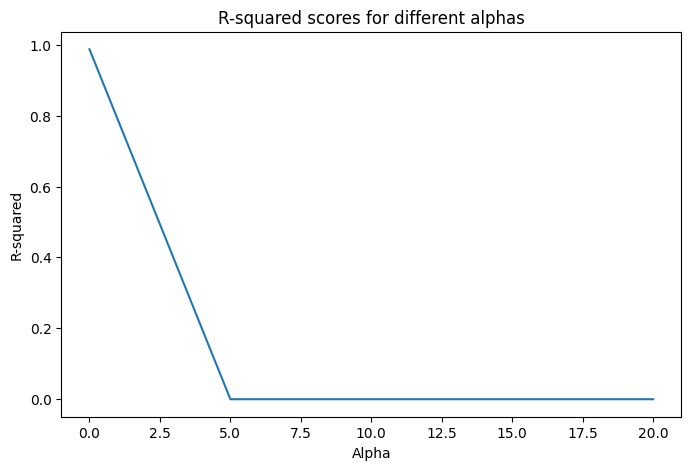

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the lines
plt.figure(figsize=(8, 5))  

sns.lineplot(x='alpha', y='r2_score', data=alphas_diagram)

# Add labels and legend
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('R-squared scores for different alphas')


# Show the plot
plt.show()

In [101]:
from pickle import dump

#Saving the model
dump(lasso_model, open("/workspaces/machine-learning-regularized-linear-regression/models/lasso8.sav", "wb"))

From all datasets we can conclude that the r2_score decreases (in some cases quite drastically) as the alpha increases. With alpha = 0, we got practically the same results we had we the linear regression model. The two datasets that got the best performance were the regular no outliers and the scaled no outliers. 

Since the regular no outliers dataset got the best results both in the linear regression model and the regularized linear regression one, we will be using this one for the optimization. 

In [106]:
#Model optimization

#Grid search
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "alpha": [0.1, 0.5, 1, 2, 3, 5],
    "max_iter": [100, 200, 300, 600, 800, 1000],
    "selection": ["cyclic", "random"],
    "warm_start": [True, False]
}
model=Lasso()

In [107]:
# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid


def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_no_outliers_sel, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'alpha': 0.1, 'max_iter': 100, 'selection': 'cyclic', 'warm_start': True}


In [108]:
model_grid = Lasso(alpha=0.1, max_iter=100, selection='cyclic', warm_start= True, random_state=8)
model_grid.fit(X_train_no_outliers_sel, y_train)
y_pred = model_grid.predict(X_test_no_outliers_sel)

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.18615148073960447
R2 Score: 0.9885002050863688


We got a slight improvement from 0.9884472843675941 to 0.9885002050863688.

In [112]:
from pickle import dump

dump(model_grid, open("/workspaces/machine-learning-regularized-linear-regression/models/lasso_a-01_maxiter-100_selection-cyclic_warmstart-true_8.sav", "wb"))
